In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision as tv
import torch

In [2]:
import os
from pathlib import Path
import glob
import pandas as pd

In [3]:
from PIL import Image
import re
import cv2

In [4]:
train_path = './train_v2/'
train_markup = 'train_ship_segmentations_v2.csv'

In [5]:
train_exts = []
train_files = []

In [6]:
for root, dirs, files in os.walk(train_path):
      print(root)
      for file in files:
            path = Path(file)
            train_files.append(str(path))
            train_exts.append(path.suffix)  

./train_v2/


In [7]:
np.unique(train_exts), train_files[:5], len(train_files)

(array(['.jpg'], dtype='<U4'),
 ['00003e153.jpg',
  '0001124c7.jpg',
  '000155de5.jpg',
  '000194a2d.jpg',
  '0001b1832.jpg'],
 192556)

### All photos are in jpg format

In [8]:
markup = pd.read_csv(train_markup)

In [9]:
markup.head

<bound method NDFrame.head of               ImageId                                      EncodedPixels
0       00003e153.jpg                                                NaN
1       0001124c7.jpg                                                NaN
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4       000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...               ...                                                ...
231718  fffedbb6b.jpg                                                NaN
231719  ffff2aa57.jpg                                                NaN
231720  ffff6e525.jpg                                                NaN
231721  ffffc50b4.jpg                                                NaN
231722  ffffe97f3.jpg                                                NaN

[231723 rows x 2 columns]>

In [10]:
set(markup.ImageId.values).difference(set(train_files))

set()

In [11]:
set(train_files).difference(set(markup.ImageId.values))

set()

### All train samples have labels

In [12]:
na_filt = markup.EncodedPixels.isna()

In [13]:
negative_samples_ind = markup[na_filt].ImageId.index
positive_samples_ind = np.asarray(list(set(markup.ImageId.index).difference(set(markup[na_filt].ImageId.index))))

In [14]:
negative_samples_ind.shape, positive_samples_ind.shape

((150000,), (81723,))

[]

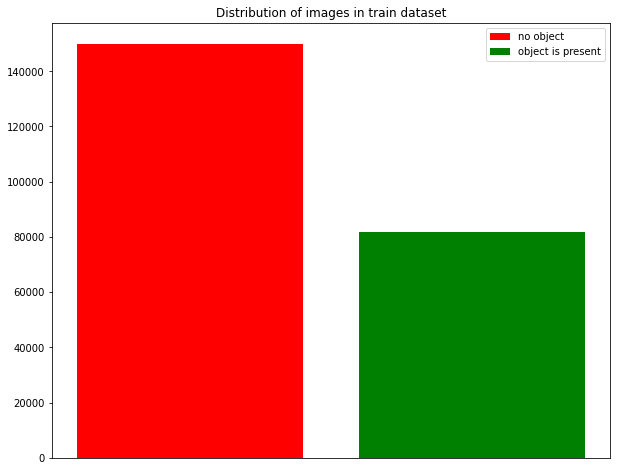

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x = [0],label= 'no object', height = [negative_samples_ind.shape[0]], color=['red'])
ax.bar(x = [ 1],label= 'object is present', height = [positive_samples_ind.shape[0]], color=['green'])

ax.set_title('Distribution of images in train dataset')
ax.legend()
ax.get_xaxis().set_ticks([])

In [16]:
rand_ind = positive_samples_ind[0]

In [17]:
filename = markup.iloc[rand_ind].ImageId
pixels = markup.iloc[rand_ind].EncodedPixels

In [18]:
filename

'000155de5.jpg'

In [19]:
randimage = Image.open(os.path.join(train_path, filename))
ra = np.asarray(randimage)

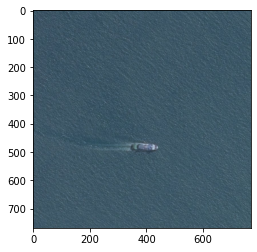

In [20]:
plt.imshow(randimage)

In [21]:
ra.shape, 768**2

((768, 768, 3), 589824)

In [22]:
li = pixels.split(' ')

In [23]:
coord_intens = [(int(li[i]), int(li[i+1])) for i in range(0, len(li)-1, 2)]

In [24]:
mask = np.zeros(ra.shape[:-1:])
masks = np.zeros((len(coord_intens), *mask.shape))
points = []
points_x = []
prev_x = 0
prev_y = 0
prev_intens = 0
for i, (coord, intens) in enumerate(coord_intens):
    y = coord//ra.shape[0]
    x = coord%ra.shape[0]
    points.append((x, y))
    mask[x:x+intens, y:y+intens] = 1
    masks[i, x:x+intens, y:y+intens] = 1
    
    #print(x, x+intens, y, y+intens)

In [25]:
masks.shape

(104, 768, 768)

In [26]:
(masks[0]==masks[1]).all()

False

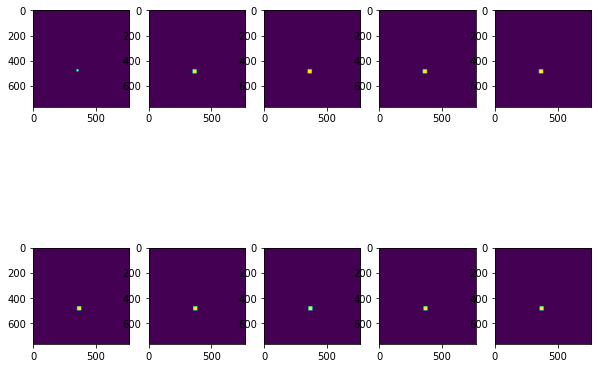

In [27]:
fig, axs = plt.subplots(2, 5, figsize=(10,8))
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(masks[i*5+j])
#plt.imshow(masks[0])
plt.show()

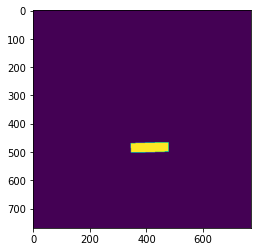

In [28]:
plt.imshow(mask)

In [29]:
ra1 = ra.copy()
ra1[mask==1, :] = [0, 255, 255]

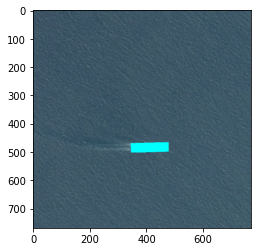

In [30]:
plt.imshow(ra1)

### Ground truth segmented bounding box 

In [ ]:
img = cv2.imread("../input/iwildcam2021-fgvc8/train/"+image)

In [426]:
def parse_label(ind):
    rand_ind = positive_samples_ind[ind]
    #filename = markup.iloc[rand_ind].ImageId
    pixels = markup.iloc[rand_ind].EncodedPixels
    #randimage = cv2.imread(os.path.join(train_path, filename))
    li = pixels.split(' ')
    coord_intens = [(int(li[i]), int(li[i+1])) for i in range(0, len(li)-1, 2)]
    mask = np.zeros(randimage.shape[:-1:])
    points = []
    points_x = []
    for i, (coord, intens) in enumerate(coord_intens):
    
        y = coord//randimage.shape[0]
        x = coord%randimage.shape[0]
        points.append((x, y))
        mask[x:x+intens, y:y+intens] = 1
    return mask

def count_pixels(ind, randimage_shape = (768,768)):
    pixels = markup.iloc[rand_ind].EncodedPixels
    li = pixels.split(' ')
    coord_intens = [(int(li[i]), int(li[i+1])) for i in range(0, len(li)-1, 2)]
    mask = np.zeros(randimage_shape)
    for i, (coord, intens) in enumerate(coord_intens):
        y = coord//ra.shape[0]
        x = coord%ra.shape[0]
        mask[x:x+intens, y:y+intens] = 1
    return mask.mean()


In [439]:

mean = 0
for i,_ in enumerate(positive_samples_ind):
    mean += count_pixels(i)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082


3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768


5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445


6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138


8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799


10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
1038

11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
1179

12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
1315

14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
1453

15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
1593

17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
1735

18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
1873

19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
2014

21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
2154

22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
2293

24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
2433

25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
2575

26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
2716

28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
2853

29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
29876
29877
29878
29879
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
2992

31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
31219
31220
31221
31222
31223
31224
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
31235
31236
31237
31238
31239
31240
31241
31242
31243
31244
31245
31246
31247
31248
31249
31250
31251
31252
31253
31254
31255
31256
31257
31258
31259
31260
31261
31262
31263
31264
31265
31266
31267
31268
31269
31270
31271
31272
31273
31274
31275
31276
31277
31278
31279
31280
31281
31282
31283
31284
31285
31286
31287
31288
31289
31290
31291
31292
31293
31294
31295
31296
3129

32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
3267

33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33941
33942
33943
33944
33945
33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
34053
34054
34055
34056
34057
34058
34059
34060
34061
34062
34063
34064
34065
34066
34067
34068
34069
34070
34071
34072
34073
34074
34075
34076
34077
34078
34079
34080
34081
34082
34083
34084
34085
34086
34087
34088
34089
34090
3409

35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
35375
35376
35377
35378
35379
35380
35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
3546

36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
3684

38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
3823

39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
3962

40886
40887
40888
40889
40890
40891
40892
40893
40894
40895
40896
40897
40898
40899
40900
40901
40902
40903
40904
40905
40906
40907
40908
40909
40910
40911
40912
40913
40914
40915
40916
40917
40918
40919
40920
40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
40949
40950
40951
40952
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
40985
40986
40987
40988
40989
40990
40991
40992
40993
40994
40995
40996
40997
40998
40999
41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
41037
41038
41039
41040
41041
41042
41043
41044
41045
41046
41047
41048
41049
41050
41051
4105

42260
42261
42262
42263
42264
42265
42266
42267
42268
42269
42270
42271
42272
42273
42274
42275
42276
42277
42278
42279
42280
42281
42282
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
42294
42295
42296
42297
42298
42299
42300
42301
42302
42303
42304
42305
42306
42307
42308
42309
42310
42311
42312
42313
42314
42315
42316
42317
42318
42319
42320
42321
42322
42323
42324
42325
42326
42327
42328
42329
42330
42331
42332
42333
42334
42335
42336
42337
42338
42339
42340
42341
42342
42343
42344
42345
42346
42347
42348
42349
42350
42351
42352
42353
42354
42355
42356
42357
42358
42359
42360
42361
42362
42363
42364
42365
42366
42367
42368
42369
42370
42371
42372
42373
42374
42375
42376
42377
42378
42379
42380
42381
42382
42383
42384
42385
42386
42387
42388
42389
42390
42391
42392
42393
42394
42395
42396
42397
42398
42399
42400
42401
42402
42403
42404
42405
42406
42407
42408
42409
42410
42411
42412
42413
42414
42415
42416
42417
42418
42419
42420
42421
42422
42423
42424
42425
4242

43635
43636
43637
43638
43639
43640
43641
43642
43643
43644
43645
43646
43647
43648
43649
43650
43651
43652
43653
43654
43655
43656
43657
43658
43659
43660
43661
43662
43663
43664
43665
43666
43667
43668
43669
43670
43671
43672
43673
43674
43675
43676
43677
43678
43679
43680
43681
43682
43683
43684
43685
43686
43687
43688
43689
43690
43691
43692
43693
43694
43695
43696
43697
43698
43699
43700
43701
43702
43703
43704
43705
43706
43707
43708
43709
43710
43711
43712
43713
43714
43715
43716
43717
43718
43719
43720
43721
43722
43723
43724
43725
43726
43727
43728
43729
43730
43731
43732
43733
43734
43735
43736
43737
43738
43739
43740
43741
43742
43743
43744
43745
43746
43747
43748
43749
43750
43751
43752
43753
43754
43755
43756
43757
43758
43759
43760
43761
43762
43763
43764
43765
43766
43767
43768
43769
43770
43771
43772
43773
43774
43775
43776
43777
43778
43779
43780
43781
43782
43783
43784
43785
43786
43787
43788
43789
43790
43791
43792
43793
43794
43795
43796
43797
43798
43799
43800
4380

45056
45057
45058
45059
45060
45061
45062
45063
45064
45065
45066
45067
45068
45069
45070
45071
45072
45073
45074
45075
45076
45077
45078
45079
45080
45081
45082
45083
45084
45085
45086
45087
45088
45089
45090
45091
45092
45093
45094
45095
45096
45097
45098
45099
45100
45101
45102
45103
45104
45105
45106
45107
45108
45109
45110
45111
45112
45113
45114
45115
45116
45117
45118
45119
45120
45121
45122
45123
45124
45125
45126
45127
45128
45129
45130
45131
45132
45133
45134
45135
45136
45137
45138
45139
45140
45141
45142
45143
45144
45145
45146
45147
45148
45149
45150
45151
45152
45153
45154
45155
45156
45157
45158
45159
45160
45161
45162
45163
45164
45165
45166
45167
45168
45169
45170
45171
45172
45173
45174
45175
45176
45177
45178
45179
45180
45181
45182
45183
45184
45185
45186
45187
45188
45189
45190
45191
45192
45193
45194
45195
45196
45197
45198
45199
45200
45201
45202
45203
45204
45205
45206
45207
45208
45209
45210
45211
45212
45213
45214
45215
45216
45217
45218
45219
45220
45221
4522

46443
46444
46445
46446
46447
46448
46449
46450
46451
46452
46453
46454
46455
46456
46457
46458
46459
46460
46461
46462
46463
46464
46465
46466
46467
46468
46469
46470
46471
46472
46473
46474
46475
46476
46477
46478
46479
46480
46481
46482
46483
46484
46485
46486
46487
46488
46489
46490
46491
46492
46493
46494
46495
46496
46497
46498
46499
46500
46501
46502
46503
46504
46505
46506
46507
46508
46509
46510
46511
46512
46513
46514
46515
46516
46517
46518
46519
46520
46521
46522
46523
46524
46525
46526
46527
46528
46529
46530
46531
46532
46533
46534
46535
46536
46537
46538
46539
46540
46541
46542
46543
46544
46545
46546
46547
46548
46549
46550
46551
46552
46553
46554
46555
46556
46557
46558
46559
46560
46561
46562
46563
46564
46565
46566
46567
46568
46569
46570
46571
46572
46573
46574
46575
46576
46577
46578
46579
46580
46581
46582
46583
46584
46585
46586
46587
46588
46589
46590
46591
46592
46593
46594
46595
46596
46597
46598
46599
46600
46601
46602
46603
46604
46605
46606
46607
46608
4660

47841
47842
47843
47844
47845
47846
47847
47848
47849
47850
47851
47852
47853
47854
47855
47856
47857
47858
47859
47860
47861
47862
47863
47864
47865
47866
47867
47868
47869
47870
47871
47872
47873
47874
47875
47876
47877
47878
47879
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
47915
47916
47917
47918
47919
47920
47921
47922
47923
47924
47925
47926
47927
47928
47929
47930
47931
47932
47933
47934
47935
47936
47937
47938
47939
47940
47941
47942
47943
47944
47945
47946
47947
47948
47949
47950
47951
47952
47953
47954
47955
47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
47981
47982
47983
47984
47985
47986
47987
47988
47989
47990
47991
47992
47993
47994
47995
47996
47997
47998
47999
48000
48001
48002
48003
48004
48005
48006
4800

49223
49224
49225
49226
49227
49228
49229
49230
49231
49232
49233
49234
49235
49236
49237
49238
49239
49240
49241
49242
49243
49244
49245
49246
49247
49248
49249
49250
49251
49252
49253
49254
49255
49256
49257
49258
49259
49260
49261
49262
49263
49264
49265
49266
49267
49268
49269
49270
49271
49272
49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
49295
49296
49297
49298
49299
49300
49301
49302
49303
49304
49305
49306
49307
49308
49309
49310
49311
49312
49313
49314
49315
49316
49317
49318
49319
49320
49321
49322
49323
49324
49325
49326
49327
49328
49329
49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
49374
49375
49376
49377
49378
49379
49380
49381
49382
49383
49384
49385
49386
49387
49388
4938

50615
50616
50617
50618
50619
50620
50621
50622
50623
50624
50625
50626
50627
50628
50629
50630
50631
50632
50633
50634
50635
50636
50637
50638
50639
50640
50641
50642
50643
50644
50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50655
50656
50657
50658
50659
50660
50661
50662
50663
50664
50665
50666
50667
50668
50669
50670
50671
50672
50673
50674
50675
50676
50677
50678
50679
50680
50681
50682
50683
50684
50685
50686
50687
50688
50689
50690
50691
50692
50693
50694
50695
50696
50697
50698
50699
50700
50701
50702
50703
50704
50705
50706
50707
50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
50763
50764
50765
50766
50767
50768
50769
50770
50771
50772
50773
50774
50775
50776
50777
50778
50779
50780
5078

52019
52020
52021
52022
52023
52024
52025
52026
52027
52028
52029
52030
52031
52032
52033
52034
52035
52036
52037
52038
52039
52040
52041
52042
52043
52044
52045
52046
52047
52048
52049
52050
52051
52052
52053
52054
52055
52056
52057
52058
52059
52060
52061
52062
52063
52064
52065
52066
52067
52068
52069
52070
52071
52072
52073
52074
52075
52076
52077
52078
52079
52080
52081
52082
52083
52084
52085
52086
52087
52088
52089
52090
52091
52092
52093
52094
52095
52096
52097
52098
52099
52100
52101
52102
52103
52104
52105
52106
52107
52108
52109
52110
52111
52112
52113
52114
52115
52116
52117
52118
52119
52120
52121
52122
52123
52124
52125
52126
52127
52128
52129
52130
52131
52132
52133
52134
52135
52136
52137
52138
52139
52140
52141
52142
52143
52144
52145
52146
52147
52148
52149
52150
52151
52152
52153
52154
52155
52156
52157
52158
52159
52160
52161
52162
52163
52164
52165
52166
52167
52168
52169
52170
52171
52172
52173
52174
52175
52176
52177
52178
52179
52180
52181
52182
52183
52184
5218

53443
53444
53445
53446
53447
53448
53449
53450
53451
53452
53453
53454
53455
53456
53457
53458
53459
53460
53461
53462
53463
53464
53465
53466
53467
53468
53469
53470
53471
53472
53473
53474
53475
53476
53477
53478
53479
53480
53481
53482
53483
53484
53485
53486
53487
53488
53489
53490
53491
53492
53493
53494
53495
53496
53497
53498
53499
53500
53501
53502
53503
53504
53505
53506
53507
53508
53509
53510
53511
53512
53513
53514
53515
53516
53517
53518
53519
53520
53521
53522
53523
53524
53525
53526
53527
53528
53529
53530
53531
53532
53533
53534
53535
53536
53537
53538
53539
53540
53541
53542
53543
53544
53545
53546
53547
53548
53549
53550
53551
53552
53553
53554
53555
53556
53557
53558
53559
53560
53561
53562
53563
53564
53565
53566
53567
53568
53569
53570
53571
53572
53573
53574
53575
53576
53577
53578
53579
53580
53581
53582
53583
53584
53585
53586
53587
53588
53589
53590
53591
53592
53593
53594
53595
53596
53597
53598
53599
53600
53601
53602
53603
53604
53605
53606
53607
53608
5360

54822
54823
54824
54825
54826
54827
54828
54829
54830
54831
54832
54833
54834
54835
54836
54837
54838
54839
54840
54841
54842
54843
54844
54845
54846
54847
54848
54849
54850
54851
54852
54853
54854
54855
54856
54857
54858
54859
54860
54861
54862
54863
54864
54865
54866
54867
54868
54869
54870
54871
54872
54873
54874
54875
54876
54877
54878
54879
54880
54881
54882
54883
54884
54885
54886
54887
54888
54889
54890
54891
54892
54893
54894
54895
54896
54897
54898
54899
54900
54901
54902
54903
54904
54905
54906
54907
54908
54909
54910
54911
54912
54913
54914
54915
54916
54917
54918
54919
54920
54921
54922
54923
54924
54925
54926
54927
54928
54929
54930
54931
54932
54933
54934
54935
54936
54937
54938
54939
54940
54941
54942
54943
54944
54945
54946
54947
54948
54949
54950
54951
54952
54953
54954
54955
54956
54957
54958
54959
54960
54961
54962
54963
54964
54965
54966
54967
54968
54969
54970
54971
54972
54973
54974
54975
54976
54977
54978
54979
54980
54981
54982
54983
54984
54985
54986
54987
5498

56209
56210
56211
56212
56213
56214
56215
56216
56217
56218
56219
56220
56221
56222
56223
56224
56225
56226
56227
56228
56229
56230
56231
56232
56233
56234
56235
56236
56237
56238
56239
56240
56241
56242
56243
56244
56245
56246
56247
56248
56249
56250
56251
56252
56253
56254
56255
56256
56257
56258
56259
56260
56261
56262
56263
56264
56265
56266
56267
56268
56269
56270
56271
56272
56273
56274
56275
56276
56277
56278
56279
56280
56281
56282
56283
56284
56285
56286
56287
56288
56289
56290
56291
56292
56293
56294
56295
56296
56297
56298
56299
56300
56301
56302
56303
56304
56305
56306
56307
56308
56309
56310
56311
56312
56313
56314
56315
56316
56317
56318
56319
56320
56321
56322
56323
56324
56325
56326
56327
56328
56329
56330
56331
56332
56333
56334
56335
56336
56337
56338
56339
56340
56341
56342
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
5637

57590
57591
57592
57593
57594
57595
57596
57597
57598
57599
57600
57601
57602
57603
57604
57605
57606
57607
57608
57609
57610
57611
57612
57613
57614
57615
57616
57617
57618
57619
57620
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57638
57639
57640
57641
57642
57643
57644
57645
57646
57647
57648
57649
57650
57651
57652
57653
57654
57655
57656
57657
57658
57659
57660
57661
57662
57663
57664
57665
57666
57667
57668
57669
57670
57671
57672
57673
57674
57675
57676
57677
57678
57679
57680
57681
57682
57683
57684
57685
57686
57687
57688
57689
57690
57691
57692
57693
57694
57695
57696
57697
57698
57699
57700
57701
57702
57703
57704
57705
57706
57707
57708
57709
57710
57711
57712
57713
57714
57715
57716
57717
57718
57719
57720
57721
57722
57723
57724
57725
57726
57727
57728
57729
57730
57731
57732
57733
57734
57735
57736
57737
57738
57739
57740
57741
57742
57743
57744
57745
57746
57747
57748
57749
57750
57751
57752
57753
57754
57755
5775

58998
58999
59000
59001
59002
59003
59004
59005
59006
59007
59008
59009
59010
59011
59012
59013
59014
59015
59016
59017
59018
59019
59020
59021
59022
59023
59024
59025
59026
59027
59028
59029
59030
59031
59032
59033
59034
59035
59036
59037
59038
59039
59040
59041
59042
59043
59044
59045
59046
59047
59048
59049
59050
59051
59052
59053
59054
59055
59056
59057
59058
59059
59060
59061
59062
59063
59064
59065
59066
59067
59068
59069
59070
59071
59072
59073
59074
59075
59076
59077
59078
59079
59080
59081
59082
59083
59084
59085
59086
59087
59088
59089
59090
59091
59092
59093
59094
59095
59096
59097
59098
59099
59100
59101
59102
59103
59104
59105
59106
59107
59108
59109
59110
59111
59112
59113
59114
59115
59116
59117
59118
59119
59120
59121
59122
59123
59124
59125
59126
59127
59128
59129
59130
59131
59132
59133
59134
59135
59136
59137
59138
59139
59140
59141
59142
59143
59144
59145
59146
59147
59148
59149
59150
59151
59152
59153
59154
59155
59156
59157
59158
59159
59160
59161
59162
59163
5916

60379
60380
60381
60382
60383
60384
60385
60386
60387
60388
60389
60390
60391
60392
60393
60394
60395
60396
60397
60398
60399
60400
60401
60402
60403
60404
60405
60406
60407
60408
60409
60410
60411
60412
60413
60414
60415
60416
60417
60418
60419
60420
60421
60422
60423
60424
60425
60426
60427
60428
60429
60430
60431
60432
60433
60434
60435
60436
60437
60438
60439
60440
60441
60442
60443
60444
60445
60446
60447
60448
60449
60450
60451
60452
60453
60454
60455
60456
60457
60458
60459
60460
60461
60462
60463
60464
60465
60466
60467
60468
60469
60470
60471
60472
60473
60474
60475
60476
60477
60478
60479
60480
60481
60482
60483
60484
60485
60486
60487
60488
60489
60490
60491
60492
60493
60494
60495
60496
60497
60498
60499
60500
60501
60502
60503
60504
60505
60506
60507
60508
60509
60510
60511
60512
60513
60514
60515
60516
60517
60518
60519
60520
60521
60522
60523
60524
60525
60526
60527
60528
60529
60530
60531
60532
60533
60534
60535
60536
60537
60538
60539
60540
60541
60542
60543
60544
6054

61776
61777
61778
61779
61780
61781
61782
61783
61784
61785
61786
61787
61788
61789
61790
61791
61792
61793
61794
61795
61796
61797
61798
61799
61800
61801
61802
61803
61804
61805
61806
61807
61808
61809
61810
61811
61812
61813
61814
61815
61816
61817
61818
61819
61820
61821
61822
61823
61824
61825
61826
61827
61828
61829
61830
61831
61832
61833
61834
61835
61836
61837
61838
61839
61840
61841
61842
61843
61844
61845
61846
61847
61848
61849
61850
61851
61852
61853
61854
61855
61856
61857
61858
61859
61860
61861
61862
61863
61864
61865
61866
61867
61868
61869
61870
61871
61872
61873
61874
61875
61876
61877
61878
61879
61880
61881
61882
61883
61884
61885
61886
61887
61888
61889
61890
61891
61892
61893
61894
61895
61896
61897
61898
61899
61900
61901
61902
61903
61904
61905
61906
61907
61908
61909
61910
61911
61912
61913
61914
61915
61916
61917
61918
61919
61920
61921
61922
61923
61924
61925
61926
61927
61928
61929
61930
61931
61932
61933
61934
61935
61936
61937
61938
61939
61940
61941
6194

63156
63157
63158
63159
63160
63161
63162
63163
63164
63165
63166
63167
63168
63169
63170
63171
63172
63173
63174
63175
63176
63177
63178
63179
63180
63181
63182
63183
63184
63185
63186
63187
63188
63189
63190
63191
63192
63193
63194
63195
63196
63197
63198
63199
63200
63201
63202
63203
63204
63205
63206
63207
63208
63209
63210
63211
63212
63213
63214
63215
63216
63217
63218
63219
63220
63221
63222
63223
63224
63225
63226
63227
63228
63229
63230
63231
63232
63233
63234
63235
63236
63237
63238
63239
63240
63241
63242
63243
63244
63245
63246
63247
63248
63249
63250
63251
63252
63253
63254
63255
63256
63257
63258
63259
63260
63261
63262
63263
63264
63265
63266
63267
63268
63269
63270
63271
63272
63273
63274
63275
63276
63277
63278
63279
63280
63281
63282
63283
63284
63285
63286
63287
63288
63289
63290
63291
63292
63293
63294
63295
63296
63297
63298
63299
63300
63301
63302
63303
63304
63305
63306
63307
63308
63309
63310
63311
63312
63313
63314
63315
63316
63317
63318
63319
63320
63321
6332

64566
64567
64568
64569
64570
64571
64572
64573
64574
64575
64576
64577
64578
64579
64580
64581
64582
64583
64584
64585
64586
64587
64588
64589
64590
64591
64592
64593
64594
64595
64596
64597
64598
64599
64600
64601
64602
64603
64604
64605
64606
64607
64608
64609
64610
64611
64612
64613
64614
64615
64616
64617
64618
64619
64620
64621
64622
64623
64624
64625
64626
64627
64628
64629
64630
64631
64632
64633
64634
64635
64636
64637
64638
64639
64640
64641
64642
64643
64644
64645
64646
64647
64648
64649
64650
64651
64652
64653
64654
64655
64656
64657
64658
64659
64660
64661
64662
64663
64664
64665
64666
64667
64668
64669
64670
64671
64672
64673
64674
64675
64676
64677
64678
64679
64680
64681
64682
64683
64684
64685
64686
64687
64688
64689
64690
64691
64692
64693
64694
64695
64696
64697
64698
64699
64700
64701
64702
64703
64704
64705
64706
64707
64708
64709
64710
64711
64712
64713
64714
64715
64716
64717
64718
64719
64720
64721
64722
64723
64724
64725
64726
64727
64728
64729
64730
64731
6473

65959
65960
65961
65962
65963
65964
65965
65966
65967
65968
65969
65970
65971
65972
65973
65974
65975
65976
65977
65978
65979
65980
65981
65982
65983
65984
65985
65986
65987
65988
65989
65990
65991
65992
65993
65994
65995
65996
65997
65998
65999
66000
66001
66002
66003
66004
66005
66006
66007
66008
66009
66010
66011
66012
66013
66014
66015
66016
66017
66018
66019
66020
66021
66022
66023
66024
66025
66026
66027
66028
66029
66030
66031
66032
66033
66034
66035
66036
66037
66038
66039
66040
66041
66042
66043
66044
66045
66046
66047
66048
66049
66050
66051
66052
66053
66054
66055
66056
66057
66058
66059
66060
66061
66062
66063
66064
66065
66066
66067
66068
66069
66070
66071
66072
66073
66074
66075
66076
66077
66078
66079
66080
66081
66082
66083
66084
66085
66086
66087
66088
66089
66090
66091
66092
66093
66094
66095
66096
66097
66098
66099
66100
66101
66102
66103
66104
66105
66106
66107
66108
66109
66110
66111
66112
66113
66114
66115
66116
66117
66118
66119
66120
66121
66122
66123
66124
6612

67380
67381
67382
67383
67384
67385
67386
67387
67388
67389
67390
67391
67392
67393
67394
67395
67396
67397
67398
67399
67400
67401
67402
67403
67404
67405
67406
67407
67408
67409
67410
67411
67412
67413
67414
67415
67416
67417
67418
67419
67420
67421
67422
67423
67424
67425
67426
67427
67428
67429
67430
67431
67432
67433
67434
67435
67436
67437
67438
67439
67440
67441
67442
67443
67444
67445
67446
67447
67448
67449
67450
67451
67452
67453
67454
67455
67456
67457
67458
67459
67460
67461
67462
67463
67464
67465
67466
67467
67468
67469
67470
67471
67472
67473
67474
67475
67476
67477
67478
67479
67480
67481
67482
67483
67484
67485
67486
67487
67488
67489
67490
67491
67492
67493
67494
67495
67496
67497
67498
67499
67500
67501
67502
67503
67504
67505
67506
67507
67508
67509
67510
67511
67512
67513
67514
67515
67516
67517
67518
67519
67520
67521
67522
67523
67524
67525
67526
67527
67528
67529
67530
67531
67532
67533
67534
67535
67536
67537
67538
67539
67540
67541
67542
67543
67544
67545
6754

68800
68801
68802
68803
68804
68805
68806
68807
68808
68809
68810
68811
68812
68813
68814
68815
68816
68817
68818
68819
68820
68821
68822
68823
68824
68825
68826
68827
68828
68829
68830
68831
68832
68833
68834
68835
68836
68837
68838
68839
68840
68841
68842
68843
68844
68845
68846
68847
68848
68849
68850
68851
68852
68853
68854
68855
68856
68857
68858
68859
68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
68907
68908
68909
68910
68911
68912
68913
68914
68915
68916
68917
68918
68919
68920
68921
68922
68923
68924
68925
68926
68927
68928
68929
68930
68931
68932
68933
68934
68935
68936
68937
68938
68939
68940
68941
68942
68943
68944
68945
68946
68947
68948
68949
68950
68951
68952
68953
68954
68955
68956
68957
68958
68959
68960
68961
68962
68963
68964
68965
6896

70217
70218
70219
70220
70221
70222
70223
70224
70225
70226
70227
70228
70229
70230
70231
70232
70233
70234
70235
70236
70237
70238
70239
70240
70241
70242
70243
70244
70245
70246
70247
70248
70249
70250
70251
70252
70253
70254
70255
70256
70257
70258
70259
70260
70261
70262
70263
70264
70265
70266
70267
70268
70269
70270
70271
70272
70273
70274
70275
70276
70277
70278
70279
70280
70281
70282
70283
70284
70285
70286
70287
70288
70289
70290
70291
70292
70293
70294
70295
70296
70297
70298
70299
70300
70301
70302
70303
70304
70305
70306
70307
70308
70309
70310
70311
70312
70313
70314
70315
70316
70317
70318
70319
70320
70321
70322
70323
70324
70325
70326
70327
70328
70329
70330
70331
70332
70333
70334
70335
70336
70337
70338
70339
70340
70341
70342
70343
70344
70345
70346
70347
70348
70349
70350
70351
70352
70353
70354
70355
70356
70357
70358
70359
70360
70361
70362
70363
70364
70365
70366
70367
70368
70369
70370
70371
70372
70373
70374
70375
70376
70377
70378
70379
70380
70381
70382
7038

71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
71706
71707
71708
71709
71710
71711
71712
71713
71714
71715
71716
71717
71718
71719
71720
71721
71722
71723
71724
71725
71726
71727
71728
71729
71730
71731
71732
71733
71734
71735
71736
71737
71738
71739
71740
71741
71742
71743
71744
71745
71746
71747
71748
71749
71750
71751
71752
71753
71754
71755
71756
71757
71758
71759
71760
71761
71762
71763
71764
71765
71766
71767
71768
71769
71770
71771
71772
71773
71774
71775
71776
71777
71778
71779
71780
71781
71782
71783
71784
71785
71786
71787
71788
71789
71790
71791
71792
71793
71794
71795
7179

73044
73045
73046
73047
73048
73049
73050
73051
73052
73053
73054
73055
73056
73057
73058
73059
73060
73061
73062
73063
73064
73065
73066
73067
73068
73069
73070
73071
73072
73073
73074
73075
73076
73077
73078
73079
73080
73081
73082
73083
73084
73085
73086
73087
73088
73089
73090
73091
73092
73093
73094
73095
73096
73097
73098
73099
73100
73101
73102
73103
73104
73105
73106
73107
73108
73109
73110
73111
73112
73113
73114
73115
73116
73117
73118
73119
73120
73121
73122
73123
73124
73125
73126
73127
73128
73129
73130
73131
73132
73133
73134
73135
73136
73137
73138
73139
73140
73141
73142
73143
73144
73145
73146
73147
73148
73149
73150
73151
73152
73153
73154
73155
73156
73157
73158
73159
73160
73161
73162
73163
73164
73165
73166
73167
73168
73169
73170
73171
73172
73173
73174
73175
73176
73177
73178
73179
73180
73181
73182
73183
73184
73185
73186
73187
73188
73189
73190
73191
73192
73193
73194
73195
73196
73197
73198
73199
73200
73201
73202
73203
73204
73205
73206
73207
73208
73209
7321

74429
74430
74431
74432
74433
74434
74435
74436
74437
74438
74439
74440
74441
74442
74443
74444
74445
74446
74447
74448
74449
74450
74451
74452
74453
74454
74455
74456
74457
74458
74459
74460
74461
74462
74463
74464
74465
74466
74467
74468
74469
74470
74471
74472
74473
74474
74475
74476
74477
74478
74479
74480
74481
74482
74483
74484
74485
74486
74487
74488
74489
74490
74491
74492
74493
74494
74495
74496
74497
74498
74499
74500
74501
74502
74503
74504
74505
74506
74507
74508
74509
74510
74511
74512
74513
74514
74515
74516
74517
74518
74519
74520
74521
74522
74523
74524
74525
74526
74527
74528
74529
74530
74531
74532
74533
74534
74535
74536
74537
74538
74539
74540
74541
74542
74543
74544
74545
74546
74547
74548
74549
74550
74551
74552
74553
74554
74555
74556
74557
74558
74559
74560
74561
74562
74563
74564
74565
74566
74567
74568
74569
74570
74571
74572
74573
74574
74575
74576
74577
74578
74579
74580
74581
74582
74583
74584
74585
74586
74587
74588
74589
74590
74591
74592
74593
74594
7459

75815
75816
75817
75818
75819
75820
75821
75822
75823
75824
75825
75826
75827
75828
75829
75830
75831
75832
75833
75834
75835
75836
75837
75838
75839
75840
75841
75842
75843
75844
75845
75846
75847
75848
75849
75850
75851
75852
75853
75854
75855
75856
75857
75858
75859
75860
75861
75862
75863
75864
75865
75866
75867
75868
75869
75870
75871
75872
75873
75874
75875
75876
75877
75878
75879
75880
75881
75882
75883
75884
75885
75886
75887
75888
75889
75890
75891
75892
75893
75894
75895
75896
75897
75898
75899
75900
75901
75902
75903
75904
75905
75906
75907
75908
75909
75910
75911
75912
75913
75914
75915
75916
75917
75918
75919
75920
75921
75922
75923
75924
75925
75926
75927
75928
75929
75930
75931
75932
75933
75934
75935
75936
75937
75938
75939
75940
75941
75942
75943
75944
75945
75946
75947
75948
75949
75950
75951
75952
75953
75954
75955
75956
75957
75958
75959
75960
75961
75962
75963
75964
75965
75966
75967
75968
75969
75970
75971
75972
75973
75974
75975
75976
75977
75978
75979
75980
7598

77207
77208
77209
77210
77211
77212
77213
77214
77215
77216
77217
77218
77219
77220
77221
77222
77223
77224
77225
77226
77227
77228
77229
77230
77231
77232
77233
77234
77235
77236
77237
77238
77239
77240
77241
77242
77243
77244
77245
77246
77247
77248
77249
77250
77251
77252
77253
77254
77255
77256
77257
77258
77259
77260
77261
77262
77263
77264
77265
77266
77267
77268
77269
77270
77271
77272
77273
77274
77275
77276
77277
77278
77279
77280
77281
77282
77283
77284
77285
77286
77287
77288
77289
77290
77291
77292
77293
77294
77295
77296
77297
77298
77299
77300
77301
77302
77303
77304
77305
77306
77307
77308
77309
77310
77311
77312
77313
77314
77315
77316
77317
77318
77319
77320
77321
77322
77323
77324
77325
77326
77327
77328
77329
77330
77331
77332
77333
77334
77335
77336
77337
77338
77339
77340
77341
77342
77343
77344
77345
77346
77347
77348
77349
77350
77351
77352
77353
77354
77355
77356
77357
77358
77359
77360
77361
77362
77363
77364
77365
77366
77367
77368
77369
77370
77371
77372
7737

78626
78627
78628
78629
78630
78631
78632
78633
78634
78635
78636
78637
78638
78639
78640
78641
78642
78643
78644
78645
78646
78647
78648
78649
78650
78651
78652
78653
78654
78655
78656
78657
78658
78659
78660
78661
78662
78663
78664
78665
78666
78667
78668
78669
78670
78671
78672
78673
78674
78675
78676
78677
78678
78679
78680
78681
78682
78683
78684
78685
78686
78687
78688
78689
78690
78691
78692
78693
78694
78695
78696
78697
78698
78699
78700
78701
78702
78703
78704
78705
78706
78707
78708
78709
78710
78711
78712
78713
78714
78715
78716
78717
78718
78719
78720
78721
78722
78723
78724
78725
78726
78727
78728
78729
78730
78731
78732
78733
78734
78735
78736
78737
78738
78739
78740
78741
78742
78743
78744
78745
78746
78747
78748
78749
78750
78751
78752
78753
78754
78755
78756
78757
78758
78759
78760
78761
78762
78763
78764
78765
78766
78767
78768
78769
78770
78771
78772
78773
78774
78775
78776
78777
78778
78779
78780
78781
78782
78783
78784
78785
78786
78787
78788
78789
78790
78791
7879

80044
80045
80046
80047
80048
80049
80050
80051
80052
80053
80054
80055
80056
80057
80058
80059
80060
80061
80062
80063
80064
80065
80066
80067
80068
80069
80070
80071
80072
80073
80074
80075
80076
80077
80078
80079
80080
80081
80082
80083
80084
80085
80086
80087
80088
80089
80090
80091
80092
80093
80094
80095
80096
80097
80098
80099
80100
80101
80102
80103
80104
80105
80106
80107
80108
80109
80110
80111
80112
80113
80114
80115
80116
80117
80118
80119
80120
80121
80122
80123
80124
80125
80126
80127
80128
80129
80130
80131
80132
80133
80134
80135
80136
80137
80138
80139
80140
80141
80142
80143
80144
80145
80146
80147
80148
80149
80150
80151
80152
80153
80154
80155
80156
80157
80158
80159
80160
80161
80162
80163
80164
80165
80166
80167
80168
80169
80170
80171
80172
80173
80174
80175
80176
80177
80178
80179
80180
80181
80182
80183
80184
80185
80186
80187
80188
80189
80190
80191
80192
80193
80194
80195
80196
80197
80198
80199
80200
80201
80202
80203
80204
80205
80206
80207
80208
80209
8021

81469
81470
81471
81472
81473
81474
81475
81476
81477
81478
81479
81480
81481
81482
81483
81484
81485
81486
81487
81488
81489
81490
81491
81492
81493
81494
81495
81496
81497
81498
81499
81500
81501
81502
81503
81504
81505
81506
81507
81508
81509
81510
81511
81512
81513
81514
81515
81516
81517
81518
81519
81520
81521
81522
81523
81524
81525
81526
81527
81528
81529
81530
81531
81532
81533
81534
81535
81536
81537
81538
81539
81540
81541
81542
81543
81544
81545
81546
81547
81548
81549
81550
81551
81552
81553
81554
81555
81556
81557
81558
81559
81560
81561
81562
81563
81564
81565
81566
81567
81568
81569
81570
81571
81572
81573
81574
81575
81576
81577
81578
81579
81580
81581
81582
81583
81584
81585
81586
81587
81588
81589
81590
81591
81592
81593
81594
81595
81596
81597
81598
81599
81600
81601
81602
81603
81604
81605
81606
81607
81608
81609
81610
81611
81612
81613
81614
81615
81616
81617
81618
81619
81620
81621
81622
81623
81624
81625
81626
81627
81628
81629
81630
81631
81632
81633
81634
8163

In [441]:
mean/(len(positive_samples_ind)+len(negative_samples_ind))

0.002697276977593624

### We will use this number to balance loss function later, we have 0.27% of positive pixels, other are negative

In [31]:
markup.iloc[0].ImageId

'00003e153.jpg'

In [32]:
annotpath = './annotations/'
Path(annotpath).mkdir(parents=True, exist_ok=True)


### Write masks to images

In [164]:
def write_label(ind, annot_folder, img_size=(768, 768)):
    #rand_ind = positive_samples_ind[ind]
    filename = markup.iloc[ind].ImageId
    pixels = markup.iloc[ind].EncodedPixels
    print(str(pixels)=='nan')
    mask = np.zeros((*img_size, 3), dtype=float)
    if not str(pixels)=='nan':
        li = pixels.split(' ')
        coord_intens = [(int(li[i]), int(li[i+1])) for i in range(0, len(li)-1, 2)]

        for i, (coord, intens) in enumerate(coord_intens):

            y = coord//img_size[0]
            x = coord%img_size[0]
            mask[x:x+intens, y:y+intens] = 1.
    #print(mask.shape)
    
    Image.fromarray((mask * 255).astype(np.uint8)).save(os.path.join(annot_folder, filename))
    return mask

In [322]:
for ind in markup.index:
    write_label(ind, annotpath)
    print(ind)

True
0
True
1
False
2
False
3
False
4
False
5
False
6
False
7
True
8
False
9
False
10
False
11
False
12
False
13
False
14
False
15
False
16
False
17
False
18
False
19
True
20
True
21
False
22
True
23
False
24
False
25
False
26
True
27
True
28
False
29
False
30
False
31
False
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
False
48
True
49
True
50
False
51
True
52
True
53
True
54
True
55
False
56
True
57
True
58
True
59
False
60
False
61
False
62
False
63
False
64
False
65
False
66
True
67
True
68
True
69
True
70
False
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
False
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
False
89
False
90
True
91
True
92
False
93
True
94
True
95
True
96
True
97
True
98
False
99
True
100
True
101
True
102
False
103
False
104
False
105
False
106
True
107
False
108
True
109
True
110
True
111
True
112
True
113
True
114
False
115
True
116
False
117


905
False
906
False
907
True
908
True
909
True
910
True
911
True
912
False
913
False
914
False
915
False
916
False
917
False
918
False
919
False
920
False
921
False
922
True
923
True
924
True
925
True
926
True
927
False
928
False
929
True
930
True
931
True
932
True
933
True
934
True
935
True
936
True
937
True
938
False
939
False
940
False
941
True
942
True
943
True
944
True
945
True
946
True
947
False
948
True
949
False
950
True
951
True
952
True
953
True
954
True
955
False
956
True
957
True
958
False
959
True
960
True
961
True
962
True
963
True
964
True
965
True
966
True
967
True
968
True
969
True
970
True
971
True
972
True
973
True
974
True
975
True
976
True
977
False
978
True
979
True
980
True
981
True
982
True
983
True
984
False
985
False
986
False
987
False
988
False
989
False
990
True
991
True
992
True
993
True
994
False
995
True
996
True
997
True
998
False
999
False
1000
True
1001
False
1002
True
1003
True
1004
False
1005
True
1006
False
1007
True
1008
True
1009
False
1010
False

1719
True
1720
False
1721
False
1722
True
1723
True
1724
False
1725
True
1726
True
1727
False
1728
False
1729
True
1730
True
1731
True
1732
True
1733
True
1734
True
1735
True
1736
True
1737
True
1738
True
1739
False
1740
True
1741
False
1742
True
1743
True
1744
False
1745
False
1746
True
1747
False
1748
False
1749
False
1750
False
1751
False
1752
False
1753
False
1754
False
1755
False
1756
False
1757
True
1758
True
1759
True
1760
True
1761
True
1762
True
1763
False
1764
False
1765
True
1766
True
1767
True
1768
True
1769
True
1770
True
1771
False
1772
False
1773
False
1774
True
1775
True
1776
True
1777
True
1778
True
1779
True
1780
True
1781
True
1782
True
1783
False
1784
False
1785
False
1786
False
1787
False
1788
True
1789
True
1790
True
1791
True
1792
True
1793
True
1794
True
1795
True
1796
True
1797
True
1798
True
1799
True
1800
True
1801
True
1802
False
1803
True
1804
True
1805
True
1806
False
1807
False
1808
True
1809
True
1810
False
1811
False
1812
True
1813
False
1814
False
1815

2520
True
2521
False
2522
False
2523
False
2524
False
2525
False
2526
False
2527
True
2528
True
2529
True
2530
True
2531
False
2532
True
2533
True
2534
False
2535
True
2536
True
2537
True
2538
True
2539
True
2540
False
2541
True
2542
True
2543
False
2544
False
2545
False
2546
True
2547
True
2548
True
2549
True
2550
True
2551
False
2552
True
2553
True
2554
False
2555
False
2556
False
2557
False
2558
True
2559
True
2560
True
2561
True
2562
False
2563
False
2564
True
2565
True
2566
True
2567
True
2568
True
2569
True
2570
True
2571
True
2572
True
2573
False
2574
True
2575
True
2576
True
2577
True
2578
True
2579
True
2580
False
2581
True
2582
True
2583
True
2584
True
2585
True
2586
True
2587
True
2588
False
2589
True
2590
False
2591
False
2592
False
2593
True
2594
True
2595
True
2596
False
2597
False
2598
False
2599
False
2600
False
2601
False
2602
False
2603
False
2604
False
2605
False
2606
False
2607
False
2608
False
2609
False
2610
True
2611
True
2612
True
2613
False
2614
True
2615
True


3317
True
3318
True
3319
True
3320
True
3321
True
3322
True
3323
True
3324
False
3325
False
3326
False
3327
False
3328
True
3329
True
3330
True
3331
True
3332
True
3333
True
3334
True
3335
True
3336
True
3337
True
3338
True
3339
True
3340
True
3341
True
3342
True
3343
True
3344
True
3345
True
3346
True
3347
False
3348
True
3349
True
3350
True
3351
True
3352
True
3353
True
3354
True
3355
True
3356
True
3357
True
3358
False
3359
True
3360
True
3361
True
3362
True
3363
True
3364
True
3365
False
3366
True
3367
True
3368
False
3369
True
3370
True
3371
False
3372
True
3373
True
3374
True
3375
True
3376
True
3377
True
3378
True
3379
True
3380
False
3381
False
3382
False
3383
True
3384
True
3385
True
3386
False
3387
True
3388
True
3389
True
3390
True
3391
False
3392
False
3393
False
3394
True
3395
True
3396
True
3397
True
3398
True
3399
True
3400
True
3401
True
3402
False
3403
True
3404
True
3405
False
3406
False
3407
False
3408
False
3409
False
3410
True
3411
False
3412
False
3413
False
3414


4121
True
4122
False
4123
False
4124
True
4125
True
4126
True
4127
True
4128
True
4129
True
4130
True
4131
True
4132
False
4133
False
4134
True
4135
True
4136
False
4137
True
4138
True
4139
True
4140
True
4141
False
4142
True
4143
True
4144
True
4145
True
4146
True
4147
True
4148
False
4149
False
4150
True
4151
False
4152
True
4153
False
4154
False
4155
False
4156
True
4157
True
4158
False
4159
False
4160
True
4161
False
4162
False
4163
True
4164
True
4165
True
4166
True
4167
True
4168
False
4169
False
4170
False
4171
True
4172
True
4173
True
4174
True
4175
True
4176
True
4177
True
4178
True
4179
True
4180
True
4181
True
4182
False
4183
True
4184
True
4185
True
4186
True
4187
False
4188
False
4189
True
4190
True
4191
True
4192
True
4193
True
4194
True
4195
False
4196
False
4197
True
4198
True
4199
True
4200
True
4201
True
4202
True
4203
True
4204
False
4205
False
4206
True
4207
True
4208
True
4209
True
4210
True
4211
True
4212
True
4213
True
4214
True
4215
False
4216
True
4217
True
421

4921
False
4922
True
4923
True
4924
True
4925
False
4926
False
4927
False
4928
False
4929
False
4930
False
4931
False
4932
False
4933
False
4934
False
4935
False
4936
False
4937
False
4938
False
4939
False
4940
True
4941
True
4942
True
4943
False
4944
False
4945
False
4946
False
4947
True
4948
True
4949
True
4950
True
4951
True
4952
True
4953
True
4954
True
4955
True
4956
True
4957
True
4958
True
4959
False
4960
False
4961
False
4962
True
4963
False
4964
False
4965
False
4966
False
4967
True
4968
False
4969
False
4970
False
4971
False
4972
False
4973
False
4974
True
4975
True
4976
True
4977
True
4978
True
4979
True
4980
True
4981
False
4982
False
4983
True
4984
True
4985
False
4986
True
4987
True
4988
True
4989
True
4990
False
4991
True
4992
True
4993
True
4994
True
4995
True
4996
True
4997
True
4998
True
4999
True
5000
True
5001
False
5002
False
5003
False
5004
False
5005
False
5006
True
5007
True
5008
True
5009
True
5010
True
5011
True
5012
False
5013
True
5014
False
5015
False
5016


5719
False
5720
False
5721
True
5722
True
5723
True
5724
True
5725
True
5726
True
5727
False
5728
True
5729
True
5730
True
5731
True
5732
True
5733
True
5734
True
5735
True
5736
True
5737
True
5738
True
5739
True
5740
True
5741
True
5742
True
5743
True
5744
True
5745
True
5746
True
5747
True
5748
True
5749
True
5750
True
5751
True
5752
False
5753
False
5754
True
5755
True
5756
True
5757
True
5758
True
5759
True
5760
True
5761
False
5762
False
5763
True
5764
False
5765
False
5766
False
5767
False
5768
False
5769
True
5770
True
5771
True
5772
True
5773
True
5774
True
5775
True
5776
True
5777
True
5778
False
5779
False
5780
True
5781
True
5782
True
5783
True
5784
True
5785
False
5786
True
5787
False
5788
False
5789
False
5790
True
5791
True
5792
False
5793
False
5794
False
5795
False
5796
False
5797
False
5798
False
5799
False
5800
False
5801
False
5802
False
5803
False
5804
False
5805
False
5806
False
5807
False
5808
False
5809
False
5810
True
5811
True
5812
True
5813
True
5814
True
5815

6522
False
6523
False
6524
True
6525
True
6526
True
6527
True
6528
True
6529
True
6530
False
6531
True
6532
True
6533
True
6534
True
6535
False
6536
False
6537
False
6538
False
6539
True
6540
True
6541
False
6542
False
6543
True
6544
True
6545
True
6546
True
6547
False
6548
True
6549
False
6550
True
6551
True
6552
True
6553
True
6554
True
6555
True
6556
False
6557
False
6558
True
6559
True
6560
True
6561
False
6562
False
6563
False
6564
False
6565
True
6566
True
6567
True
6568
True
6569
True
6570
True
6571
False
6572
True
6573
True
6574
False
6575
False
6576
True
6577
False
6578
False
6579
True
6580
True
6581
True
6582
True
6583
True
6584
False
6585
False
6586
False
6587
False
6588
True
6589
False
6590
True
6591
False
6592
True
6593
True
6594
True
6595
True
6596
True
6597
True
6598
True
6599
True
6600
True
6601
False
6602
False
6603
False
6604
False
6605
True
6606
True
6607
False
6608
True
6609
True
6610
False
6611
True
6612
True
6613
False
6614
False
6615
False
6616
False
6617
False
6

7322
True
7323
True
7324
False
7325
False
7326
False
7327
False
7328
True
7329
True
7330
False
7331
True
7332
True
7333
True
7334
True
7335
False
7336
True
7337
False
7338
True
7339
True
7340
True
7341
True
7342
True
7343
False
7344
False
7345
False
7346
True
7347
True
7348
True
7349
True
7350
False
7351
True
7352
True
7353
True
7354
True
7355
True
7356
False
7357
True
7358
False
7359
True
7360
False
7361
False
7362
True
7363
True
7364
False
7365
True
7366
True
7367
True
7368
True
7369
True
7370
False
7371
True
7372
True
7373
True
7374
True
7375
False
7376
False
7377
False
7378
True
7379
True
7380
True
7381
True
7382
True
7383
True
7384
True
7385
True
7386
True
7387
True
7388
True
7389
True
7390
True
7391
False
7392
False
7393
True
7394
True
7395
True
7396
True
7397
False
7398
True
7399
True
7400
True
7401
True
7402
True
7403
True
7404
True
7405
False
7406
True
7407
False
7408
True
7409
True
7410
True
7411
True
7412
True
7413
True
7414
True
7415
False
7416
True
7417
True
7418
True
7419

8117
False
8118
False
8119
False
8120
False
8121
False
8122
False
8123
False
8124
True
8125
True
8126
True
8127
True
8128
False
8129
False
8130
True
8131
True
8132
False
8133
True
8134
False
8135
True
8136
True
8137
False
8138
False
8139
False
8140
False
8141
False
8142
False
8143
False
8144
True
8145
False
8146
True
8147
True
8148
True
8149
True
8150
True
8151
True
8152
True
8153
True
8154
True
8155
True
8156
True
8157
True
8158
True
8159
False
8160
True
8161
True
8162
False
8163
False
8164
False
8165
True
8166
True
8167
True
8168
True
8169
True
8170
True
8171
True
8172
True
8173
True
8174
True
8175
True
8176
True
8177
False
8178
False
8179
True
8180
True
8181
True
8182
True
8183
True
8184
True
8185
True
8186
True
8187
True
8188
True
8189
True
8190
True
8191
True
8192
True
8193
True
8194
True
8195
True
8196
False
8197
False
8198
False
8199
False
8200
False
8201
False
8202
False
8203
False
8204
False
8205
True
8206
True
8207
True
8208
True
8209
True
8210
True
8211
True
8212
True
8213
T

8912
True
8913
True
8914
True
8915
True
8916
True
8917
True
8918
False
8919
False
8920
False
8921
False
8922
False
8923
False
8924
False
8925
False
8926
False
8927
False
8928
True
8929
True
8930
True
8931
True
8932
False
8933
False
8934
False
8935
True
8936
True
8937
False
8938
True
8939
True
8940
True
8941
True
8942
True
8943
False
8944
True
8945
False
8946
True
8947
False
8948
False
8949
False
8950
True
8951
True
8952
False
8953
False
8954
True
8955
False
8956
True
8957
True
8958
True
8959
False
8960
True
8961
True
8962
True
8963
True
8964
True
8965
True
8966
False
8967
True
8968
True
8969
False
8970
False
8971
True
8972
True
8973
True
8974
True
8975
True
8976
True
8977
True
8978
False
8979
False
8980
True
8981
False
8982
False
8983
True
8984
True
8985
True
8986
False
8987
False
8988
False
8989
False
8990
False
8991
True
8992
False
8993
False
8994
True
8995
True
8996
True
8997
True
8998
False
8999
False
9000
True
9001
False
9002
True
9003
False
9004
False
9005
False
9006
True
9007
Fa

9706
False
9707
False
9708
False
9709
False
9710
False
9711
False
9712
False
9713
False
9714
False
9715
False
9716
False
9717
True
9718
True
9719
True
9720
True
9721
True
9722
False
9723
False
9724
False
9725
False
9726
True
9727
True
9728
True
9729
True
9730
True
9731
True
9732
True
9733
False
9734
False
9735
False
9736
True
9737
False
9738
True
9739
True
9740
True
9741
True
9742
True
9743
True
9744
True
9745
False
9746
True
9747
False
9748
True
9749
True
9750
False
9751
True
9752
True
9753
True
9754
True
9755
True
9756
True
9757
True
9758
False
9759
False
9760
True
9761
True
9762
True
9763
False
9764
True
9765
False
9766
True
9767
False
9768
False
9769
False
9770
True
9771
True
9772
True
9773
True
9774
True
9775
True
9776
False
9777
True
9778
True
9779
True
9780
True
9781
True
9782
True
9783
True
9784
True
9785
True
9786
True
9787
True
9788
True
9789
True
9790
True
9791
True
9792
True
9793
True
9794
True
9795
True
9796
True
9797
True
9798
False
9799
False
9800
False
9801
False
9802
F

10465
False
10466
False
10467
False
10468
True
10469
True
10470
True
10471
False
10472
False
10473
True
10474
False
10475
True
10476
True
10477
True
10478
True
10479
False
10480
True
10481
True
10482
True
10483
True
10484
True
10485
True
10486
True
10487
True
10488
True
10489
True
10490
True
10491
False
10492
False
10493
False
10494
False
10495
True
10496
True
10497
True
10498
False
10499
True
10500
True
10501
True
10502
True
10503
True
10504
True
10505
True
10506
True
10507
True
10508
True
10509
True
10510
True
10511
True
10512
False
10513
True
10514
True
10515
True
10516
True
10517
True
10518
True
10519
False
10520
False
10521
False
10522
True
10523
True
10524
True
10525
False
10526
True
10527
True
10528
True
10529
False
10530
False
10531
True
10532
True
10533
True
10534
True
10535
True
10536
True
10537
True
10538
False
10539
False
10540
False
10541
False
10542
False
10543
False
10544
True
10545
True
10546
True
10547
False
10548
True
10549
False
10550
False
10551
False
10552
True
105

11190
True
11191
True
11192
True
11193
True
11194
True
11195
True
11196
True
11197
True
11198
True
11199
True
11200
True
11201
True
11202
True
11203
True
11204
False
11205
False
11206
True
11207
True
11208
True
11209
True
11210
True
11211
True
11212
True
11213
True
11214
True
11215
True
11216
True
11217
True
11218
True
11219
False
11220
False
11221
False
11222
False
11223
False
11224
False
11225
False
11226
False
11227
False
11228
False
11229
False
11230
True
11231
True
11232
True
11233
True
11234
True
11235
True
11236
True
11237
True
11238
False
11239
False
11240
True
11241
True
11242
True
11243
True
11244
False
11245
True
11246
True
11247
True
11248
True
11249
True
11250
True
11251
True
11252
False
11253
True
11254
True
11255
True
11256
False
11257
True
11258
True
11259
True
11260
True
11261
False
11262
False
11263
True
11264
True
11265
True
11266
True
11267
False
11268
False
11269
True
11270
False
11271
True
11272
True
11273
True
11274
True
11275
True
11276
True
11277
True
11278
Tru

11926
True
11927
True
11928
True
11929
True
11930
False
11931
True
11932
False
11933
False
11934
False
11935
True
11936
True
11937
False
11938
True
11939
True
11940
True
11941
True
11942
True
11943
True
11944
True
11945
True
11946
False
11947
True
11948
True
11949
False
11950
False
11951
False
11952
False
11953
False
11954
True
11955
True
11956
True
11957
True
11958
False
11959
False
11960
True
11961
True
11962
False
11963
False
11964
False
11965
True
11966
True
11967
True
11968
False
11969
False
11970
True
11971
True
11972
True
11973
True
11974
False
11975
False
11976
True
11977
True
11978
True
11979
True
11980
True
11981
True
11982
False
11983
False
11984
True
11985
True
11986
False
11987
False
11988
True
11989
False
11990
True
11991
True
11992
False
11993
False
11994
False
11995
True
11996
True
11997
True
11998
True
11999
True
12000
True
12001
True
12002
True
12003
True
12004
True
12005
True
12006
True
12007
True
12008
True
12009
True
12010
True
12011
True
12012
False
12013
True
120

12664
True
12665
False
12666
True
12667
False
12668
True
12669
False
12670
False
12671
True
12672
True
12673
True
12674
True
12675
True
12676
True
12677
True
12678
True
12679
True
12680
True
12681
True
12682
False
12683
False
12684
False
12685
True
12686
True
12687
True
12688
True
12689
False
12690
False
12691
False
12692
False
12693
False
12694
False
12695
False
12696
True
12697
False
12698
True
12699
True
12700
False
12701
True
12702
True
12703
False
12704
True
12705
True
12706
True
12707
True
12708
True
12709
True
12710
True
12711
True
12712
True
12713
True
12714
True
12715
True
12716
True
12717
True
12718
True
12719
True
12720
False
12721
False
12722
False
12723
False
12724
False
12725
False
12726
False
12727
False
12728
False
12729
False
12730
False
12731
False
12732
False
12733
False
12734
False
12735
False
12736
False
12737
False
12738
False
12739
False
12740
False
12741
False
12742
False
12743
True
12744
True
12745
True
12746
True
12747
True
12748
False
12749
False
12750
True
1

13396
True
13397
False
13398
True
13399
True
13400
True
13401
True
13402
True
13403
True
13404
True
13405
True
13406
True
13407
True
13408
True
13409
True
13410
False
13411
False
13412
False
13413
True
13414
True
13415
True
13416
True
13417
True
13418
True
13419
True
13420
True
13421
True
13422
False
13423
False
13424
False
13425
False
13426
False
13427
True
13428
False
13429
False
13430
False
13431
False
13432
True
13433
True
13434
True
13435
True
13436
True
13437
False
13438
True
13439
True
13440
True
13441
True
13442
True
13443
True
13444
True
13445
True
13446
False
13447
False
13448
True
13449
True
13450
False
13451
True
13452
True
13453
True
13454
True
13455
True
13456
True
13457
True
13458
False
13459
True
13460
False
13461
True
13462
True
13463
False
13464
True
13465
True
13466
False
13467
True
13468
True
13469
False
13470
False
13471
True
13472
True
13473
True
13474
True
13475
True
13476
True
13477
True
13478
True
13479
False
13480
True
13481
False
13482
True
13483
False
13484


14126
True
14127
True
14128
True
14129
True
14130
True
14131
True
14132
True
14133
False
14134
False
14135
False
14136
False
14137
False
14138
False
14139
False
14140
False
14141
True
14142
True
14143
False
14144
False
14145
False
14146
False
14147
False
14148
False
14149
False
14150
False
14151
False
14152
False
14153
True
14154
True
14155
True
14156
True
14157
False
14158
False
14159
False
14160
True
14161
True
14162
True
14163
True
14164
True
14165
True
14166
True
14167
True
14168
True
14169
True
14170
True
14171
True
14172
True
14173
True
14174
True
14175
False
14176
True
14177
True
14178
True
14179
True
14180
False
14181
True
14182
True
14183
True
14184
True
14185
True
14186
True
14187
True
14188
True
14189
True
14190
True
14191
True
14192
True
14193
False
14194
False
14195
True
14196
True
14197
False
14198
True
14199
True
14200
True
14201
False
14202
False
14203
False
14204
False
14205
False
14206
False
14207
False
14208
False
14209
False
14210
False
14211
False
14212
False
14213

14850
True
14851
True
14852
True
14853
False
14854
True
14855
True
14856
True
14857
True
14858
False
14859
False
14860
True
14861
True
14862
True
14863
True
14864
False
14865
True
14866
True
14867
False
14868
False
14869
False
14870
True
14871
True
14872
True
14873
False
14874
True
14875
True
14876
True
14877
True
14878
True
14879
True
14880
True
14881
True
14882
True
14883
True
14884
True
14885
True
14886
True
14887
True
14888
False
14889
True
14890
True
14891
True
14892
True
14893
True
14894
True
14895
True
14896
True
14897
False
14898
True
14899
True
14900
True
14901
False
14902
False
14903
True
14904
True
14905
True
14906
True
14907
False
14908
True
14909
False
14910
True
14911
True
14912
False
14913
False
14914
False
14915
True
14916
True
14917
True
14918
True
14919
True
14920
False
14921
True
14922
True
14923
True
14924
False
14925
True
14926
True
14927
False
14928
True
14929
True
14930
True
14931
True
14932
False
14933
True
14934
True
14935
True
14936
False
14937
False
14938
Fal

15574
True
15575
True
15576
True
15577
True
15578
False
15579
True
15580
True
15581
False
15582
True
15583
True
15584
True
15585
False
15586
True
15587
True
15588
True
15589
False
15590
False
15591
True
15592
True
15593
True
15594
True
15595
False
15596
True
15597
True
15598
True
15599
True
15600
True
15601
False
15602
True
15603
True
15604
True
15605
True
15606
False
15607
True
15608
True
15609
True
15610
True
15611
False
15612
True
15613
True
15614
True
15615
True
15616
False
15617
False
15618
True
15619
True
15620
True
15621
True
15622
True
15623
False
15624
True
15625
False
15626
True
15627
False
15628
False
15629
False
15630
False
15631
False
15632
True
15633
True
15634
True
15635
True
15636
True
15637
True
15638
True
15639
True
15640
True
15641
True
15642
False
15643
False
15644
False
15645
True
15646
True
15647
True
15648
True
15649
True
15650
True
15651
True
15652
True
15653
False
15654
True
15655
True
15656
False
15657
False
15658
False
15659
False
15660
False
15661
False
1566

16306
True
16307
True
16308
True
16309
False
16310
False
16311
False
16312
True
16313
True
16314
True
16315
True
16316
True
16317
False
16318
False
16319
True
16320
True
16321
True
16322
True
16323
False
16324
False
16325
False
16326
False
16327
False
16328
False
16329
False
16330
False
16331
False
16332
False
16333
False
16334
False
16335
False
16336
False
16337
False
16338
False
16339
True
16340
True
16341
True
16342
True
16343
True
16344
True
16345
False
16346
False
16347
True
16348
True
16349
True
16350
True
16351
True
16352
True
16353
False
16354
True
16355
True
16356
True
16357
False
16358
True
16359
False
16360
True
16361
True
16362
False
16363
False
16364
False
16365
False
16366
False
16367
False
16368
False
16369
False
16370
True
16371
True
16372
False
16373
False
16374
False
16375
True
16376
True
16377
True
16378
True
16379
True
16380
False
16381
True
16382
True
16383
True
16384
True
16385
False
16386
True
16387
True
16388
True
16389
True
16390
True
16391
True
16392
True
1639

17035
False
17036
True
17037
True
17038
True
17039
True
17040
False
17041
False
17042
False
17043
True
17044
True
17045
False
17046
True
17047
True
17048
True
17049
True
17050
True
17051
True
17052
True
17053
False
17054
True
17055
True
17056
True
17057
False
17058
False
17059
False
17060
False
17061
False
17062
False
17063
False
17064
False
17065
False
17066
False
17067
False
17068
False
17069
True
17070
False
17071
False
17072
True
17073
True
17074
False
17075
True
17076
False
17077
True
17078
True
17079
True
17080
True
17081
False
17082
False
17083
False
17084
False
17085
False
17086
True
17087
True
17088
True
17089
True
17090
True
17091
True
17092
True
17093
True
17094
True
17095
True
17096
True
17097
True
17098
True
17099
False
17100
True
17101
True
17102
True
17103
False
17104
True
17105
True
17106
True
17107
True
17108
True
17109
True
17110
False
17111
True
17112
True
17113
True
17114
True
17115
True
17116
False
17117
True
17118
False
17119
True
17120
True
17121
True
17122
True


17761
True
17762
True
17763
True
17764
True
17765
False
17766
False
17767
False
17768
False
17769
False
17770
False
17771
True
17772
True
17773
True
17774
True
17775
True
17776
True
17777
True
17778
True
17779
False
17780
False
17781
False
17782
True
17783
True
17784
True
17785
False
17786
False
17787
False
17788
False
17789
False
17790
False
17791
False
17792
False
17793
True
17794
True
17795
True
17796
True
17797
True
17798
True
17799
True
17800
True
17801
True
17802
True
17803
True
17804
True
17805
True
17806
False
17807
True
17808
True
17809
False
17810
False
17811
False
17812
False
17813
False
17814
False
17815
False
17816
False
17817
False
17818
True
17819
True
17820
True
17821
False
17822
False
17823
True
17824
True
17825
True
17826
True
17827
True
17828
True
17829
True
17830
True
17831
True
17832
True
17833
True
17834
True
17835
True
17836
False
17837
False
17838
False
17839
False
17840
False
17841
True
17842
True
17843
True
17844
False
17845
False
17846
False
17847
True
17848


18489
True
18490
False
18491
True
18492
True
18493
True
18494
True
18495
False
18496
True
18497
True
18498
False
18499
False
18500
False
18501
True
18502
True
18503
True
18504
True
18505
True
18506
True
18507
False
18508
False
18509
False
18510
False
18511
False
18512
True
18513
True
18514
True
18515
True
18516
True
18517
True
18518
True
18519
True
18520
True
18521
True
18522
True
18523
True
18524
True
18525
False
18526
False
18527
True
18528
True
18529
True
18530
True
18531
False
18532
False
18533
False
18534
False
18535
True
18536
True
18537
False
18538
True
18539
False
18540
False
18541
True
18542
True
18543
True
18544
True
18545
True
18546
True
18547
True
18548
False
18549
True
18550
True
18551
True
18552
True
18553
True
18554
True
18555
True
18556
False
18557
False
18558
False
18559
False
18560
True
18561
True
18562
True
18563
True
18564
False
18565
True
18566
True
18567
True
18568
True
18569
True
18570
True
18571
True
18572
True
18573
False
18574
False
18575
False
18576
False
185

19211
False
19212
True
19213
False
19214
False
19215
False
19216
False
19217
False
19218
False
19219
True
19220
False
19221
True
19222
False
19223
True
19224
True
19225
True
19226
True
19227
True
19228
True
19229
True
19230
True
19231
True
19232
True
19233
True
19234
False
19235
False
19236
False
19237
True
19238
True
19239
False
19240
True
19241
False
19242
False
19243
False
19244
True
19245
True
19246
True
19247
False
19248
False
19249
False
19250
False
19251
True
19252
True
19253
False
19254
True
19255
True
19256
True
19257
False
19258
False
19259
False
19260
False
19261
False
19262
False
19263
True
19264
True
19265
True
19266
True
19267
False
19268
False
19269
False
19270
False
19271
False
19272
False
19273
False
19274
True
19275
True
19276
False
19277
True
19278
True
19279
True
19280
True
19281
True
19282
True
19283
True
19284
False
19285
True
19286
False
19287
True
19288
False
19289
False
19290
False
19291
True
19292
True
19293
True
19294
True
19295
True
19296
True
19297
True
192

19943
True
19944
False
19945
True
19946
True
19947
True
19948
True
19949
False
19950
False
19951
True
19952
True
19953
True
19954
True
19955
True
19956
True
19957
True
19958
True
19959
False
19960
False
19961
False
19962
False
19963
True
19964
True
19965
True
19966
True
19967
True
19968
True
19969
True
19970
True
19971
True
19972
True
19973
True
19974
True
19975
True
19976
True
19977
True
19978
True
19979
True
19980
True
19981
True
19982
True
19983
True
19984
True
19985
True
19986
False
19987
False
19988
True
19989
False
19990
True
19991
True
19992
True
19993
True
19994
True
19995
True
19996
True
19997
False
19998
True
19999
True
20000
True
20001
True
20002
True
20003
True
20004
True
20005
True
20006
True
20007
True
20008
True
20009
False
20010
False
20011
False
20012
True
20013
True
20014
True
20015
True
20016
True
20017
False
20018
True
20019
True
20020
True
20021
True
20022
True
20023
True
20024
True
20025
True
20026
True
20027
True
20028
False
20029
False
20030
False
20031
True
200

20676
True
20677
True
20678
False
20679
False
20680
False
20681
False
20682
False
20683
False
20684
False
20685
True
20686
True
20687
True
20688
True
20689
True
20690
False
20691
True
20692
True
20693
True
20694
True
20695
True
20696
False
20697
False
20698
False
20699
True
20700
True
20701
True
20702
True
20703
True
20704
False
20705
True
20706
True
20707
True
20708
True
20709
False
20710
True
20711
True
20712
True
20713
True
20714
False
20715
False
20716
False
20717
True
20718
True
20719
False
20720
True
20721
True
20722
True
20723
False
20724
True
20725
True
20726
True
20727
True
20728
False
20729
True
20730
True
20731
True
20732
True
20733
False
20734
False
20735
False
20736
False
20737
True
20738
True
20739
True
20740
True
20741
True
20742
True
20743
True
20744
True
20745
True
20746
True
20747
True
20748
True
20749
True
20750
False
20751
True
20752
True
20753
True
20754
True
20755
False
20756
False
20757
False
20758
True
20759
False
20760
False
20761
True
20762
True
20763
True
207

21409
True
21410
True
21411
True
21412
True
21413
True
21414
True
21415
True
21416
True
21417
True
21418
True
21419
True
21420
True
21421
False
21422
False
21423
False
21424
True
21425
True
21426
True
21427
False
21428
False
21429
False
21430
True
21431
False
21432
False
21433
True
21434
True
21435
True
21436
True
21437
True
21438
True
21439
True
21440
False
21441
False
21442
True
21443
True
21444
True
21445
True
21446
True
21447
True
21448
True
21449
False
21450
False
21451
False
21452
True
21453
True
21454
False
21455
False
21456
False
21457
True
21458
True
21459
False
21460
False
21461
True
21462
True
21463
True
21464
True
21465
True
21466
True
21467
True
21468
True
21469
False
21470
True
21471
True
21472
True
21473
False
21474
False
21475
True
21476
True
21477
False
21478
True
21479
True
21480
False
21481
True
21482
True
21483
False
21484
True
21485
False
21486
True
21487
True
21488
True
21489
False
21490
True
21491
True
21492
False
21493
False
21494
False
21495
True
21496
True
214

22140
False
22141
False
22142
False
22143
False
22144
False
22145
False
22146
True
22147
True
22148
True
22149
False
22150
True
22151
True
22152
False
22153
True
22154
False
22155
True
22156
True
22157
True
22158
True
22159
True
22160
True
22161
True
22162
True
22163
True
22164
True
22165
True
22166
True
22167
False
22168
False
22169
True
22170
True
22171
True
22172
False
22173
False
22174
True
22175
True
22176
True
22177
True
22178
True
22179
True
22180
True
22181
True
22182
True
22183
True
22184
False
22185
True
22186
True
22187
True
22188
False
22189
True
22190
True
22191
True
22192
False
22193
True
22194
True
22195
True
22196
False
22197
False
22198
False
22199
False
22200
False
22201
True
22202
True
22203
True
22204
True
22205
True
22206
True
22207
True
22208
True
22209
True
22210
True
22211
False
22212
True
22213
True
22214
True
22215
True
22216
True
22217
False
22218
True
22219
True
22220
True
22221
False
22222
True
22223
True
22224
False
22225
False
22226
True
22227
True
22228


22870
True
22871
True
22872
False
22873
False
22874
False
22875
False
22876
False
22877
False
22878
False
22879
False
22880
False
22881
False
22882
False
22883
False
22884
False
22885
False
22886
False
22887
False
22888
True
22889
True
22890
True
22891
True
22892
True
22893
False
22894
True
22895
True
22896
True
22897
True
22898
True
22899
False
22900
False
22901
True
22902
True
22903
True
22904
True
22905
True
22906
True
22907
True
22908
True
22909
True
22910
False
22911
True
22912
False
22913
True
22914
True
22915
True
22916
True
22917
True
22918
True
22919
False
22920
True
22921
True
22922
True
22923
True
22924
True
22925
True
22926
True
22927
True
22928
True
22929
True
22930
True
22931
True
22932
True
22933
True
22934
True
22935
True
22936
True
22937
True
22938
True
22939
False
22940
True
22941
True
22942
True
22943
False
22944
True
22945
True
22946
True
22947
True
22948
True
22949
True
22950
True
22951
True
22952
False
22953
False
22954
False
22955
False
22956
False
22957
False
22

23595
True
23596
True
23597
True
23598
True
23599
True
23600
True
23601
False
23602
True
23603
True
23604
True
23605
True
23606
True
23607
True
23608
True
23609
True
23610
False
23611
False
23612
False
23613
False
23614
False
23615
False
23616
False
23617
False
23618
True
23619
True
23620
True
23621
False
23622
False
23623
True
23624
True
23625
True
23626
True
23627
False
23628
False
23629
True
23630
False
23631
False
23632
False
23633
True
23634
True
23635
True
23636
False
23637
True
23638
True
23639
True
23640
True
23641
True
23642
False
23643
True
23644
True
23645
False
23646
True
23647
True
23648
True
23649
True
23650
True
23651
True
23652
True
23653
True
23654
True
23655
True
23656
True
23657
True
23658
True
23659
True
23660
True
23661
True
23662
False
23663
False
23664
True
23665
False
23666
False
23667
False
23668
False
23669
True
23670
True
23671
False
23672
False
23673
True
23674
True
23675
True
23676
False
23677
True
23678
True
23679
True
23680
True
23681
True
23682
True
2368

24329
False
24330
True
24331
False
24332
False
24333
True
24334
False
24335
True
24336
False
24337
True
24338
True
24339
True
24340
True
24341
False
24342
True
24343
True
24344
False
24345
True
24346
False
24347
True
24348
True
24349
False
24350
True
24351
False
24352
False
24353
False
24354
False
24355
True
24356
True
24357
True
24358
True
24359
True
24360
True
24361
True
24362
True
24363
True
24364
False
24365
True
24366
False
24367
True
24368
True
24369
True
24370
False
24371
False
24372
True
24373
True
24374
False
24375
False
24376
False
24377
False
24378
False
24379
False
24380
False
24381
True
24382
True
24383
True
24384
False
24385
False
24386
False
24387
False
24388
False
24389
False
24390
False
24391
False
24392
True
24393
True
24394
True
24395
True
24396
True
24397
True
24398
True
24399
True
24400
True
24401
False
24402
False
24403
False
24404
False
24405
True
24406
True
24407
True
24408
True
24409
True
24410
True
24411
True
24412
True
24413
True
24414
True
24415
True
24416
T

25051
True
25052
True
25053
True
25054
True
25055
True
25056
True
25057
False
25058
True
25059
True
25060
False
25061
True
25062
True
25063
False
25064
True
25065
True
25066
True
25067
True
25068
True
25069
True
25070
True
25071
True
25072
True
25073
False
25074
False
25075
False
25076
False
25077
False
25078
True
25079
True
25080
True
25081
True
25082
True
25083
False
25084
True
25085
True
25086
False
25087
False
25088
True
25089
True
25090
True
25091
True
25092
True
25093
True
25094
False
25095
True
25096
False
25097
False
25098
False
25099
False
25100
False
25101
False
25102
False
25103
False
25104
True
25105
True
25106
False
25107
True
25108
True
25109
False
25110
True
25111
True
25112
True
25113
True
25114
False
25115
True
25116
True
25117
True
25118
False
25119
False
25120
False
25121
True
25122
False
25123
False
25124
False
25125
False
25126
True
25127
True
25128
True
25129
True
25130
True
25131
False
25132
True
25133
True
25134
True
25135
True
25136
True
25137
False
25138
False

25784
True
25785
False
25786
False
25787
True
25788
True
25789
True
25790
True
25791
True
25792
True
25793
True
25794
True
25795
True
25796
True
25797
True
25798
True
25799
True
25800
True
25801
False
25802
True
25803
True
25804
False
25805
False
25806
False
25807
True
25808
True
25809
True
25810
True
25811
True
25812
True
25813
False
25814
True
25815
True
25816
True
25817
True
25818
True
25819
False
25820
False
25821
False
25822
False
25823
False
25824
True
25825
True
25826
False
25827
False
25828
False
25829
False
25830
False
25831
False
25832
True
25833
True
25834
True
25835
True
25836
True
25837
True
25838
True
25839
True
25840
False
25841
True
25842
True
25843
True
25844
True
25845
True
25846
False
25847
True
25848
True
25849
True
25850
True
25851
True
25852
True
25853
True
25854
True
25855
False
25856
True
25857
True
25858
True
25859
True
25860
False
25861
False
25862
False
25863
True
25864
True
25865
True
25866
True
25867
True
25868
True
25869
False
25870
True
25871
True
25872
T

26518
True
26519
True
26520
False
26521
False
26522
False
26523
False
26524
True
26525
True
26526
True
26527
False
26528
True
26529
True
26530
True
26531
True
26532
True
26533
False
26534
True
26535
False
26536
True
26537
True
26538
True
26539
True
26540
True
26541
False
26542
False
26543
True
26544
True
26545
False
26546
False
26547
True
26548
True
26549
True
26550
True
26551
True
26552
True
26553
False
26554
True
26555
True
26556
True
26557
True
26558
True
26559
False
26560
False
26561
True
26562
False
26563
True
26564
False
26565
True
26566
True
26567
True
26568
True
26569
True
26570
True
26571
False
26572
True
26573
True
26574
True
26575
True
26576
True
26577
True
26578
True
26579
True
26580
True
26581
False
26582
False
26583
False
26584
False
26585
False
26586
False
26587
False
26588
True
26589
False
26590
False
26591
True
26592
True
26593
False
26594
False
26595
False
26596
False
26597
False
26598
True
26599
True
26600
False
26601
True
26602
False
26603
False
26604
False
26605
Tr

27251
True
27252
True
27253
True
27254
True
27255
True
27256
True
27257
True
27258
True
27259
False
27260
True
27261
True
27262
False
27263
False
27264
False
27265
False
27266
True
27267
True
27268
True
27269
True
27270
True
27271
True
27272
True
27273
True
27274
False
27275
False
27276
False
27277
False
27278
True
27279
True
27280
True
27281
True
27282
True
27283
True
27284
False
27285
False
27286
True
27287
True
27288
False
27289
True
27290
True
27291
True
27292
True
27293
True
27294
False
27295
False
27296
True
27297
False
27298
True
27299
False
27300
True
27301
True
27302
True
27303
True
27304
True
27305
True
27306
False
27307
False
27308
False
27309
False
27310
False
27311
False
27312
False
27313
False
27314
True
27315
True
27316
True
27317
True
27318
True
27319
False
27320
False
27321
True
27322
True
27323
True
27324
True
27325
False
27326
False
27327
False
27328
True
27329
False
27330
False
27331
True
27332
True
27333
True
27334
True
27335
True
27336
True
27337
True
27338
True
2

27980
True
27981
False
27982
False
27983
True
27984
True
27985
False
27986
False
27987
False
27988
False
27989
True
27990
True
27991
True
27992
True
27993
True
27994
True
27995
True
27996
False
27997
False
27998
False
27999
True
28000
True
28001
True
28002
True
28003
True
28004
True
28005
True
28006
True
28007
True
28008
True
28009
True
28010
True
28011
True
28012
False
28013
False
28014
True
28015
True
28016
True
28017
True
28018
True
28019
True
28020
True
28021
True
28022
True
28023
True
28024
True
28025
True
28026
True
28027
True
28028
True
28029
False
28030
True
28031
False
28032
False
28033
False
28034
True
28035
True
28036
True
28037
True
28038
True
28039
False
28040
True
28041
False
28042
False
28043
False
28044
False
28045
True
28046
True
28047
True
28048
True
28049
True
28050
True
28051
True
28052
False
28053
False
28054
True
28055
True
28056
True
28057
True
28058
True
28059
True
28060
True
28061
True
28062
True
28063
True
28064
True
28065
True
28066
True
28067
False
28068
Tru

28703
True
28704
True
28705
False
28706
False
28707
True
28708
True
28709
True
28710
True
28711
True
28712
True
28713
False
28714
False
28715
False
28716
False
28717
False
28718
False
28719
True
28720
True
28721
True
28722
False
28723
False
28724
False
28725
False
28726
True
28727
True
28728
True
28729
False
28730
False
28731
False
28732
False
28733
False
28734
True
28735
True
28736
True
28737
True
28738
True
28739
True
28740
True
28741
True
28742
True
28743
True
28744
False
28745
True
28746
True
28747
True
28748
True
28749
False
28750
False
28751
False
28752
True
28753
True
28754
True
28755
True
28756
True
28757
False
28758
False
28759
True
28760
True
28761
True
28762
False
28763
True
28764
True
28765
True
28766
True
28767
True
28768
True
28769
True
28770
True
28771
True
28772
True
28773
True
28774
True
28775
True
28776
True
28777
True
28778
True
28779
True
28780
True
28781
True
28782
True
28783
True
28784
False
28785
True
28786
False
28787
True
28788
True
28789
False
28790
True
28791

29426
False
29427
True
29428
True
29429
True
29430
False
29431
True
29432
True
29433
True
29434
False
29435
True
29436
True
29437
True
29438
True
29439
True
29440
False
29441
True
29442
True
29443
True
29444
True
29445
True
29446
True
29447
True
29448
True
29449
True
29450
True
29451
True
29452
True
29453
False
29454
True
29455
False
29456
True
29457
True
29458
True
29459
True
29460
True
29461
True
29462
True
29463
True
29464
True
29465
True
29466
True
29467
True
29468
True
29469
True
29470
True
29471
True
29472
True
29473
True
29474
True
29475
True
29476
True
29477
True
29478
False
29479
False
29480
False
29481
True
29482
True
29483
True
29484
True
29485
True
29486
True
29487
False
29488
False
29489
False
29490
False
29491
False
29492
False
29493
True
29494
True
29495
False
29496
True
29497
True
29498
True
29499
False
29500
True
29501
True
29502
True
29503
False
29504
False
29505
False
29506
False
29507
False
29508
False
29509
False
29510
False
29511
True
29512
False
29513
True
29514


30158
True
30159
True
30160
True
30161
False
30162
True
30163
True
30164
True
30165
False
30166
False
30167
False
30168
True
30169
True
30170
True
30171
True
30172
True
30173
True
30174
True
30175
True
30176
False
30177
True
30178
True
30179
True
30180
True
30181
True
30182
True
30183
True
30184
True
30185
True
30186
False
30187
False
30188
False
30189
False
30190
False
30191
True
30192
True
30193
True
30194
False
30195
True
30196
True
30197
True
30198
False
30199
False
30200
True
30201
True
30202
False
30203
False
30204
True
30205
True
30206
True
30207
True
30208
True
30209
True
30210
True
30211
True
30212
True
30213
False
30214
False
30215
True
30216
False
30217
True
30218
False
30219
False
30220
False
30221
False
30222
True
30223
True
30224
False
30225
False
30226
False
30227
False
30228
False
30229
True
30230
False
30231
True
30232
True
30233
True
30234
True
30235
True
30236
True
30237
True
30238
True
30239
True
30240
False
30241
True
30242
True
30243
True
30244
True
30245
False
30

30891
True
30892
True
30893
True
30894
False
30895
True
30896
True
30897
True
30898
True
30899
False
30900
True
30901
False
30902
True
30903
True
30904
True
30905
True
30906
True
30907
False
30908
False
30909
False
30910
True
30911
True
30912
True
30913
True
30914
True
30915
True
30916
True
30917
True
30918
False
30919
True
30920
True
30921
True
30922
True
30923
True
30924
True
30925
True
30926
True
30927
True
30928
True
30929
True
30930
True
30931
True
30932
True
30933
False
30934
False
30935
True
30936
True
30937
True
30938
True
30939
True
30940
True
30941
True
30942
True
30943
True
30944
True
30945
False
30946
False
30947
False
30948
True
30949
True
30950
True
30951
True
30952
True
30953
True
30954
True
30955
True
30956
False
30957
True
30958
True
30959
True
30960
True
30961
False
30962
True
30963
False
30964
False
30965
False
30966
False
30967
False
30968
False
30969
True
30970
True
30971
True
30972
False
30973
True
30974
True
30975
True
30976
False
30977
False
30978
True
30979
Tru

31616
True
31617
True
31618
True
31619
True
31620
True
31621
True
31622
True
31623
False
31624
True
31625
False
31626
False
31627
True
31628
True
31629
True
31630
False
31631
False
31632
False
31633
False
31634
True
31635
True
31636
True
31637
True
31638
False
31639
True
31640
True
31641
True
31642
True
31643
False
31644
True
31645
True
31646
False
31647
True
31648
True
31649
False
31650
False
31651
False
31652
True
31653
False
31654
False
31655
False
31656
True
31657
True
31658
False
31659
False
31660
False
31661
False
31662
True
31663
True
31664
True
31665
True
31666
True
31667
True
31668
True
31669
False
31670
False
31671
False
31672
False
31673
False
31674
False
31675
False
31676
False
31677
False
31678
True
31679
True
31680
False
31681
False
31682
True
31683
True
31684
False
31685
True
31686
True
31687
True
31688
True
31689
True
31690
False
31691
True
31692
True
31693
True
31694
True
31695
True
31696
False
31697
True
31698
True
31699
True
31700
False
31701
True
31702
True
31703
Fa

32344
True
32345
True
32346
True
32347
False
32348
True
32349
False
32350
False
32351
False
32352
False
32353
False
32354
False
32355
False
32356
False
32357
False
32358
True
32359
True
32360
True
32361
True
32362
True
32363
True
32364
True
32365
False
32366
False
32367
False
32368
True
32369
False
32370
False
32371
False
32372
False
32373
False
32374
True
32375
False
32376
True
32377
True
32378
False
32379
True
32380
True
32381
True
32382
False
32383
True
32384
True
32385
False
32386
False
32387
False
32388
False
32389
False
32390
False
32391
False
32392
False
32393
False
32394
True
32395
True
32396
True
32397
True
32398
True
32399
True
32400
True
32401
True
32402
False
32403
False
32404
False
32405
False
32406
True
32407
True
32408
True
32409
True
32410
True
32411
False
32412
True
32413
False
32414
False
32415
False
32416
True
32417
True
32418
True
32419
True
32420
True
32421
True
32422
True
32423
False
32424
True
32425
True
32426
True
32427
True
32428
True
32429
False
32430
False
32

33066
False
33067
True
33068
True
33069
False
33070
True
33071
False
33072
False
33073
False
33074
False
33075
False
33076
False
33077
False
33078
False
33079
False
33080
False
33081
False
33082
True
33083
True
33084
False
33085
True
33086
True
33087
False
33088
True
33089
True
33090
True
33091
True
33092
True
33093
True
33094
True
33095
False
33096
True
33097
True
33098
True
33099
True
33100
True
33101
True
33102
True
33103
True
33104
False
33105
False
33106
False
33107
False
33108
False
33109
False
33110
False
33111
False
33112
False
33113
False
33114
True
33115
True
33116
True
33117
True
33118
False
33119
False
33120
True
33121
True
33122
True
33123
True
33124
True
33125
True
33126
True
33127
True
33128
True
33129
True
33130
False
33131
False
33132
False
33133
True
33134
True
33135
True
33136
True
33137
True
33138
False
33139
False
33140
True
33141
True
33142
True
33143
True
33144
False
33145
True
33146
True
33147
True
33148
True
33149
True
33150
True
33151
False
33152
False
33153
F

33794
False
33795
False
33796
True
33797
True
33798
True
33799
True
33800
True
33801
True
33802
True
33803
True
33804
True
33805
True
33806
True
33807
True
33808
True
33809
True
33810
True
33811
False
33812
False
33813
True
33814
True
33815
True
33816
True
33817
True
33818
True
33819
True
33820
True
33821
True
33822
False
33823
True
33824
True
33825
False
33826
True
33827
False
33828
True
33829
True
33830
True
33831
True
33832
True
33833
True
33834
True
33835
True
33836
True
33837
False
33838
True
33839
True
33840
True
33841
True
33842
False
33843
True
33844
True
33845
False
33846
True
33847
True
33848
True
33849
False
33850
False
33851
True
33852
True
33853
True
33854
True
33855
True
33856
True
33857
True
33858
True
33859
True
33860
True
33861
True
33862
True
33863
False
33864
True
33865
True
33866
False
33867
True
33868
True
33869
True
33870
True
33871
True
33872
True
33873
False
33874
False
33875
False
33876
True
33877
True
33878
False
33879
True
33880
True
33881
True
33882
True
338

34523
False
34524
False
34525
False
34526
False
34527
False
34528
False
34529
False
34530
True
34531
True
34532
True
34533
True
34534
True
34535
False
34536
True
34537
True
34538
True
34539
True
34540
True
34541
True
34542
True
34543
False
34544
False
34545
False
34546
False
34547
False
34548
False
34549
False
34550
True
34551
True
34552
False
34553
True
34554
False
34555
True
34556
False
34557
True
34558
True
34559
True
34560
False
34561
False
34562
False
34563
True
34564
True
34565
False
34566
True
34567
True
34568
True
34569
True
34570
True
34571
True
34572
True
34573
True
34574
True
34575
False
34576
True
34577
True
34578
True
34579
False
34580
False
34581
True
34582
True
34583
True
34584
False
34585
True
34586
True
34587
True
34588
True
34589
True
34590
False
34591
False
34592
False
34593
True
34594
True
34595
True
34596
False
34597
True
34598
True
34599
True
34600
True
34601
True
34602
True
34603
True
34604
True
34605
False
34606
True
34607
True
34608
False
34609
False
34610
Fals

35242
True
35243
True
35244
True
35245
True
35246
True
35247
True
35248
False
35249
True
35250
True
35251
True
35252
True
35253
False
35254
False
35255
False
35256
False
35257
False
35258
True
35259
False
35260
False
35261
True
35262
True
35263
True
35264
True
35265
True
35266
True
35267
True
35268
True
35269
True
35270
True
35271
True
35272
True
35273
True
35274
False
35275
True
35276
False
35277
False
35278
True
35279
False
35280
True
35281
True
35282
True
35283
True
35284
True
35285
True
35286
True
35287
True
35288
True
35289
True
35290
False
35291
False
35292
False
35293
True
35294
False
35295
False
35296
False
35297
True
35298
True
35299
True
35300
False
35301
True
35302
True
35303
True
35304
True
35305
True
35306
True
35307
True
35308
True
35309
True
35310
True
35311
True
35312
True
35313
True
35314
False
35315
False
35316
False
35317
False
35318
False
35319
True
35320
True
35321
True
35322
True
35323
True
35324
True
35325
True
35326
True
35327
True
35328
True
35329
True
35330
Tr

35964
False
35965
False
35966
False
35967
True
35968
True
35969
True
35970
True
35971
True
35972
True
35973
True
35974
True
35975
True
35976
True
35977
True
35978
False
35979
True
35980
True
35981
True
35982
True
35983
False
35984
True
35985
True
35986
True
35987
False
35988
False
35989
False
35990
False
35991
False
35992
False
35993
False
35994
True
35995
True
35996
True
35997
False
35998
False
35999
True
36000
True
36001
True
36002
False
36003
False
36004
False
36005
True
36006
False
36007
True
36008
False
36009
False
36010
True
36011
True
36012
True
36013
False
36014
False
36015
True
36016
True
36017
True
36018
True
36019
True
36020
False
36021
False
36022
False
36023
False
36024
True
36025
True
36026
True
36027
False
36028
True
36029
True
36030
True
36031
True
36032
True
36033
True
36034
True
36035
True
36036
True
36037
True
36038
True
36039
True
36040
True
36041
False
36042
False
36043
False
36044
False
36045
True
36046
True
36047
True
36048
True
36049
True
36050
True
36051
True
3

36693
True
36694
False
36695
False
36696
True
36697
True
36698
True
36699
True
36700
True
36701
True
36702
True
36703
False
36704
False
36705
False
36706
False
36707
False
36708
True
36709
True
36710
True
36711
True
36712
True
36713
True
36714
True
36715
False
36716
False
36717
False
36718
True
36719
True
36720
True
36721
True
36722
True
36723
True
36724
True
36725
True
36726
True
36727
True
36728
True
36729
False
36730
True
36731
True
36732
False
36733
False
36734
False
36735
True
36736
True
36737
False
36738
True
36739
True
36740
True
36741
True
36742
False
36743
True
36744
False
36745
True
36746
False
36747
False
36748
False
36749
False
36750
False
36751
False
36752
False
36753
False
36754
True
36755
True
36756
False
36757
False
36758
False
36759
True
36760
True
36761
True
36762
True
36763
True
36764
True
36765
True
36766
True
36767
True
36768
True
36769
True
36770
True
36771
True
36772
True
36773
True
36774
True
36775
True
36776
True
36777
True
36778
True
36779
True
36780
True
3678

37426
True
37427
True
37428
True
37429
True
37430
False
37431
True
37432
True
37433
True
37434
True
37435
True
37436
True
37437
True
37438
True
37439
False
37440
False
37441
False
37442
False
37443
False
37444
False
37445
False
37446
False
37447
False
37448
False
37449
False
37450
True
37451
True
37452
False
37453
False
37454
False
37455
True
37456
True
37457
True
37458
False
37459
True
37460
True
37461
True
37462
True
37463
False
37464
True
37465
False
37466
False
37467
False
37468
True
37469
True
37470
False
37471
True
37472
True
37473
True
37474
True
37475
False
37476
True
37477
True
37478
True
37479
True
37480
True
37481
True
37482
True
37483
True
37484
True
37485
True
37486
True
37487
True
37488
True
37489
True
37490
True
37491
True
37492
False
37493
False
37494
True
37495
True
37496
True
37497
True
37498
False
37499
False
37500
False
37501
True
37502
True
37503
False
37504
True
37505
False
37506
True
37507
True
37508
True
37509
True
37510
False
37511
False
37512
True
37513
True
3

38153
True
38154
True
38155
True
38156
False
38157
True
38158
True
38159
True
38160
True
38161
True
38162
False
38163
True
38164
False
38165
False
38166
False
38167
False
38168
True
38169
True
38170
True
38171
False
38172
False
38173
False
38174
False
38175
False
38176
True
38177
True
38178
False
38179
False
38180
False
38181
True
38182
True
38183
True
38184
True
38185
True
38186
True
38187
True
38188
True
38189
True
38190
True
38191
True
38192
True
38193
True
38194
False
38195
False
38196
False
38197
False
38198
True
38199
True
38200
True
38201
True
38202
False
38203
True
38204
False
38205
True
38206
True
38207
True
38208
True
38209
True
38210
True
38211
True
38212
False
38213
False
38214
False
38215
False
38216
False
38217
False
38218
True
38219
True
38220
False
38221
False
38222
True
38223
True
38224
False
38225
False
38226
True
38227
True
38228
True
38229
True
38230
True
38231
True
38232
True
38233
False
38234
False
38235
False
38236
False
38237
True
38238
False
38239
True
38240
Fa

38875
True
38876
True
38877
False
38878
False
38879
False
38880
False
38881
False
38882
False
38883
False
38884
False
38885
False
38886
False
38887
False
38888
False
38889
False
38890
False
38891
False
38892
True
38893
False
38894
False
38895
False
38896
True
38897
True
38898
True
38899
True
38900
True
38901
True
38902
False
38903
True
38904
False
38905
False
38906
False
38907
False
38908
True
38909
True
38910
True
38911
False
38912
False
38913
True
38914
True
38915
False
38916
False
38917
True
38918
True
38919
True
38920
True
38921
True
38922
True
38923
True
38924
True
38925
False
38926
True
38927
True
38928
True
38929
True
38930
True
38931
True
38932
True
38933
True
38934
True
38935
False
38936
True
38937
True
38938
False
38939
False
38940
False
38941
False
38942
True
38943
True
38944
True
38945
True
38946
True
38947
True
38948
False
38949
True
38950
True
38951
True
38952
False
38953
False
38954
True
38955
False
38956
True
38957
True
38958
True
38959
True
38960
False
38961
False
3896

39605
True
39606
True
39607
True
39608
False
39609
False
39610
False
39611
True
39612
False
39613
False
39614
False
39615
False
39616
False
39617
False
39618
False
39619
True
39620
False
39621
False
39622
False
39623
False
39624
False
39625
False
39626
False
39627
False
39628
False
39629
False
39630
False
39631
False
39632
True
39633
True
39634
True
39635
True
39636
True
39637
False
39638
False
39639
False
39640
False
39641
False
39642
False
39643
False
39644
False
39645
True
39646
True
39647
True
39648
True
39649
False
39650
True
39651
True
39652
False
39653
True
39654
True
39655
False
39656
False
39657
True
39658
True
39659
True
39660
True
39661
True
39662
True
39663
True
39664
True
39665
True
39666
True
39667
True
39668
True
39669
False
39670
False
39671
False
39672
False
39673
False
39674
True
39675
True
39676
True
39677
True
39678
True
39679
True
39680
True
39681
False
39682
True
39683
True
39684
True
39685
True
39686
True
39687
True
39688
False
39689
True
39690
True
39691
True
39

40342
False
40343
False
40344
True
40345
True
40346
True
40347
True
40348
False
40349
True
40350
True
40351
True
40352
False
40353
True
40354
True
40355
True
40356
True
40357
True
40358
False
40359
True
40360
True
40361
True
40362
True
40363
True
40364
False
40365
False
40366
False
40367
False
40368
False
40369
False
40370
False
40371
False
40372
False
40373
False
40374
True
40375
True
40376
True
40377
False
40378
True
40379
True
40380
True
40381
False
40382
False
40383
False
40384
False
40385
True
40386
True
40387
True
40388
True
40389
False
40390
False
40391
False
40392
True
40393
True
40394
True
40395
True
40396
True
40397
True
40398
False
40399
True
40400
False
40401
True
40402
False
40403
True
40404
False
40405
True
40406
True
40407
True
40408
True
40409
False
40410
True
40411
False
40412
False
40413
True
40414
True
40415
False
40416
False
40417
True
40418
False
40419
True
40420
True
40421
True
40422
True
40423
True
40424
False
40425
False
40426
False
40427
False
40428
True
40429


41063
True
41064
True
41065
False
41066
True
41067
False
41068
True
41069
True
41070
False
41071
True
41072
True
41073
True
41074
True
41075
True
41076
True
41077
True
41078
True
41079
True
41080
True
41081
False
41082
True
41083
True
41084
True
41085
False
41086
False
41087
True
41088
True
41089
True
41090
False
41091
True
41092
True
41093
False
41094
True
41095
True
41096
True
41097
True
41098
True
41099
False
41100
False
41101
False
41102
False
41103
True
41104
True
41105
True
41106
True
41107
True
41108
True
41109
False
41110
False
41111
True
41112
True
41113
True
41114
False
41115
True
41116
False
41117
False
41118
False
41119
True
41120
True
41121
False
41122
False
41123
True
41124
False
41125
True
41126
True
41127
False
41128
False
41129
True
41130
True
41131
True
41132
True
41133
False
41134
False
41135
False
41136
False
41137
True
41138
True
41139
True
41140
True
41141
True
41142
True
41143
True
41144
True
41145
True
41146
True
41147
False
41148
True
41149
True
41150
True
4115

41795
True
41796
True
41797
True
41798
True
41799
True
41800
True
41801
True
41802
True
41803
True
41804
True
41805
True
41806
True
41807
True
41808
True
41809
True
41810
True
41811
True
41812
True
41813
True
41814
True
41815
True
41816
True
41817
False
41818
True
41819
True
41820
False
41821
True
41822
False
41823
True
41824
True
41825
True
41826
True
41827
True
41828
True
41829
True
41830
True
41831
True
41832
True
41833
True
41834
False
41835
True
41836
True
41837
True
41838
True
41839
True
41840
True
41841
True
41842
False
41843
False
41844
False
41845
True
41846
True
41847
True
41848
True
41849
True
41850
False
41851
False
41852
False
41853
False
41854
False
41855
False
41856
True
41857
True
41858
True
41859
False
41860
False
41861
True
41862
True
41863
True
41864
True
41865
True
41866
True
41867
True
41868
True
41869
True
41870
False
41871
False
41872
True
41873
True
41874
True
41875
True
41876
True
41877
True
41878
True
41879
False
41880
True
41881
False
41882
False
41883
False


42521
False
42522
True
42523
True
42524
True
42525
True
42526
True
42527
False
42528
False
42529
True
42530
True
42531
True
42532
True
42533
True
42534
False
42535
True
42536
True
42537
True
42538
False
42539
False
42540
True
42541
True
42542
True
42543
True
42544
True
42545
False
42546
True
42547
True
42548
True
42549
True
42550
True
42551
True
42552
False
42553
False
42554
False
42555
True
42556
True
42557
True
42558
True
42559
True
42560
True
42561
False
42562
True
42563
True
42564
True
42565
False
42566
True
42567
False
42568
False
42569
False
42570
False
42571
False
42572
True
42573
True
42574
True
42575
True
42576
True
42577
True
42578
True
42579
True
42580
False
42581
True
42582
True
42583
True
42584
False
42585
False
42586
True
42587
True
42588
True
42589
True
42590
True
42591
True
42592
True
42593
True
42594
True
42595
True
42596
False
42597
False
42598
True
42599
True
42600
True
42601
True
42602
False
42603
False
42604
False
42605
False
42606
False
42607
False
42608
False
426

43258
True
43259
True
43260
True
43261
True
43262
False
43263
False
43264
True
43265
False
43266
True
43267
True
43268
True
43269
True
43270
True
43271
False
43272
False
43273
True
43274
False
43275
False
43276
False
43277
False
43278
False
43279
True
43280
True
43281
True
43282
True
43283
True
43284
True
43285
True
43286
True
43287
True
43288
True
43289
True
43290
True
43291
True
43292
True
43293
True
43294
False
43295
False
43296
False
43297
False
43298
True
43299
True
43300
False
43301
True
43302
True
43303
False
43304
True
43305
True
43306
True
43307
True
43308
True
43309
True
43310
True
43311
True
43312
True
43313
False
43314
False
43315
False
43316
False
43317
True
43318
True
43319
True
43320
True
43321
True
43322
True
43323
True
43324
True
43325
True
43326
False
43327
False
43328
False
43329
False
43330
True
43331
True
43332
True
43333
True
43334
True
43335
True
43336
True
43337
True
43338
False
43339
True
43340
True
43341
True
43342
True
43343
True
43344
True
43345
False
43346


43994
True
43995
True
43996
True
43997
True
43998
True
43999
True
44000
True
44001
False
44002
False
44003
True
44004
True
44005
True
44006
True
44007
False
44008
True
44009
True
44010
True
44011
True
44012
True
44013
False
44014
True
44015
True
44016
False
44017
True
44018
True
44019
True
44020
False
44021
True
44022
False
44023
False
44024
True
44025
True
44026
True
44027
True
44028
True
44029
True
44030
True
44031
True
44032
True
44033
True
44034
True
44035
True
44036
True
44037
False
44038
False
44039
False
44040
True
44041
True
44042
True
44043
True
44044
True
44045
True
44046
True
44047
True
44048
False
44049
False
44050
False
44051
False
44052
True
44053
True
44054
True
44055
False
44056
False
44057
False
44058
False
44059
True
44060
True
44061
True
44062
True
44063
True
44064
True
44065
True
44066
True
44067
True
44068
True
44069
False
44070
False
44071
False
44072
False
44073
True
44074
True
44075
True
44076
True
44077
True
44078
False
44079
False
44080
True
44081
True
44082
T

44728
True
44729
True
44730
True
44731
True
44732
True
44733
True
44734
True
44735
True
44736
True
44737
True
44738
True
44739
True
44740
True
44741
True
44742
False
44743
False
44744
False
44745
True
44746
False
44747
True
44748
True
44749
True
44750
False
44751
False
44752
True
44753
True
44754
True
44755
True
44756
True
44757
True
44758
True
44759
True
44760
True
44761
True
44762
True
44763
False
44764
False
44765
False
44766
False
44767
True
44768
True
44769
False
44770
False
44771
True
44772
False
44773
True
44774
True
44775
True
44776
True
44777
True
44778
True
44779
False
44780
False
44781
False
44782
False
44783
False
44784
False
44785
True
44786
True
44787
True
44788
True
44789
True
44790
True
44791
True
44792
True
44793
True
44794
True
44795
True
44796
True
44797
True
44798
True
44799
True
44800
True
44801
False
44802
False
44803
True
44804
False
44805
True
44806
False
44807
False
44808
True
44809
False
44810
True
44811
False
44812
True
44813
True
44814
True
44815
False
44816

45454
True
45455
False
45456
False
45457
False
45458
True
45459
True
45460
True
45461
False
45462
True
45463
True
45464
True
45465
False
45466
True
45467
False
45468
False
45469
False
45470
False
45471
True
45472
False
45473
False
45474
True
45475
True
45476
True
45477
True
45478
True
45479
True
45480
True
45481
True
45482
True
45483
True
45484
True
45485
True
45486
True
45487
True
45488
True
45489
False
45490
False
45491
True
45492
True
45493
True
45494
True
45495
True
45496
False
45497
True
45498
True
45499
True
45500
False
45501
False
45502
False
45503
False
45504
True
45505
True
45506
True
45507
True
45508
True
45509
True
45510
False
45511
False
45512
False
45513
False
45514
False
45515
False
45516
False
45517
False
45518
False
45519
True
45520
True
45521
True
45522
True
45523
True
45524
False
45525
True
45526
False
45527
True
45528
True
45529
False
45530
False
45531
True
45532
False
45533
True
45534
False
45535
True
45536
True
45537
False
45538
False
45539
False
45540
False
45541


46185
True
46186
True
46187
True
46188
True
46189
True
46190
False
46191
False
46192
True
46193
True
46194
True
46195
True
46196
True
46197
True
46198
True
46199
False
46200
False
46201
True
46202
True
46203
True
46204
True
46205
True
46206
True
46207
True
46208
True
46209
False
46210
False
46211
True
46212
True
46213
True
46214
True
46215
True
46216
True
46217
True
46218
True
46219
True
46220
False
46221
False
46222
False
46223
False
46224
True
46225
True
46226
True
46227
True
46228
False
46229
True
46230
False
46231
False
46232
True
46233
True
46234
True
46235
True
46236
True
46237
True
46238
True
46239
True
46240
True
46241
True
46242
True
46243
False
46244
False
46245
False
46246
True
46247
True
46248
True
46249
False
46250
False
46251
True
46252
True
46253
False
46254
True
46255
False
46256
False
46257
False
46258
True
46259
True
46260
False
46261
False
46262
False
46263
False
46264
False
46265
True
46266
False
46267
True
46268
False
46269
True
46270
True
46271
True
46272
False
46

46915
True
46916
True
46917
True
46918
True
46919
False
46920
True
46921
True
46922
True
46923
True
46924
False
46925
False
46926
True
46927
True
46928
True
46929
True
46930
True
46931
True
46932
True
46933
True
46934
False
46935
True
46936
False
46937
True
46938
False
46939
False
46940
False
46941
True
46942
True
46943
True
46944
True
46945
True
46946
False
46947
True
46948
True
46949
True
46950
False
46951
True
46952
True
46953
False
46954
True
46955
True
46956
True
46957
True
46958
False
46959
True
46960
False
46961
False
46962
False
46963
False
46964
True
46965
True
46966
False
46967
True
46968
True
46969
False
46970
False
46971
False
46972
False
46973
False
46974
False
46975
False
46976
False
46977
False
46978
True
46979
True
46980
True
46981
True
46982
False
46983
False
46984
False
46985
False
46986
False
46987
False
46988
False
46989
False
46990
False
46991
False
46992
False
46993
False
46994
True
46995
True
46996
True
46997
True
46998
True
46999
True
47000
True
47001
True
47002

47642
False
47643
False
47644
False
47645
True
47646
False
47647
False
47648
True
47649
True
47650
True
47651
True
47652
True
47653
False
47654
True
47655
True
47656
True
47657
True
47658
True
47659
True
47660
False
47661
True
47662
True
47663
True
47664
True
47665
True
47666
False
47667
False
47668
False
47669
False
47670
True
47671
False
47672
True
47673
False
47674
True
47675
True
47676
True
47677
True
47678
True
47679
True
47680
True
47681
True
47682
True
47683
True
47684
True
47685
True
47686
True
47687
False
47688
True
47689
True
47690
True
47691
True
47692
True
47693
True
47694
True
47695
False
47696
True
47697
True
47698
True
47699
True
47700
True
47701
True
47702
False
47703
True
47704
True
47705
True
47706
True
47707
True
47708
True
47709
True
47710
True
47711
False
47712
False
47713
True
47714
False
47715
True
47716
True
47717
True
47718
True
47719
True
47720
False
47721
False
47722
False
47723
False
47724
True
47725
True
47726
False
47727
False
47728
False
47729
False
47730

48365
True
48366
True
48367
False
48368
True
48369
True
48370
True
48371
True
48372
True
48373
True
48374
True
48375
True
48376
True
48377
True
48378
True
48379
True
48380
False
48381
True
48382
True
48383
True
48384
True
48385
True
48386
False
48387
False
48388
False
48389
False
48390
False
48391
True
48392
True
48393
True
48394
True
48395
True
48396
False
48397
False
48398
False
48399
False
48400
True
48401
True
48402
True
48403
True
48404
False
48405
False
48406
False
48407
True
48408
False
48409
True
48410
True
48411
False
48412
True
48413
True
48414
True
48415
True
48416
False
48417
False
48418
True
48419
True
48420
True
48421
False
48422
False
48423
False
48424
False
48425
False
48426
False
48427
False
48428
False
48429
False
48430
False
48431
False
48432
True
48433
True
48434
True
48435
True
48436
True
48437
True
48438
True
48439
False
48440
False
48441
True
48442
True
48443
True
48444
True
48445
True
48446
True
48447
True
48448
True
48449
True
48450
True
48451
True
48452
True
4

49093
True
49094
True
49095
False
49096
True
49097
True
49098
True
49099
True
49100
False
49101
False
49102
False
49103
False
49104
True
49105
False
49106
True
49107
True
49108
True
49109
True
49110
False
49111
False
49112
False
49113
False
49114
False
49115
False
49116
False
49117
False
49118
False
49119
True
49120
True
49121
False
49122
True
49123
True
49124
True
49125
True
49126
True
49127
True
49128
True
49129
True
49130
True
49131
True
49132
True
49133
True
49134
True
49135
False
49136
False
49137
False
49138
False
49139
False
49140
False
49141
False
49142
False
49143
False
49144
False
49145
False
49146
False
49147
False
49148
True
49149
True
49150
True
49151
True
49152
False
49153
True
49154
True
49155
False
49156
True
49157
True
49158
True
49159
False
49160
True
49161
False
49162
True
49163
True
49164
True
49165
True
49166
True
49167
True
49168
True
49169
True
49170
True
49171
True
49172
False
49173
False
49174
False
49175
False
49176
False
49177
False
49178
True
49179
True
4918

49822
False
49823
True
49824
False
49825
False
49826
False
49827
False
49828
False
49829
False
49830
False
49831
False
49832
False
49833
False
49834
False
49835
False
49836
False
49837
False
49838
True
49839
True
49840
True
49841
True
49842
True
49843
False
49844
False
49845
False
49846
False
49847
False
49848
False
49849
False
49850
False
49851
False
49852
False
49853
False
49854
False
49855
False
49856
False
49857
True
49858
True
49859
True
49860
True
49861
True
49862
True
49863
True
49864
True
49865
True
49866
True
49867
False
49868
True
49869
True
49870
False
49871
False
49872
True
49873
True
49874
True
49875
True
49876
True
49877
True
49878
True
49879
True
49880
True
49881
False
49882
True
49883
True
49884
True
49885
True
49886
False
49887
False
49888
False
49889
False
49890
True
49891
True
49892
True
49893
True
49894
True
49895
True
49896
True
49897
True
49898
False
49899
True
49900
False
49901
True
49902
True
49903
True
49904
True
49905
True
49906
True
49907
True
49908
True
4990

50556
True
50557
True
50558
False
50559
False
50560
True
50561
True
50562
True
50563
True
50564
True
50565
True
50566
True
50567
False
50568
False
50569
False
50570
True
50571
True
50572
True
50573
True
50574
True
50575
True
50576
False
50577
True
50578
False
50579
True
50580
True
50581
True
50582
True
50583
False
50584
False
50585
False
50586
False
50587
False
50588
False
50589
False
50590
False
50591
False
50592
False
50593
False
50594
False
50595
False
50596
False
50597
True
50598
True
50599
True
50600
False
50601
False
50602
True
50603
True
50604
True
50605
True
50606
False
50607
True
50608
True
50609
False
50610
False
50611
False
50612
False
50613
True
50614
False
50615
True
50616
True
50617
True
50618
True
50619
True
50620
True
50621
True
50622
False
50623
True
50624
True
50625
False
50626
True
50627
True
50628
True
50629
False
50630
False
50631
True
50632
True
50633
False
50634
False
50635
False
50636
True
50637
True
50638
True
50639
True
50640
False
50641
True
50642
True
50643


51277
True
51278
True
51279
False
51280
False
51281
True
51282
True
51283
True
51284
True
51285
True
51286
True
51287
True
51288
True
51289
False
51290
False
51291
False
51292
False
51293
False
51294
True
51295
True
51296
True
51297
True
51298
True
51299
False
51300
False
51301
True
51302
True
51303
True
51304
True
51305
False
51306
True
51307
True
51308
False
51309
False
51310
True
51311
False
51312
False
51313
True
51314
True
51315
False
51316
False
51317
False
51318
True
51319
True
51320
True
51321
True
51322
True
51323
True
51324
False
51325
True
51326
True
51327
True
51328
True
51329
True
51330
True
51331
True
51332
True
51333
True
51334
True
51335
True
51336
True
51337
True
51338
True
51339
False
51340
False
51341
True
51342
True
51343
False
51344
True
51345
True
51346
True
51347
True
51348
True
51349
True
51350
False
51351
True
51352
False
51353
True
51354
True
51355
True
51356
True
51357
True
51358
True
51359
False
51360
True
51361
True
51362
False
51363
False
51364
True
51365


52011
True
52012
False
52013
False
52014
False
52015
False
52016
False
52017
False
52018
False
52019
True
52020
False
52021
True
52022
True
52023
True
52024
True
52025
False
52026
False
52027
False
52028
False
52029
True
52030
True
52031
True
52032
True
52033
True
52034
True
52035
True
52036
True
52037
True
52038
True
52039
True
52040
True
52041
True
52042
True
52043
False
52044
True
52045
False
52046
True
52047
True
52048
True
52049
True
52050
True
52051
False
52052
False
52053
True
52054
True
52055
True
52056
True
52057
False
52058
True
52059
True
52060
True
52061
True
52062
True
52063
True
52064
True
52065
False
52066
False
52067
False
52068
True
52069
True
52070
True
52071
True
52072
True
52073
True
52074
False
52075
False
52076
True
52077
True
52078
True
52079
True
52080
True
52081
True
52082
True
52083
True
52084
True
52085
True
52086
True
52087
True
52088
True
52089
True
52090
True
52091
True
52092
False
52093
False
52094
True
52095
True
52096
True
52097
False
52098
True
52099
T

52745
True
52746
False
52747
False
52748
False
52749
False
52750
False
52751
False
52752
False
52753
True
52754
True
52755
False
52756
True
52757
True
52758
False
52759
False
52760
False
52761
False
52762
True
52763
True
52764
False
52765
False
52766
False
52767
False
52768
False
52769
True
52770
True
52771
True
52772
True
52773
False
52774
False
52775
False
52776
False
52777
True
52778
True
52779
True
52780
True
52781
True
52782
True
52783
True
52784
True
52785
True
52786
True
52787
False
52788
False
52789
True
52790
False
52791
True
52792
True
52793
True
52794
True
52795
True
52796
True
52797
False
52798
True
52799
True
52800
True
52801
True
52802
True
52803
True
52804
True
52805
True
52806
True
52807
False
52808
False
52809
False
52810
False
52811
True
52812
True
52813
True
52814
True
52815
True
52816
False
52817
True
52818
True
52819
True
52820
True
52821
True
52822
True
52823
True
52824
True
52825
True
52826
True
52827
True
52828
True
52829
True
52830
True
52831
True
52832
False
5

53474
False
53475
False
53476
False
53477
False
53478
True
53479
True
53480
False
53481
True
53482
True
53483
True
53484
False
53485
False
53486
True
53487
True
53488
True
53489
True
53490
False
53491
True
53492
True
53493
True
53494
True
53495
True
53496
False
53497
False
53498
False
53499
False
53500
True
53501
False
53502
True
53503
True
53504
True
53505
False
53506
False
53507
False
53508
False
53509
False
53510
False
53511
False
53512
False
53513
False
53514
False
53515
False
53516
True
53517
True
53518
False
53519
False
53520
False
53521
True
53522
True
53523
True
53524
True
53525
True
53526
True
53527
True
53528
True
53529
True
53530
True
53531
True
53532
True
53533
True
53534
True
53535
False
53536
True
53537
True
53538
False
53539
True
53540
True
53541
False
53542
True
53543
True
53544
True
53545
False
53546
False
53547
True
53548
True
53549
True
53550
True
53551
False
53552
True
53553
True
53554
True
53555
True
53556
True
53557
True
53558
True
53559
True
53560
True
53561
True

54193
True
54194
False
54195
True
54196
True
54197
True
54198
True
54199
True
54200
True
54201
True
54202
False
54203
False
54204
False
54205
True
54206
False
54207
True
54208
True
54209
True
54210
True
54211
True
54212
True
54213
True
54214
True
54215
True
54216
True
54217
True
54218
False
54219
False
54220
False
54221
True
54222
True
54223
True
54224
False
54225
True
54226
True
54227
False
54228
True
54229
False
54230
True
54231
True
54232
True
54233
True
54234
True
54235
True
54236
True
54237
True
54238
True
54239
False
54240
False
54241
False
54242
False
54243
False
54244
False
54245
False
54246
False
54247
True
54248
True
54249
True
54250
True
54251
False
54252
True
54253
True
54254
True
54255
True
54256
True
54257
True
54258
False
54259
False
54260
False
54261
False
54262
False
54263
False
54264
True
54265
True
54266
True
54267
True
54268
False
54269
False
54270
False
54271
True
54272
True
54273
False
54274
False
54275
False
54276
True
54277
True
54278
False
54279
True
54280
True

54921
False
54922
False
54923
False
54924
False
54925
False
54926
True
54927
False
54928
True
54929
True
54930
True
54931
False
54932
True
54933
True
54934
True
54935
True
54936
True
54937
False
54938
True
54939
True
54940
True
54941
False
54942
True
54943
False
54944
True
54945
True
54946
True
54947
True
54948
True
54949
True
54950
True
54951
True
54952
True
54953
True
54954
True
54955
False
54956
True
54957
True
54958
True
54959
True
54960
True
54961
False
54962
False
54963
True
54964
True
54965
True
54966
False
54967
False
54968
False
54969
False
54970
True
54971
False
54972
True
54973
False
54974
True
54975
True
54976
True
54977
False
54978
True
54979
True
54980
True
54981
True
54982
True
54983
True
54984
True
54985
True
54986
True
54987
False
54988
False
54989
False
54990
False
54991
False
54992
False
54993
False
54994
False
54995
False
54996
False
54997
False
54998
True
54999
True
55000
True
55001
True
55002
True
55003
True
55004
True
55005
True
55006
False
55007
False
55008
Fals

55650
True
55651
True
55652
True
55653
True
55654
False
55655
False
55656
True
55657
True
55658
True
55659
True
55660
False
55661
False
55662
False
55663
True
55664
True
55665
True
55666
False
55667
False
55668
False
55669
False
55670
False
55671
True
55672
True
55673
True
55674
True
55675
True
55676
True
55677
True
55678
True
55679
True
55680
True
55681
True
55682
True
55683
True
55684
True
55685
True
55686
True
55687
True
55688
False
55689
False
55690
True
55691
False
55692
False
55693
False
55694
False
55695
True
55696
True
55697
True
55698
True
55699
False
55700
False
55701
True
55702
True
55703
True
55704
True
55705
True
55706
True
55707
True
55708
False
55709
True
55710
True
55711
True
55712
True
55713
True
55714
True
55715
True
55716
False
55717
False
55718
True
55719
True
55720
True
55721
True
55722
True
55723
True
55724
True
55725
True
55726
True
55727
True
55728
True
55729
True
55730
False
55731
False
55732
False
55733
False
55734
False
55735
False
55736
False
55737
False
557

56378
True
56379
True
56380
True
56381
False
56382
True
56383
True
56384
True
56385
True
56386
False
56387
True
56388
True
56389
True
56390
True
56391
True
56392
True
56393
True
56394
True
56395
True
56396
False
56397
False
56398
False
56399
False
56400
False
56401
False
56402
True
56403
False
56404
False
56405
False
56406
False
56407
False
56408
False
56409
False
56410
False
56411
True
56412
True
56413
True
56414
True
56415
False
56416
False
56417
True
56418
True
56419
True
56420
False
56421
True
56422
False
56423
True
56424
True
56425
True
56426
True
56427
True
56428
False
56429
True
56430
True
56431
True
56432
True
56433
True
56434
True
56435
False
56436
True
56437
True
56438
False
56439
True
56440
True
56441
True
56442
True
56443
True
56444
True
56445
True
56446
True
56447
True
56448
True
56449
True
56450
True
56451
True
56452
False
56453
True
56454
True
56455
True
56456
False
56457
False
56458
False
56459
False
56460
False
56461
False
56462
False
56463
False
56464
False
56465
True

57108
False
57109
False
57110
False
57111
False
57112
False
57113
False
57114
False
57115
True
57116
True
57117
False
57118
True
57119
False
57120
False
57121
True
57122
True
57123
True
57124
False
57125
True
57126
True
57127
True
57128
True
57129
True
57130
True
57131
False
57132
False
57133
True
57134
False
57135
True
57136
True
57137
True
57138
True
57139
True
57140
True
57141
True
57142
True
57143
True
57144
False
57145
False
57146
False
57147
True
57148
True
57149
True
57150
True
57151
True
57152
False
57153
True
57154
True
57155
True
57156
False
57157
False
57158
True
57159
True
57160
True
57161
True
57162
True
57163
True
57164
False
57165
True
57166
True
57167
True
57168
True
57169
False
57170
True
57171
True
57172
True
57173
True
57174
False
57175
False
57176
False
57177
True
57178
True
57179
True
57180
False
57181
True
57182
True
57183
True
57184
True
57185
True
57186
True
57187
True
57188
False
57189
False
57190
False
57191
True
57192
True
57193
True
57194
False
57195
True
57

57833
True
57834
True
57835
False
57836
False
57837
False
57838
False
57839
True
57840
True
57841
True
57842
False
57843
True
57844
True
57845
True
57846
True
57847
True
57848
True
57849
False
57850
False
57851
False
57852
False
57853
False
57854
False
57855
True
57856
True
57857
False
57858
True
57859
False
57860
False
57861
False
57862
False
57863
True
57864
False
57865
True
57866
True
57867
True
57868
True
57869
True
57870
True
57871
True
57872
True
57873
True
57874
False
57875
False
57876
False
57877
True
57878
True
57879
True
57880
True
57881
False
57882
True
57883
True
57884
False
57885
True
57886
False
57887
True
57888
True
57889
True
57890
False
57891
False
57892
False
57893
False
57894
True
57895
True
57896
True
57897
True
57898
True
57899
True
57900
True
57901
False
57902
True
57903
True
57904
True
57905
True
57906
True
57907
True
57908
True
57909
False
57910
True
57911
True
57912
True
57913
True
57914
False
57915
True
57916
True
57917
True
57918
False
57919
False
57920
False

58553
True
58554
False
58555
False
58556
True
58557
False
58558
True
58559
True
58560
False
58561
True
58562
True
58563
True
58564
True
58565
True
58566
True
58567
False
58568
True
58569
False
58570
False
58571
False
58572
False
58573
True
58574
True
58575
False
58576
True
58577
True
58578
False
58579
True
58580
True
58581
True
58582
True
58583
True
58584
True
58585
True
58586
True
58587
True
58588
True
58589
True
58590
True
58591
True
58592
False
58593
True
58594
True
58595
True
58596
False
58597
False
58598
True
58599
True
58600
True
58601
False
58602
False
58603
True
58604
False
58605
False
58606
False
58607
False
58608
True
58609
True
58610
True
58611
True
58612
True
58613
False
58614
False
58615
True
58616
True
58617
True
58618
False
58619
False
58620
False
58621
False
58622
False
58623
False
58624
False
58625
False
58626
True
58627
True
58628
False
58629
True
58630
True
58631
True
58632
True
58633
True
58634
False
58635
False
58636
True
58637
True
58638
False
58639
True
58640
Tru

59276
True
59277
True
59278
True
59279
True
59280
True
59281
True
59282
True
59283
False
59284
True
59285
True
59286
False
59287
False
59288
False
59289
True
59290
False
59291
True
59292
False
59293
False
59294
False
59295
False
59296
False
59297
False
59298
False
59299
False
59300
False
59301
False
59302
False
59303
False
59304
False
59305
False
59306
False
59307
True
59308
True
59309
True
59310
True
59311
True
59312
True
59313
True
59314
True
59315
True
59316
True
59317
True
59318
True
59319
True
59320
False
59321
True
59322
True
59323
False
59324
False
59325
False
59326
True
59327
True
59328
True
59329
True
59330
True
59331
True
59332
False
59333
True
59334
True
59335
True
59336
False
59337
True
59338
True
59339
True
59340
False
59341
False
59342
False
59343
True
59344
False
59345
True
59346
True
59347
True
59348
False
59349
False
59350
False
59351
False
59352
True
59353
True
59354
True
59355
True
59356
True
59357
True
59358
True
59359
True
59360
True
59361
True
59362
False
59363
Tr

60006
True
60007
True
60008
True
60009
True
60010
True
60011
False
60012
True
60013
True
60014
False
60015
False
60016
False
60017
False
60018
False
60019
False
60020
False
60021
True
60022
True
60023
True
60024
False
60025
True
60026
True
60027
False
60028
False
60029
True
60030
True
60031
False
60032
False
60033
False
60034
True
60035
True
60036
True
60037
False
60038
False
60039
True
60040
False
60041
True
60042
False
60043
False
60044
False
60045
False
60046
False
60047
False
60048
False
60049
False
60050
True
60051
True
60052
True
60053
True
60054
False
60055
True
60056
True
60057
True
60058
True
60059
False
60060
False
60061
False
60062
False
60063
False
60064
False
60065
False
60066
True
60067
True
60068
True
60069
False
60070
False
60071
False
60072
True
60073
True
60074
True
60075
True
60076
True
60077
False
60078
True
60079
True
60080
False
60081
True
60082
True
60083
False
60084
True
60085
True
60086
False
60087
False
60088
True
60089
True
60090
True
60091
True
60092
True
60

60733
False
60734
False
60735
True
60736
False
60737
True
60738
False
60739
True
60740
False
60741
True
60742
False
60743
True
60744
True
60745
True
60746
False
60747
True
60748
True
60749
False
60750
True
60751
True
60752
True
60753
True
60754
True
60755
True
60756
True
60757
True
60758
True
60759
True
60760
True
60761
True
60762
True
60763
True
60764
True
60765
True
60766
True
60767
True
60768
True
60769
True
60770
True
60771
False
60772
False
60773
False
60774
False
60775
True
60776
True
60777
True
60778
True
60779
True
60780
True
60781
True
60782
True
60783
True
60784
True
60785
False
60786
False
60787
False
60788
True
60789
True
60790
True
60791
True
60792
True
60793
True
60794
True
60795
True
60796
True
60797
False
60798
False
60799
False
60800
False
60801
False
60802
False
60803
True
60804
True
60805
False
60806
False
60807
True
60808
False
60809
True
60810
True
60811
True
60812
True
60813
True
60814
True
60815
True
60816
True
60817
True
60818
True
60819
True
60820
False
60821
F

61463
True
61464
True
61465
True
61466
True
61467
True
61468
True
61469
True
61470
True
61471
True
61472
False
61473
False
61474
False
61475
False
61476
True
61477
True
61478
True
61479
True
61480
True
61481
True
61482
True
61483
False
61484
False
61485
False
61486
True
61487
True
61488
False
61489
False
61490
False
61491
True
61492
True
61493
True
61494
True
61495
True
61496
True
61497
True
61498
True
61499
True
61500
True
61501
False
61502
False
61503
True
61504
True
61505
False
61506
False
61507
False
61508
True
61509
True
61510
True
61511
True
61512
True
61513
True
61514
False
61515
False
61516
True
61517
True
61518
True
61519
True
61520
True
61521
False
61522
True
61523
True
61524
True
61525
False
61526
False
61527
False
61528
False
61529
False
61530
False
61531
False
61532
False
61533
True
61534
False
61535
True
61536
True
61537
True
61538
True
61539
True
61540
True
61541
True
61542
True
61543
False
61544
False
61545
False
61546
False
61547
False
61548
True
61549
True
61550
False

62185
True
62186
True
62187
True
62188
True
62189
True
62190
False
62191
False
62192
True
62193
True
62194
True
62195
True
62196
True
62197
True
62198
False
62199
True
62200
True
62201
True
62202
False
62203
True
62204
True
62205
False
62206
False
62207
True
62208
True
62209
True
62210
True
62211
False
62212
True
62213
False
62214
True
62215
True
62216
True
62217
False
62218
False
62219
False
62220
False
62221
False
62222
False
62223
True
62224
True
62225
True
62226
True
62227
False
62228
False
62229
True
62230
True
62231
True
62232
True
62233
True
62234
True
62235
True
62236
True
62237
True
62238
True
62239
True
62240
True
62241
True
62242
True
62243
True
62244
True
62245
True
62246
True
62247
True
62248
True
62249
True
62250
False
62251
False
62252
False
62253
False
62254
False
62255
False
62256
False
62257
False
62258
True
62259
False
62260
True
62261
True
62262
True
62263
True
62264
False
62265
False
62266
False
62267
True
62268
False
62269
True
62270
True
62271
True
62272
False
62

62911
True
62912
True
62913
False
62914
True
62915
True
62916
False
62917
True
62918
True
62919
True
62920
True
62921
True
62922
True
62923
False
62924
True
62925
True
62926
False
62927
True
62928
True
62929
True
62930
True
62931
False
62932
True
62933
True
62934
False
62935
False
62936
True
62937
True
62938
False
62939
True
62940
False
62941
False
62942
True
62943
True
62944
True
62945
True
62946
True
62947
True
62948
False
62949
False
62950
True
62951
True
62952
False
62953
True
62954
False
62955
True
62956
True
62957
True
62958
True
62959
True
62960
True
62961
True
62962
True
62963
True
62964
True
62965
True
62966
True
62967
True
62968
True
62969
True
62970
True
62971
True
62972
False
62973
True
62974
True
62975
False
62976
True
62977
False
62978
True
62979
False
62980
False
62981
False
62982
True
62983
False
62984
False
62985
False
62986
False
62987
False
62988
True
62989
True
62990
True
62991
True
62992
True
62993
False
62994
False
62995
True
62996
True
62997
False
62998
True
6299

63634
False
63635
False
63636
False
63637
True
63638
True
63639
True
63640
True
63641
True
63642
False
63643
True
63644
False
63645
False
63646
False
63647
True
63648
True
63649
True
63650
True
63651
True
63652
True
63653
True
63654
True
63655
False
63656
True
63657
True
63658
True
63659
True
63660
True
63661
True
63662
False
63663
True
63664
False
63665
False
63666
True
63667
True
63668
True
63669
True
63670
True
63671
False
63672
False
63673
False
63674
False
63675
True
63676
False
63677
False
63678
False
63679
True
63680
True
63681
False
63682
True
63683
True
63684
True
63685
True
63686
False
63687
True
63688
False
63689
False
63690
True
63691
True
63692
True
63693
True
63694
True
63695
False
63696
True
63697
True
63698
True
63699
True
63700
True
63701
True
63702
False
63703
False
63704
False
63705
True
63706
True
63707
True
63708
True
63709
True
63710
True
63711
False
63712
False
63713
False
63714
False
63715
False
63716
False
63717
False
63718
True
63719
True
63720
False
63721
Fal

64355
True
64356
False
64357
False
64358
False
64359
True
64360
True
64361
False
64362
False
64363
True
64364
False
64365
True
64366
True
64367
False
64368
False
64369
True
64370
True
64371
True
64372
True
64373
True
64374
True
64375
True
64376
True
64377
True
64378
True
64379
False
64380
False
64381
False
64382
True
64383
True
64384
True
64385
True
64386
True
64387
True
64388
False
64389
True
64390
True
64391
True
64392
True
64393
False
64394
False
64395
True
64396
False
64397
True
64398
True
64399
True
64400
True
64401
True
64402
True
64403
True
64404
True
64405
True
64406
True
64407
True
64408
True
64409
True
64410
True
64411
True
64412
False
64413
True
64414
True
64415
True
64416
True
64417
False
64418
False
64419
True
64420
True
64421
False
64422
True
64423
True
64424
True
64425
True
64426
True
64427
True
64428
True
64429
True
64430
True
64431
True
64432
True
64433
False
64434
True
64435
True
64436
False
64437
True
64438
True
64439
True
64440
False
64441
False
64442
True
64443
Tru

65075
True
65076
True
65077
True
65078
True
65079
True
65080
True
65081
True
65082
True
65083
False
65084
False
65085
True
65086
True
65087
True
65088
False
65089
False
65090
True
65091
False
65092
False
65093
True
65094
True
65095
True
65096
True
65097
True
65098
True
65099
True
65100
True
65101
False
65102
True
65103
True
65104
True
65105
False
65106
False
65107
True
65108
True
65109
True
65110
True
65111
False
65112
False
65113
True
65114
True
65115
True
65116
False
65117
True
65118
True
65119
True
65120
True
65121
True
65122
True
65123
False
65124
False
65125
False
65126
False
65127
False
65128
False
65129
False
65130
False
65131
False
65132
False
65133
False
65134
False
65135
False
65136
True
65137
True
65138
True
65139
False
65140
False
65141
False
65142
True
65143
True
65144
True
65145
True
65146
False
65147
True
65148
True
65149
False
65150
True
65151
True
65152
True
65153
True
65154
True
65155
False
65156
True
65157
True
65158
True
65159
True
65160
True
65161
True
65162
True
6

65809
True
65810
True
65811
True
65812
True
65813
True
65814
True
65815
False
65816
True
65817
True
65818
True
65819
True
65820
True
65821
True
65822
True
65823
True
65824
True
65825
False
65826
False
65827
False
65828
True
65829
True
65830
False
65831
False
65832
False
65833
False
65834
False
65835
False
65836
False
65837
False
65838
True
65839
True
65840
False
65841
True
65842
True
65843
True
65844
True
65845
False
65846
True
65847
True
65848
True
65849
True
65850
True
65851
True
65852
True
65853
True
65854
True
65855
True
65856
True
65857
False
65858
True
65859
True
65860
True
65861
False
65862
True
65863
True
65864
True
65865
True
65866
True
65867
False
65868
True
65869
True
65870
True
65871
True
65872
True
65873
True
65874
False
65875
True
65876
True
65877
True
65878
False
65879
True
65880
True
65881
True
65882
True
65883
True
65884
True
65885
True
65886
False
65887
False
65888
True
65889
True
65890
True
65891
False
65892
True
65893
True
65894
False
65895
False
65896
True
65897
Tr

66538
True
66539
False
66540
False
66541
False
66542
False
66543
False
66544
True
66545
True
66546
False
66547
True
66548
True
66549
True
66550
True
66551
False
66552
False
66553
False
66554
False
66555
False
66556
False
66557
True
66558
True
66559
True
66560
True
66561
True
66562
True
66563
True
66564
False
66565
False
66566
False
66567
True
66568
True
66569
True
66570
True
66571
True
66572
False
66573
True
66574
True
66575
True
66576
True
66577
False
66578
False
66579
False
66580
True
66581
True
66582
False
66583
True
66584
False
66585
False
66586
False
66587
True
66588
True
66589
True
66590
True
66591
True
66592
False
66593
False
66594
True
66595
True
66596
True
66597
True
66598
True
66599
True
66600
True
66601
True
66602
True
66603
True
66604
True
66605
True
66606
True
66607
True
66608
True
66609
True
66610
False
66611
True
66612
True
66613
False
66614
True
66615
True
66616
True
66617
False
66618
True
66619
True
66620
False
66621
True
66622
True
66623
True
66624
True
66625
True
666

67263
True
67264
True
67265
True
67266
True
67267
True
67268
True
67269
True
67270
True
67271
True
67272
True
67273
True
67274
True
67275
False
67276
False
67277
True
67278
False
67279
False
67280
False
67281
False
67282
False
67283
True
67284
True
67285
True
67286
True
67287
True
67288
True
67289
True
67290
True
67291
True
67292
True
67293
False
67294
True
67295
True
67296
False
67297
False
67298
True
67299
True
67300
True
67301
True
67302
True
67303
True
67304
False
67305
True
67306
True
67307
False
67308
False
67309
True
67310
True
67311
True
67312
True
67313
True
67314
True
67315
True
67316
True
67317
True
67318
True
67319
True
67320
True
67321
False
67322
True
67323
True
67324
True
67325
True
67326
False
67327
False
67328
True
67329
False
67330
True
67331
False
67332
False
67333
True
67334
True
67335
True
67336
False
67337
True
67338
False
67339
False
67340
True
67341
False
67342
False
67343
False
67344
False
67345
True
67346
True
67347
True
67348
True
67349
True
67350
True
67351


67988
True
67989
False
67990
True
67991
True
67992
True
67993
False
67994
False
67995
False
67996
True
67997
True
67998
True
67999
False
68000
True
68001
True
68002
False
68003
False
68004
True
68005
True
68006
True
68007
False
68008
False
68009
False
68010
False
68011
False
68012
True
68013
True
68014
True
68015
False
68016
True
68017
False
68018
False
68019
False
68020
True
68021
True
68022
True
68023
True
68024
True
68025
True
68026
True
68027
True
68028
True
68029
True
68030
True
68031
False
68032
True
68033
True
68034
True
68035
True
68036
True
68037
True
68038
True
68039
True
68040
True
68041
True
68042
False
68043
True
68044
True
68045
True
68046
True
68047
True
68048
False
68049
False
68050
True
68051
True
68052
True
68053
True
68054
False
68055
False
68056
False
68057
True
68058
True
68059
True
68060
True
68061
True
68062
True
68063
True
68064
True
68065
True
68066
True
68067
False
68068
True
68069
True
68070
True
68071
True
68072
True
68073
True
68074
False
68075
False
68076


68710
True
68711
True
68712
False
68713
False
68714
False
68715
False
68716
True
68717
True
68718
True
68719
True
68720
True
68721
True
68722
True
68723
True
68724
True
68725
True
68726
True
68727
False
68728
False
68729
True
68730
True
68731
True
68732
True
68733
True
68734
False
68735
True
68736
True
68737
True
68738
True
68739
True
68740
True
68741
True
68742
True
68743
True
68744
True
68745
True
68746
True
68747
True
68748
False
68749
True
68750
False
68751
True
68752
False
68753
True
68754
True
68755
True
68756
True
68757
True
68758
True
68759
True
68760
True
68761
True
68762
True
68763
True
68764
True
68765
True
68766
True
68767
False
68768
True
68769
True
68770
True
68771
True
68772
True
68773
True
68774
True
68775
True
68776
False
68777
True
68778
True
68779
True
68780
False
68781
False
68782
False
68783
False
68784
False
68785
False
68786
False
68787
True
68788
True
68789
True
68790
True
68791
False
68792
False
68793
False
68794
False
68795
False
68796
False
68797
True
68798
T

69436
False
69437
True
69438
True
69439
False
69440
False
69441
False
69442
False
69443
False
69444
False
69445
False
69446
False
69447
False
69448
False
69449
False
69450
True
69451
True
69452
True
69453
True
69454
True
69455
True
69456
True
69457
True
69458
False
69459
False
69460
True
69461
True
69462
True
69463
True
69464
True
69465
True
69466
True
69467
True
69468
False
69469
False
69470
True
69471
True
69472
True
69473
True
69474
True
69475
True
69476
True
69477
True
69478
True
69479
False
69480
False
69481
False
69482
False
69483
False
69484
True
69485
True
69486
True
69487
True
69488
False
69489
True
69490
True
69491
True
69492
True
69493
True
69494
False
69495
False
69496
False
69497
True
69498
True
69499
True
69500
True
69501
True
69502
False
69503
True
69504
False
69505
True
69506
False
69507
False
69508
False
69509
False
69510
False
69511
False
69512
True
69513
True
69514
True
69515
True
69516
True
69517
True
69518
True
69519
True
69520
True
69521
True
69522
False
69523
Fal

70166
False
70167
True
70168
True
70169
True
70170
True
70171
False
70172
True
70173
False
70174
False
70175
True
70176
False
70177
False
70178
False
70179
True
70180
False
70181
False
70182
False
70183
False
70184
True
70185
False
70186
False
70187
True
70188
True
70189
True
70190
True
70191
True
70192
False
70193
True
70194
True
70195
True
70196
False
70197
False
70198
False
70199
False
70200
False
70201
False
70202
False
70203
False
70204
False
70205
False
70206
False
70207
False
70208
False
70209
True
70210
False
70211
True
70212
True
70213
False
70214
False
70215
False
70216
False
70217
True
70218
True
70219
False
70220
True
70221
True
70222
True
70223
True
70224
False
70225
True
70226
True
70227
True
70228
True
70229
True
70230
True
70231
True
70232
True
70233
True
70234
True
70235
False
70236
False
70237
True
70238
True
70239
True
70240
True
70241
False
70242
True
70243
True
70244
True
70245
False
70246
True
70247
False
70248
True
70249
True
70250
True
70251
False
70252
False
70

70885
False
70886
False
70887
False
70888
False
70889
True
70890
True
70891
True
70892
True
70893
False
70894
True
70895
False
70896
True
70897
True
70898
True
70899
True
70900
True
70901
True
70902
True
70903
True
70904
False
70905
True
70906
True
70907
False
70908
True
70909
False
70910
True
70911
True
70912
True
70913
True
70914
True
70915
True
70916
True
70917
True
70918
True
70919
True
70920
True
70921
True
70922
True
70923
True
70924
True
70925
True
70926
True
70927
True
70928
True
70929
False
70930
True
70931
True
70932
True
70933
True
70934
True
70935
True
70936
True
70937
True
70938
False
70939
True
70940
True
70941
True
70942
True
70943
True
70944
True
70945
True
70946
True
70947
True
70948
True
70949
False
70950
True
70951
True
70952
False
70953
True
70954
True
70955
True
70956
True
70957
True
70958
True
70959
True
70960
False
70961
False
70962
True
70963
True
70964
True
70965
True
70966
True
70967
True
70968
True
70969
True
70970
True
70971
False
70972
False
70973
True
7097

71619
True
71620
True
71621
True
71622
True
71623
False
71624
False
71625
True
71626
True
71627
True
71628
True
71629
True
71630
True
71631
True
71632
True
71633
True
71634
True
71635
True
71636
True
71637
True
71638
True
71639
True
71640
True
71641
True
71642
False
71643
True
71644
True
71645
True
71646
True
71647
True
71648
True
71649
True
71650
True
71651
False
71652
True
71653
True
71654
True
71655
True
71656
True
71657
True
71658
True
71659
True
71660
False
71661
True
71662
True
71663
True
71664
False
71665
True
71666
True
71667
True
71668
True
71669
True
71670
True
71671
True
71672
False
71673
False
71674
False
71675
False
71676
True
71677
False
71678
False
71679
True
71680
False
71681
False
71682
False
71683
True
71684
False
71685
True
71686
True
71687
True
71688
True
71689
True
71690
True
71691
False
71692
False
71693
True
71694
True
71695
True
71696
False
71697
True
71698
True
71699
True
71700
True
71701
True
71702
True
71703
True
71704
True
71705
True
71706
True
71707
False
7

72353
True
72354
False
72355
True
72356
True
72357
True
72358
True
72359
True
72360
True
72361
False
72362
True
72363
True
72364
True
72365
True
72366
True
72367
True
72368
True
72369
True
72370
True
72371
True
72372
True
72373
True
72374
True
72375
True
72376
True
72377
False
72378
True
72379
True
72380
True
72381
False
72382
True
72383
True
72384
True
72385
False
72386
False
72387
False
72388
False
72389
False
72390
False
72391
False
72392
True
72393
True
72394
True
72395
True
72396
True
72397
True
72398
True
72399
True
72400
True
72401
True
72402
True
72403
True
72404
True
72405
True
72406
True
72407
False
72408
False
72409
True
72410
False
72411
True
72412
True
72413
True
72414
True
72415
True
72416
False
72417
False
72418
True
72419
True
72420
True
72421
False
72422
False
72423
True
72424
True
72425
True
72426
False
72427
False
72428
False
72429
True
72430
True
72431
True
72432
True
72433
True
72434
True
72435
True
72436
False
72437
True
72438
True
72439
True
72440
False
72441
Tru

73079
True
73080
True
73081
True
73082
True
73083
True
73084
False
73085
False
73086
False
73087
False
73088
False
73089
False
73090
True
73091
True
73092
True
73093
False
73094
False
73095
True
73096
False
73097
True
73098
True
73099
True
73100
True
73101
False
73102
True
73103
True
73104
True
73105
True
73106
True
73107
True
73108
False
73109
False
73110
False
73111
True
73112
True
73113
False
73114
True
73115
True
73116
True
73117
True
73118
True
73119
True
73120
False
73121
False
73122
False
73123
False
73124
True
73125
True
73126
False
73127
True
73128
False
73129
True
73130
True
73131
True
73132
True
73133
False
73134
False
73135
True
73136
True
73137
True
73138
True
73139
True
73140
True
73141
False
73142
True
73143
False
73144
False
73145
False
73146
True
73147
True
73148
True
73149
True
73150
True
73151
True
73152
True
73153
True
73154
True
73155
False
73156
True
73157
True
73158
True
73159
True
73160
True
73161
True
73162
True
73163
True
73164
True
73165
False
73166
True
7316

73800
False
73801
True
73802
False
73803
True
73804
True
73805
True
73806
True
73807
True
73808
True
73809
True
73810
False
73811
False
73812
True
73813
True
73814
False
73815
True
73816
True
73817
True
73818
False
73819
False
73820
True
73821
True
73822
True
73823
True
73824
True
73825
True
73826
False
73827
True
73828
True
73829
True
73830
True
73831
True
73832
False
73833
False
73834
False
73835
False
73836
False
73837
False
73838
False
73839
True
73840
True
73841
False
73842
False
73843
True
73844
True
73845
True
73846
False
73847
True
73848
True
73849
True
73850
True
73851
True
73852
True
73853
False
73854
False
73855
True
73856
True
73857
True
73858
True
73859
True
73860
False
73861
True
73862
True
73863
True
73864
True
73865
True
73866
True
73867
False
73868
True
73869
False
73870
True
73871
True
73872
True
73873
True
73874
False
73875
True
73876
True
73877
True
73878
True
73879
True
73880
True
73881
True
73882
True
73883
False
73884
False
73885
True
73886
True
73887
True
73888


74523
False
74524
True
74525
True
74526
True
74527
True
74528
True
74529
True
74530
False
74531
True
74532
False
74533
False
74534
False
74535
True
74536
True
74537
True
74538
True
74539
True
74540
True
74541
True
74542
True
74543
True
74544
True
74545
False
74546
True
74547
True
74548
True
74549
True
74550
False
74551
True
74552
True
74553
True
74554
True
74555
True
74556
True
74557
True
74558
False
74559
False
74560
True
74561
True
74562
True
74563
True
74564
True
74565
True
74566
False
74567
True
74568
True
74569
True
74570
True
74571
True
74572
True
74573
True
74574
False
74575
False
74576
True
74577
True
74578
True
74579
True
74580
True
74581
True
74582
True
74583
True
74584
False
74585
False
74586
True
74587
True
74588
False
74589
True
74590
True
74591
False
74592
False
74593
True
74594
True
74595
False
74596
False
74597
True
74598
True
74599
True
74600
True
74601
True
74602
False
74603
False
74604
False
74605
False
74606
True
74607
False
74608
True
74609
False
74610
True
74611
F

75247
True
75248
True
75249
False
75250
False
75251
False
75252
False
75253
False
75254
False
75255
False
75256
False
75257
False
75258
False
75259
False
75260
False
75261
False
75262
False
75263
False
75264
False
75265
False
75266
True
75267
False
75268
False
75269
True
75270
False
75271
False
75272
False
75273
False
75274
False
75275
False
75276
False
75277
True
75278
True
75279
True
75280
True
75281
True
75282
True
75283
False
75284
True
75285
True
75286
True
75287
True
75288
True
75289
False
75290
False
75291
True
75292
True
75293
True
75294
False
75295
False
75296
True
75297
True
75298
True
75299
False
75300
False
75301
False
75302
False
75303
False
75304
False
75305
True
75306
True
75307
True
75308
False
75309
True
75310
False
75311
True
75312
True
75313
True
75314
True
75315
True
75316
True
75317
True
75318
True
75319
True
75320
True
75321
True
75322
True
75323
True
75324
True
75325
False
75326
False
75327
False
75328
False
75329
False
75330
False
75331
False
75332
False
75333
F

75972
False
75973
True
75974
False
75975
True
75976
False
75977
True
75978
True
75979
False
75980
True
75981
True
75982
False
75983
False
75984
True
75985
True
75986
True
75987
True
75988
True
75989
True
75990
False
75991
False
75992
False
75993
False
75994
False
75995
False
75996
False
75997
True
75998
True
75999
True
76000
True
76001
True
76002
False
76003
False
76004
True
76005
False
76006
False
76007
False
76008
True
76009
True
76010
True
76011
True
76012
False
76013
False
76014
False
76015
False
76016
False
76017
True
76018
True
76019
False
76020
False
76021
False
76022
False
76023
False
76024
False
76025
True
76026
True
76027
True
76028
True
76029
False
76030
False
76031
False
76032
False
76033
True
76034
True
76035
False
76036
False
76037
True
76038
False
76039
False
76040
True
76041
True
76042
False
76043
False
76044
False
76045
True
76046
False
76047
True
76048
True
76049
True
76050
True
76051
True
76052
True
76053
True
76054
True
76055
False
76056
False
76057
True
76058
True


76703
False
76704
True
76705
True
76706
True
76707
True
76708
True
76709
False
76710
False
76711
True
76712
True
76713
True
76714
True
76715
True
76716
True
76717
False
76718
True
76719
True
76720
True
76721
True
76722
True
76723
True
76724
True
76725
True
76726
True
76727
True
76728
True
76729
True
76730
False
76731
True
76732
True
76733
False
76734
True
76735
True
76736
True
76737
True
76738
True
76739
True
76740
True
76741
True
76742
True
76743
True
76744
True
76745
True
76746
True
76747
False
76748
True
76749
False
76750
False
76751
False
76752
False
76753
False
76754
True
76755
True
76756
True
76757
True
76758
True
76759
False
76760
True
76761
True
76762
True
76763
True
76764
True
76765
False
76766
False
76767
True
76768
True
76769
False
76770
False
76771
True
76772
True
76773
False
76774
True
76775
True
76776
True
76777
False
76778
False
76779
True
76780
True
76781
True
76782
True
76783
False
76784
False
76785
False
76786
False
76787
False
76788
True
76789
False
76790
False
76791

77425
True
77426
True
77427
False
77428
False
77429
True
77430
True
77431
True
77432
True
77433
True
77434
True
77435
False
77436
False
77437
False
77438
False
77439
False
77440
False
77441
False
77442
False
77443
False
77444
True
77445
False
77446
True
77447
False
77448
True
77449
True
77450
True
77451
True
77452
True
77453
False
77454
False
77455
False
77456
True
77457
True
77458
True
77459
True
77460
True
77461
True
77462
True
77463
False
77464
True
77465
False
77466
False
77467
True
77468
True
77469
True
77470
True
77471
True
77472
True
77473
True
77474
True
77475
True
77476
True
77477
True
77478
False
77479
True
77480
False
77481
True
77482
True
77483
False
77484
False
77485
True
77486
False
77487
False
77488
True
77489
False
77490
True
77491
False
77492
True
77493
True
77494
True
77495
True
77496
True
77497
True
77498
True
77499
False
77500
True
77501
False
77502
True
77503
True
77504
True
77505
True
77506
False
77507
True
77508
False
77509
True
77510
True
77511
True
77512
False


78152
True
78153
True
78154
True
78155
False
78156
True
78157
True
78158
True
78159
True
78160
False
78161
True
78162
True
78163
True
78164
True
78165
True
78166
False
78167
True
78168
True
78169
True
78170
True
78171
True
78172
True
78173
True
78174
False
78175
True
78176
False
78177
True
78178
True
78179
True
78180
True
78181
True
78182
True
78183
True
78184
False
78185
True
78186
True
78187
True
78188
False
78189
True
78190
True
78191
True
78192
True
78193
False
78194
True
78195
True
78196
True
78197
True
78198
True
78199
True
78200
True
78201
True
78202
True
78203
True
78204
False
78205
True
78206
True
78207
True
78208
True
78209
True
78210
False
78211
False
78212
False
78213
False
78214
False
78215
False
78216
False
78217
True
78218
True
78219
True
78220
True
78221
True
78222
True
78223
True
78224
False
78225
False
78226
True
78227
False
78228
False
78229
True
78230
False
78231
False
78232
False
78233
False
78234
False
78235
False
78236
False
78237
False
78238
False
78239
False
78

78878
False
78879
False
78880
False
78881
False
78882
True
78883
False
78884
True
78885
True
78886
True
78887
False
78888
False
78889
True
78890
False
78891
True
78892
True
78893
True
78894
False
78895
True
78896
True
78897
True
78898
True
78899
True
78900
True
78901
False
78902
True
78903
True
78904
True
78905
True
78906
True
78907
False
78908
True
78909
True
78910
True
78911
False
78912
False
78913
True
78914
True
78915
True
78916
True
78917
True
78918
True
78919
True
78920
True
78921
True
78922
True
78923
True
78924
False
78925
True
78926
True
78927
True
78928
True
78929
True
78930
True
78931
False
78932
False
78933
True
78934
True
78935
True
78936
True
78937
False
78938
False
78939
True
78940
True
78941
True
78942
True
78943
True
78944
True
78945
False
78946
True
78947
False
78948
True
78949
True
78950
True
78951
True
78952
True
78953
True
78954
False
78955
False
78956
False
78957
False
78958
True
78959
True
78960
True
78961
True
78962
True
78963
True
78964
True
78965
True
78966
Tr

79603
True
79604
True
79605
False
79606
False
79607
False
79608
True
79609
True
79610
False
79611
False
79612
True
79613
True
79614
False
79615
False
79616
False
79617
False
79618
False
79619
False
79620
False
79621
True
79622
True
79623
True
79624
True
79625
True
79626
True
79627
True
79628
True
79629
False
79630
False
79631
True
79632
True
79633
True
79634
True
79635
True
79636
True
79637
True
79638
True
79639
True
79640
True
79641
True
79642
False
79643
True
79644
False
79645
False
79646
False
79647
False
79648
False
79649
True
79650
False
79651
True
79652
True
79653
True
79654
False
79655
True
79656
True
79657
True
79658
True
79659
True
79660
False
79661
False
79662
False
79663
True
79664
True
79665
True
79666
True
79667
True
79668
True
79669
True
79670
False
79671
False
79672
True
79673
False
79674
True
79675
True
79676
False
79677
True
79678
True
79679
False
79680
True
79681
True
79682
False
79683
False
79684
False
79685
True
79686
False
79687
False
79688
True
79689
True
79690
Tr

80323
False
80324
True
80325
True
80326
True
80327
True
80328
False
80329
False
80330
True
80331
False
80332
True
80333
False
80334
False
80335
True
80336
True
80337
True
80338
True
80339
True
80340
True
80341
False
80342
False
80343
False
80344
True
80345
True
80346
True
80347
True
80348
True
80349
True
80350
True
80351
True
80352
True
80353
True
80354
False
80355
True
80356
True
80357
True
80358
False
80359
False
80360
False
80361
False
80362
True
80363
False
80364
True
80365
True
80366
True
80367
True
80368
True
80369
True
80370
True
80371
True
80372
True
80373
False
80374
True
80375
True
80376
True
80377
True
80378
True
80379
True
80380
True
80381
False
80382
True
80383
True
80384
True
80385
True
80386
True
80387
True
80388
True
80389
True
80390
False
80391
True
80392
False
80393
True
80394
True
80395
False
80396
False
80397
True
80398
True
80399
True
80400
False
80401
True
80402
True
80403
True
80404
True
80405
True
80406
True
80407
False
80408
False
80409
True
80410
True
80411
Tr

81049
True
81050
True
81051
False
81052
True
81053
True
81054
True
81055
True
81056
True
81057
False
81058
False
81059
False
81060
False
81061
True
81062
True
81063
True
81064
True
81065
True
81066
True
81067
True
81068
True
81069
True
81070
True
81071
True
81072
True
81073
False
81074
True
81075
True
81076
True
81077
True
81078
True
81079
True
81080
True
81081
False
81082
False
81083
False
81084
False
81085
False
81086
False
81087
False
81088
False
81089
False
81090
False
81091
False
81092
True
81093
True
81094
True
81095
True
81096
True
81097
False
81098
True
81099
True
81100
True
81101
True
81102
True
81103
True
81104
True
81105
True
81106
True
81107
False
81108
False
81109
False
81110
True
81111
True
81112
True
81113
True
81114
True
81115
True
81116
True
81117
True
81118
True
81119
True
81120
True
81121
False
81122
False
81123
True
81124
True
81125
True
81126
True
81127
True
81128
True
81129
False
81130
False
81131
False
81132
True
81133
False
81134
False
81135
False
81136
True
811

81775
False
81776
False
81777
False
81778
True
81779
True
81780
True
81781
True
81782
False
81783
False
81784
False
81785
False
81786
False
81787
True
81788
False
81789
False
81790
True
81791
True
81792
True
81793
True
81794
True
81795
True
81796
True
81797
False
81798
False
81799
True
81800
False
81801
True
81802
True
81803
True
81804
False
81805
True
81806
False
81807
False
81808
True
81809
True
81810
False
81811
False
81812
True
81813
True
81814
True
81815
True
81816
True
81817
False
81818
True
81819
False
81820
True
81821
False
81822
True
81823
True
81824
True
81825
True
81826
True
81827
True
81828
False
81829
False
81830
False
81831
True
81832
True
81833
True
81834
True
81835
True
81836
False
81837
True
81838
True
81839
True
81840
True
81841
True
81842
True
81843
True
81844
True
81845
True
81846
True
81847
True
81848
False
81849
True
81850
True
81851
True
81852
False
81853
False
81854
True
81855
True
81856
True
81857
True
81858
False
81859
True
81860
True
81861
True
81862
True
818

82513
True
82514
False
82515
True
82516
True
82517
True
82518
True
82519
True
82520
True
82521
True
82522
False
82523
False
82524
False
82525
True
82526
True
82527
True
82528
False
82529
False
82530
False
82531
False
82532
True
82533
True
82534
True
82535
True
82536
True
82537
True
82538
True
82539
False
82540
True
82541
False
82542
True
82543
True
82544
False
82545
False
82546
False
82547
True
82548
True
82549
True
82550
True
82551
True
82552
True
82553
True
82554
True
82555
False
82556
False
82557
False
82558
False
82559
False
82560
False
82561
True
82562
False
82563
False
82564
True
82565
False
82566
False
82567
True
82568
False
82569
False
82570
False
82571
False
82572
True
82573
True
82574
True
82575
False
82576
False
82577
False
82578
True
82579
True
82580
True
82581
True
82582
True
82583
True
82584
True
82585
True
82586
True
82587
True
82588
False
82589
False
82590
True
82591
True
82592
True
82593
True
82594
True
82595
True
82596
False
82597
True
82598
True
82599
True
82600
Fals

83241
False
83242
True
83243
True
83244
True
83245
False
83246
False
83247
False
83248
True
83249
True
83250
True
83251
True
83252
True
83253
True
83254
True
83255
True
83256
False
83257
False
83258
True
83259
True
83260
True
83261
True
83262
True
83263
True
83264
True
83265
True
83266
True
83267
True
83268
True
83269
False
83270
False
83271
True
83272
True
83273
True
83274
True
83275
True
83276
True
83277
True
83278
False
83279
True
83280
True
83281
True
83282
True
83283
False
83284
True
83285
False
83286
True
83287
False
83288
False
83289
False
83290
False
83291
True
83292
True
83293
True
83294
True
83295
False
83296
False
83297
True
83298
False
83299
False
83300
True
83301
True
83302
True
83303
True
83304
True
83305
True
83306
True
83307
True
83308
True
83309
True
83310
True
83311
True
83312
True
83313
False
83314
True
83315
True
83316
True
83317
True
83318
True
83319
False
83320
True
83321
True
83322
True
83323
True
83324
False
83325
True
83326
True
83327
False
83328
True
83329
Tru

83968
True
83969
True
83970
True
83971
True
83972
True
83973
True
83974
True
83975
True
83976
True
83977
False
83978
False
83979
False
83980
True
83981
True
83982
False
83983
False
83984
True
83985
True
83986
True
83987
False
83988
True
83989
True
83990
True
83991
False
83992
True
83993
True
83994
True
83995
False
83996
True
83997
False
83998
True
83999
True
84000
True
84001
True
84002
True
84003
True
84004
True
84005
True
84006
True
84007
True
84008
True
84009
True
84010
True
84011
False
84012
True
84013
False
84014
False
84015
True
84016
True
84017
True
84018
True
84019
True
84020
False
84021
True
84022
False
84023
False
84024
False
84025
False
84026
False
84027
False
84028
False
84029
False
84030
False
84031
True
84032
True
84033
False
84034
True
84035
False
84036
False
84037
False
84038
False
84039
False
84040
False
84041
True
84042
True
84043
True
84044
True
84045
True
84046
True
84047
True
84048
False
84049
False
84050
False
84051
False
84052
False
84053
False
84054
False
84055
F

84692
True
84693
True
84694
True
84695
True
84696
True
84697
True
84698
False
84699
False
84700
False
84701
True
84702
True
84703
True
84704
True
84705
True
84706
True
84707
True
84708
False
84709
False
84710
False
84711
False
84712
False
84713
False
84714
False
84715
True
84716
True
84717
True
84718
False
84719
True
84720
True
84721
True
84722
False
84723
True
84724
True
84725
True
84726
True
84727
True
84728
True
84729
True
84730
True
84731
True
84732
True
84733
True
84734
False
84735
True
84736
True
84737
True
84738
True
84739
True
84740
True
84741
True
84742
True
84743
False
84744
False
84745
True
84746
False
84747
False
84748
False
84749
True
84750
True
84751
True
84752
True
84753
True
84754
False
84755
True
84756
True
84757
False
84758
True
84759
False
84760
False
84761
False
84762
False
84763
False
84764
False
84765
False
84766
False
84767
False
84768
False
84769
False
84770
False
84771
False
84772
True
84773
False
84774
False
84775
False
84776
True
84777
True
84778
True
84779
T

85420
True
85421
True
85422
False
85423
False
85424
False
85425
True
85426
True
85427
True
85428
True
85429
True
85430
True
85431
True
85432
False
85433
True
85434
True
85435
False
85436
True
85437
True
85438
True
85439
True
85440
True
85441
True
85442
True
85443
True
85444
True
85445
False
85446
True
85447
True
85448
True
85449
False
85450
False
85451
True
85452
False
85453
False
85454
True
85455
True
85456
False
85457
False
85458
False
85459
True
85460
True
85461
True
85462
True
85463
True
85464
False
85465
False
85466
False
85467
False
85468
False
85469
False
85470
False
85471
False
85472
False
85473
True
85474
True
85475
True
85476
True
85477
True
85478
True
85479
False
85480
True
85481
True
85482
True
85483
False
85484
False
85485
True
85486
True
85487
True
85488
False
85489
True
85490
True
85491
True
85492
True
85493
True
85494
True
85495
True
85496
True
85497
True
85498
True
85499
True
85500
True
85501
True
85502
True
85503
True
85504
True
85505
True
85506
True
85507
True
85508


86149
True
86150
True
86151
True
86152
False
86153
True
86154
True
86155
False
86156
False
86157
False
86158
True
86159
True
86160
True
86161
True
86162
True
86163
True
86164
True
86165
True
86166
False
86167
False
86168
False
86169
True
86170
True
86171
True
86172
True
86173
True
86174
False
86175
True
86176
True
86177
False
86178
True
86179
True
86180
True
86181
True
86182
True
86183
True
86184
False
86185
False
86186
False
86187
False
86188
True
86189
True
86190
True
86191
True
86192
False
86193
True
86194
True
86195
False
86196
False
86197
True
86198
True
86199
True
86200
True
86201
True
86202
True
86203
False
86204
False
86205
True
86206
True
86207
True
86208
True
86209
True
86210
True
86211
True
86212
True
86213
False
86214
True
86215
False
86216
False
86217
True
86218
True
86219
True
86220
True
86221
True
86222
True
86223
False
86224
True
86225
False
86226
True
86227
True
86228
True
86229
True
86230
True
86231
False
86232
True
86233
False
86234
True
86235
False
86236
True
86237


86874
True
86875
False
86876
False
86877
True
86878
True
86879
True
86880
True
86881
False
86882
True
86883
True
86884
False
86885
True
86886
False
86887
True
86888
True
86889
True
86890
True
86891
False
86892
False
86893
False
86894
False
86895
True
86896
False
86897
True
86898
False
86899
True
86900
True
86901
False
86902
True
86903
False
86904
True
86905
True
86906
True
86907
False
86908
True
86909
True
86910
True
86911
True
86912
True
86913
True
86914
False
86915
False
86916
False
86917
True
86918
True
86919
True
86920
True
86921
True
86922
True
86923
True
86924
True
86925
True
86926
True
86927
True
86928
True
86929
True
86930
False
86931
False
86932
True
86933
True
86934
True
86935
True
86936
True
86937
True
86938
True
86939
True
86940
True
86941
True
86942
True
86943
True
86944
True
86945
True
86946
True
86947
True
86948
True
86949
True
86950
True
86951
True
86952
False
86953
True
86954
False
86955
True
86956
False
86957
True
86958
True
86959
True
86960
True
86961
True
86962
True

87605
True
87606
True
87607
False
87608
False
87609
True
87610
True
87611
True
87612
True
87613
True
87614
True
87615
True
87616
False
87617
True
87618
False
87619
True
87620
False
87621
False
87622
False
87623
False
87624
False
87625
True
87626
False
87627
True
87628
True
87629
True
87630
True
87631
True
87632
True
87633
False
87634
False
87635
True
87636
True
87637
False
87638
True
87639
True
87640
True
87641
False
87642
False
87643
False
87644
True
87645
True
87646
True
87647
False
87648
False
87649
False
87650
False
87651
False
87652
False
87653
False
87654
False
87655
False
87656
False
87657
False
87658
False
87659
False
87660
False
87661
False
87662
True
87663
True
87664
True
87665
True
87666
True
87667
True
87668
True
87669
True
87670
True
87671
True
87672
True
87673
True
87674
True
87675
False
87676
True
87677
False
87678
True
87679
True
87680
True
87681
True
87682
True
87683
False
87684
False
87685
False
87686
False
87687
True
87688
True
87689
False
87690
True
87691
True
87692

88332
True
88333
True
88334
True
88335
True
88336
True
88337
True
88338
False
88339
False
88340
True
88341
True
88342
True
88343
True
88344
True
88345
True
88346
True
88347
True
88348
True
88349
True
88350
True
88351
True
88352
True
88353
True
88354
False
88355
False
88356
True
88357
True
88358
True
88359
True
88360
True
88361
True
88362
True
88363
True
88364
True
88365
True
88366
False
88367
True
88368
True
88369
True
88370
True
88371
True
88372
False
88373
True
88374
True
88375
True
88376
True
88377
True
88378
True
88379
True
88380
True
88381
False
88382
True
88383
True
88384
True
88385
True
88386
True
88387
True
88388
True
88389
True
88390
True
88391
True
88392
True
88393
False
88394
False
88395
False
88396
False
88397
True
88398
True
88399
True
88400
False
88401
True
88402
True
88403
True
88404
True
88405
True
88406
False
88407
True
88408
False
88409
False
88410
False
88411
True
88412
True
88413
False
88414
True
88415
True
88416
True
88417
True
88418
False
88419
True
88420
True
884

89063
True
89064
False
89065
True
89066
True
89067
True
89068
True
89069
True
89070
True
89071
True
89072
True
89073
True
89074
True
89075
True
89076
True
89077
True
89078
True
89079
False
89080
True
89081
False
89082
True
89083
False
89084
False
89085
True
89086
True
89087
True
89088
False
89089
True
89090
False
89091
True
89092
True
89093
False
89094
True
89095
True
89096
True
89097
False
89098
True
89099
False
89100
True
89101
False
89102
True
89103
False
89104
True
89105
True
89106
True
89107
False
89108
True
89109
True
89110
True
89111
False
89112
False
89113
True
89114
True
89115
True
89116
True
89117
True
89118
True
89119
True
89120
True
89121
True
89122
True
89123
False
89124
False
89125
True
89126
False
89127
False
89128
True
89129
True
89130
False
89131
False
89132
False
89133
False
89134
False
89135
False
89136
False
89137
False
89138
False
89139
False
89140
False
89141
False
89142
False
89143
True
89144
True
89145
True
89146
True
89147
False
89148
True
89149
True
89150
True

89791
False
89792
True
89793
True
89794
True
89795
True
89796
True
89797
False
89798
False
89799
True
89800
True
89801
True
89802
True
89803
True
89804
True
89805
True
89806
True
89807
True
89808
True
89809
True
89810
True
89811
True
89812
True
89813
True
89814
True
89815
False
89816
False
89817
True
89818
True
89819
False
89820
True
89821
False
89822
False
89823
True
89824
False
89825
False
89826
False
89827
False
89828
False
89829
True
89830
True
89831
True
89832
True
89833
True
89834
False
89835
False
89836
True
89837
True
89838
True
89839
True
89840
False
89841
True
89842
True
89843
False
89844
False
89845
True
89846
True
89847
True
89848
False
89849
True
89850
True
89851
True
89852
True
89853
True
89854
True
89855
True
89856
True
89857
True
89858
True
89859
True
89860
True
89861
False
89862
True
89863
True
89864
True
89865
True
89866
False
89867
False
89868
False
89869
True
89870
True
89871
True
89872
True
89873
True
89874
False
89875
False
89876
False
89877
False
89878
False
8987

90518
True
90519
True
90520
True
90521
True
90522
False
90523
False
90524
False
90525
False
90526
False
90527
False
90528
False
90529
False
90530
False
90531
False
90532
False
90533
False
90534
False
90535
True
90536
True
90537
True
90538
True
90539
True
90540
True
90541
True
90542
True
90543
False
90544
True
90545
True
90546
True
90547
True
90548
True
90549
True
90550
True
90551
True
90552
True
90553
True
90554
True
90555
False
90556
True
90557
True
90558
True
90559
True
90560
True
90561
True
90562
False
90563
False
90564
True
90565
False
90566
False
90567
True
90568
True
90569
True
90570
True
90571
True
90572
True
90573
True
90574
False
90575
False
90576
False
90577
False
90578
False
90579
False
90580
False
90581
False
90582
True
90583
True
90584
True
90585
False
90586
True
90587
False
90588
False
90589
True
90590
False
90591
False
90592
False
90593
False
90594
True
90595
True
90596
True
90597
True
90598
True
90599
True
90600
False
90601
True
90602
True
90603
False
90604
False
90605


91244
False
91245
False
91246
False
91247
True
91248
True
91249
True
91250
True
91251
True
91252
True
91253
False
91254
True
91255
True
91256
True
91257
True
91258
True
91259
True
91260
True
91261
True
91262
True
91263
True
91264
True
91265
True
91266
True
91267
True
91268
False
91269
False
91270
True
91271
True
91272
True
91273
True
91274
True
91275
True
91276
True
91277
True
91278
True
91279
True
91280
True
91281
True
91282
True
91283
True
91284
False
91285
False
91286
False
91287
False
91288
True
91289
True
91290
True
91291
False
91292
False
91293
True
91294
True
91295
True
91296
True
91297
True
91298
False
91299
False
91300
True
91301
False
91302
True
91303
True
91304
False
91305
False
91306
True
91307
True
91308
True
91309
True
91310
True
91311
True
91312
True
91313
True
91314
True
91315
True
91316
True
91317
False
91318
False
91319
True
91320
True
91321
True
91322
True
91323
False
91324
True
91325
False
91326
False
91327
True
91328
True
91329
True
91330
True
91331
True
91332
Fals

91967
False
91968
True
91969
True
91970
False
91971
False
91972
False
91973
False
91974
False
91975
False
91976
True
91977
True
91978
True
91979
True
91980
True
91981
False
91982
False
91983
False
91984
True
91985
True
91986
True
91987
False
91988
False
91989
False
91990
False
91991
False
91992
False
91993
True
91994
True
91995
False
91996
True
91997
True
91998
True
91999
True
92000
True
92001
False
92002
False
92003
False
92004
False
92005
True
92006
True
92007
True
92008
False
92009
False
92010
True
92011
True
92012
True
92013
True
92014
True
92015
False
92016
False
92017
False
92018
False
92019
False
92020
False
92021
False
92022
False
92023
False
92024
True
92025
True
92026
True
92027
False
92028
True
92029
True
92030
True
92031
True
92032
True
92033
True
92034
False
92035
False
92036
True
92037
True
92038
True
92039
False
92040
False
92041
False
92042
False
92043
False
92044
True
92045
True
92046
True
92047
False
92048
False
92049
True
92050
True
92051
True
92052
False
92053
False

92693
True
92694
True
92695
True
92696
True
92697
True
92698
True
92699
True
92700
True
92701
True
92702
True
92703
True
92704
True
92705
False
92706
True
92707
True
92708
True
92709
True
92710
True
92711
True
92712
True
92713
True
92714
False
92715
True
92716
True
92717
False
92718
False
92719
True
92720
True
92721
False
92722
True
92723
True
92724
True
92725
True
92726
True
92727
False
92728
False
92729
False
92730
False
92731
False
92732
False
92733
False
92734
False
92735
True
92736
True
92737
False
92738
False
92739
True
92740
True
92741
True
92742
True
92743
True
92744
True
92745
True
92746
True
92747
False
92748
False
92749
False
92750
True
92751
True
92752
True
92753
True
92754
True
92755
False
92756
False
92757
False
92758
False
92759
False
92760
True
92761
True
92762
True
92763
True
92764
True
92765
True
92766
True
92767
True
92768
False
92769
True
92770
True
92771
False
92772
True
92773
True
92774
True
92775
True
92776
True
92777
True
92778
True
92779
True
92780
True
92781
T

93416
False
93417
False
93418
False
93419
False
93420
False
93421
True
93422
True
93423
True
93424
False
93425
False
93426
True
93427
True
93428
True
93429
True
93430
True
93431
True
93432
True
93433
True
93434
True
93435
False
93436
True
93437
True
93438
True
93439
True
93440
True
93441
True
93442
True
93443
False
93444
True
93445
False
93446
True
93447
False
93448
False
93449
True
93450
True
93451
False
93452
False
93453
False
93454
False
93455
True
93456
True
93457
False
93458
False
93459
False
93460
False
93461
False
93462
True
93463
True
93464
True
93465
True
93466
True
93467
False
93468
False
93469
False
93470
False
93471
False
93472
True
93473
True
93474
True
93475
True
93476
True
93477
True
93478
True
93479
True
93480
True
93481
True
93482
True
93483
True
93484
True
93485
True
93486
False
93487
False
93488
True
93489
True
93490
True
93491
True
93492
True
93493
True
93494
True
93495
False
93496
True
93497
True
93498
True
93499
True
93500
True
93501
True
93502
True
93503
False
93

94152
True
94153
True
94154
True
94155
True
94156
True
94157
True
94158
False
94159
False
94160
False
94161
False
94162
False
94163
False
94164
False
94165
False
94166
False
94167
False
94168
False
94169
True
94170
True
94171
True
94172
False
94173
False
94174
False
94175
True
94176
True
94177
False
94178
True
94179
True
94180
True
94181
True
94182
True
94183
True
94184
False
94185
False
94186
True
94187
True
94188
True
94189
True
94190
True
94191
False
94192
False
94193
True
94194
True
94195
True
94196
True
94197
True
94198
True
94199
True
94200
False
94201
True
94202
True
94203
True
94204
True
94205
True
94206
True
94207
True
94208
True
94209
True
94210
True
94211
True
94212
True
94213
True
94214
False
94215
False
94216
True
94217
True
94218
True
94219
True
94220
True
94221
True
94222
True
94223
True
94224
False
94225
True
94226
True
94227
True
94228
False
94229
False
94230
False
94231
False
94232
False
94233
False
94234
False
94235
False
94236
False
94237
False
94238
False
94239
Fal

94881
False
94882
False
94883
False
94884
False
94885
False
94886
False
94887
True
94888
True
94889
True
94890
True
94891
True
94892
True
94893
True
94894
True
94895
False
94896
False
94897
True
94898
True
94899
True
94900
True
94901
True
94902
True
94903
True
94904
False
94905
False
94906
True
94907
True
94908
True
94909
True
94910
True
94911
True
94912
True
94913
True
94914
True
94915
True
94916
True
94917
True
94918
True
94919
True
94920
True
94921
False
94922
True
94923
True
94924
False
94925
False
94926
False
94927
True
94928
False
94929
False
94930
False
94931
False
94932
False
94933
False
94934
False
94935
True
94936
True
94937
True
94938
True
94939
True
94940
False
94941
True
94942
False
94943
True
94944
True
94945
False
94946
False
94947
False
94948
False
94949
False
94950
False
94951
False
94952
False
94953
True
94954
False
94955
True
94956
True
94957
False
94958
False
94959
True
94960
False
94961
False
94962
True
94963
True
94964
True
94965
True
94966
True
94967
True
94968
T

95609
True
95610
True
95611
True
95612
True
95613
True
95614
False
95615
False
95616
True
95617
True
95618
True
95619
True
95620
True
95621
True
95622
True
95623
False
95624
True
95625
True
95626
True
95627
True
95628
True
95629
True
95630
True
95631
True
95632
True
95633
True
95634
True
95635
True
95636
True
95637
True
95638
False
95639
False
95640
False
95641
False
95642
True
95643
True
95644
True
95645
True
95646
True
95647
True
95648
True
95649
True
95650
True
95651
False
95652
True
95653
False
95654
True
95655
False
95656
True
95657
True
95658
True
95659
True
95660
False
95661
False
95662
True
95663
True
95664
False
95665
True
95666
True
95667
True
95668
False
95669
True
95670
True
95671
True
95672
True
95673
True
95674
True
95675
False
95676
True
95677
True
95678
True
95679
True
95680
True
95681
False
95682
True
95683
True
95684
True
95685
True
95686
False
95687
True
95688
True
95689
True
95690
True
95691
False
95692
False
95693
False
95694
True
95695
True
95696
True
95697
True
9

96340
False
96341
False
96342
True
96343
True
96344
True
96345
True
96346
True
96347
True
96348
True
96349
True
96350
True
96351
False
96352
False
96353
False
96354
False
96355
True
96356
True
96357
True
96358
True
96359
True
96360
True
96361
False
96362
True
96363
True
96364
True
96365
True
96366
True
96367
True
96368
True
96369
False
96370
True
96371
False
96372
True
96373
False
96374
False
96375
False
96376
False
96377
False
96378
True
96379
True
96380
True
96381
True
96382
True
96383
True
96384
True
96385
True
96386
False
96387
False
96388
False
96389
False
96390
True
96391
False
96392
False
96393
False
96394
False
96395
False
96396
False
96397
True
96398
False
96399
False
96400
False
96401
True
96402
True
96403
False
96404
True
96405
True
96406
False
96407
True
96408
False
96409
False
96410
False
96411
False
96412
False
96413
False
96414
True
96415
True
96416
True
96417
True
96418
True
96419
False
96420
True
96421
True
96422
True
96423
False
96424
False
96425
False
96426
False
964

97068
False
97069
True
97070
True
97071
True
97072
True
97073
True
97074
True
97075
True
97076
True
97077
True
97078
True
97079
True
97080
True
97081
False
97082
True
97083
True
97084
False
97085
True
97086
True
97087
True
97088
True
97089
True
97090
True
97091
True
97092
True
97093
True
97094
True
97095
True
97096
True
97097
True
97098
False
97099
True
97100
True
97101
True
97102
False
97103
True
97104
True
97105
True
97106
True
97107
False
97108
False
97109
True
97110
True
97111
True
97112
False
97113
False
97114
False
97115
False
97116
True
97117
True
97118
True
97119
True
97120
True
97121
True
97122
True
97123
True
97124
True
97125
True
97126
False
97127
False
97128
True
97129
False
97130
False
97131
False
97132
False
97133
False
97134
False
97135
False
97136
False
97137
False
97138
False
97139
False
97140
True
97141
True
97142
True
97143
True
97144
False
97145
False
97146
True
97147
True
97148
True
97149
True
97150
True
97151
True
97152
True
97153
True
97154
False
97155
False
9715

97795
True
97796
True
97797
True
97798
True
97799
True
97800
True
97801
False
97802
True
97803
True
97804
True
97805
False
97806
True
97807
True
97808
False
97809
False
97810
False
97811
False
97812
True
97813
True
97814
True
97815
False
97816
False
97817
False
97818
True
97819
True
97820
True
97821
False
97822
False
97823
True
97824
True
97825
True
97826
False
97827
False
97828
True
97829
True
97830
True
97831
True
97832
False
97833
False
97834
False
97835
False
97836
False
97837
False
97838
False
97839
False
97840
True
97841
True
97842
False
97843
False
97844
False
97845
False
97846
False
97847
False
97848
False
97849
False
97850
False
97851
False
97852
False
97853
False
97854
False
97855
True
97856
True
97857
False
97858
True
97859
True
97860
False
97861
False
97862
False
97863
True
97864
True
97865
True
97866
True
97867
False
97868
False
97869
True
97870
True
97871
True
97872
True
97873
True
97874
False
97875
False
97876
True
97877
False
97878
True
97879
True
97880
False
97881
True

98521
False
98522
True
98523
True
98524
True
98525
True
98526
True
98527
False
98528
True
98529
True
98530
True
98531
False
98532
True
98533
True
98534
False
98535
True
98536
True
98537
True
98538
True
98539
True
98540
True
98541
True
98542
True
98543
True
98544
False
98545
False
98546
False
98547
True
98548
True
98549
False
98550
False
98551
True
98552
True
98553
False
98554
True
98555
True
98556
True
98557
False
98558
True
98559
False
98560
True
98561
True
98562
False
98563
False
98564
False
98565
False
98566
False
98567
False
98568
True
98569
True
98570
True
98571
True
98572
True
98573
True
98574
True
98575
True
98576
True
98577
True
98578
True
98579
False
98580
False
98581
True
98582
True
98583
False
98584
False
98585
False
98586
False
98587
False
98588
False
98589
False
98590
False
98591
True
98592
True
98593
False
98594
True
98595
True
98596
True
98597
True
98598
True
98599
True
98600
True
98601
True
98602
False
98603
False
98604
True
98605
True
98606
False
98607
True
98608
True


99251
True
99252
True
99253
True
99254
False
99255
True
99256
True
99257
True
99258
False
99259
False
99260
False
99261
True
99262
True
99263
False
99264
False
99265
False
99266
False
99267
False
99268
True
99269
False
99270
False
99271
False
99272
False
99273
False
99274
False
99275
False
99276
False
99277
False
99278
False
99279
False
99280
False
99281
True
99282
True
99283
False
99284
True
99285
True
99286
False
99287
False
99288
True
99289
True
99290
True
99291
True
99292
True
99293
True
99294
True
99295
True
99296
True
99297
False
99298
False
99299
False
99300
False
99301
False
99302
False
99303
False
99304
False
99305
False
99306
False
99307
True
99308
True
99309
True
99310
False
99311
False
99312
False
99313
False
99314
False
99315
False
99316
False
99317
False
99318
False
99319
False
99320
False
99321
True
99322
True
99323
True
99324
True
99325
True
99326
True
99327
True
99328
True
99329
True
99330
True
99331
True
99332
False
99333
False
99334
True
99335
True
99336
True
99337
F

99974
True
99975
True
99976
False
99977
True
99978
False
99979
False
99980
False
99981
False
99982
False
99983
False
99984
False
99985
True
99986
True
99987
True
99988
True
99989
False
99990
False
99991
False
99992
False
99993
False
99994
False
99995
False
99996
False
99997
False
99998
True
99999
True
100000
True
100001
False
100002
True
100003
False
100004
False
100005
True
100006
True
100007
True
100008
True
100009
False
100010
True
100011
True
100012
False
100013
False
100014
False
100015
False
100016
False
100017
True
100018
False
100019
False
100020
False
100021
False
100022
True
100023
False
100024
True
100025
False
100026
True
100027
True
100028
True
100029
True
100030
False
100031
True
100032
False
100033
True
100034
False
100035
True
100036
True
100037
True
100038
True
100039
True
100040
False
100041
True
100042
False
100043
True
100044
True
100045
True
100046
True
100047
True
100048
True
100049
False
100050
False
100051
False
100052
True
100053
True
100054
True
100055
True
10

100643
False
100644
False
100645
False
100646
True
100647
True
100648
False
100649
True
100650
False
100651
True
100652
True
100653
False
100654
True
100655
True
100656
True
100657
True
100658
True
100659
True
100660
False
100661
False
100662
True
100663
True
100664
True
100665
True
100666
True
100667
True
100668
True
100669
False
100670
True
100671
True
100672
True
100673
False
100674
False
100675
True
100676
True
100677
True
100678
False
100679
True
100680
True
100681
False
100682
False
100683
True
100684
True
100685
True
100686
False
100687
True
100688
True
100689
True
100690
True
100691
True
100692
True
100693
True
100694
True
100695
True
100696
True
100697
True
100698
True
100699
False
100700
True
100701
False
100702
True
100703
True
100704
True
100705
True
100706
True
100707
True
100708
False
100709
False
100710
True
100711
False
100712
False
100713
False
100714
True
100715
True
100716
True
100717
True
100718
True
100719
True
100720
True
100721
True
100722
True
100723
True
100724

101318
False
101319
True
101320
True
101321
True
101322
False
101323
True
101324
True
101325
True
101326
False
101327
False
101328
True
101329
False
101330
True
101331
True
101332
True
101333
True
101334
True
101335
True
101336
True
101337
True
101338
True
101339
True
101340
True
101341
True
101342
True
101343
True
101344
True
101345
True
101346
True
101347
True
101348
False
101349
False
101350
False
101351
False
101352
True
101353
True
101354
True
101355
True
101356
True
101357
True
101358
False
101359
False
101360
False
101361
False
101362
False
101363
False
101364
False
101365
True
101366
True
101367
True
101368
True
101369
True
101370
False
101371
False
101372
True
101373
True
101374
False
101375
True
101376
False
101377
False
101378
False
101379
False
101380
False
101381
False
101382
False
101383
True
101384
True
101385
True
101386
True
101387
True
101388
False
101389
False
101390
True
101391
False
101392
False
101393
True
101394
False
101395
True
101396
True
101397
True
101398
Fa

101981
True
101982
True
101983
True
101984
True
101985
True
101986
False
101987
False
101988
False
101989
False
101990
False
101991
False
101992
False
101993
True
101994
True
101995
True
101996
True
101997
True
101998
True
101999
True
102000
True
102001
False
102002
True
102003
True
102004
False
102005
False
102006
False
102007
False
102008
True
102009
True
102010
False
102011
False
102012
True
102013
False
102014
True
102015
True
102016
True
102017
False
102018
False
102019
False
102020
True
102021
True
102022
True
102023
True
102024
False
102025
False
102026
True
102027
True
102028
False
102029
True
102030
False
102031
True
102032
True
102033
True
102034
False
102035
True
102036
True
102037
True
102038
True
102039
True
102040
True
102041
False
102042
False
102043
True
102044
False
102045
True
102046
False
102047
False
102048
False
102049
False
102050
False
102051
True
102052
True
102053
True
102054
True
102055
True
102056
True
102057
False
102058
False
102059
False
102060
True
102061

102645
True
102646
True
102647
True
102648
False
102649
True
102650
True
102651
True
102652
False
102653
True
102654
True
102655
True
102656
True
102657
True
102658
True
102659
False
102660
False
102661
False
102662
False
102663
True
102664
True
102665
False
102666
True
102667
True
102668
False
102669
True
102670
False
102671
False
102672
False
102673
False
102674
False
102675
False
102676
False
102677
False
102678
False
102679
False
102680
False
102681
False
102682
False
102683
False
102684
True
102685
True
102686
True
102687
True
102688
False
102689
False
102690
True
102691
True
102692
True
102693
True
102694
True
102695
True
102696
True
102697
True
102698
True
102699
False
102700
True
102701
True
102702
False
102703
False
102704
False
102705
False
102706
False
102707
False
102708
False
102709
False
102710
False
102711
False
102712
False
102713
False
102714
True
102715
True
102716
False
102717
False
102718
True
102719
True
102720
True
102721
True
102722
True
102723
True
102724
True
1

103318
False
103319
True
103320
False
103321
False
103322
True
103323
True
103324
True
103325
True
103326
True
103327
False
103328
False
103329
False
103330
False
103331
False
103332
False
103333
False
103334
False
103335
False
103336
True
103337
True
103338
True
103339
True
103340
True
103341
False
103342
True
103343
True
103344
True
103345
True
103346
True
103347
False
103348
False
103349
False
103350
True
103351
True
103352
False
103353
False
103354
False
103355
False
103356
False
103357
False
103358
False
103359
False
103360
True
103361
True
103362
True
103363
False
103364
False
103365
True
103366
False
103367
False
103368
False
103369
True
103370
True
103371
True
103372
True
103373
True
103374
True
103375
False
103376
True
103377
True
103378
True
103379
True
103380
True
103381
False
103382
True
103383
True
103384
True
103385
True
103386
True
103387
False
103388
True
103389
True
103390
True
103391
True
103392
True
103393
True
103394
True
103395
True
103396
True
103397
True
103398
F

103983
False
103984
True
103985
True
103986
True
103987
True
103988
True
103989
True
103990
True
103991
True
103992
True
103993
False
103994
True
103995
True
103996
True
103997
False
103998
True
103999
True
104000
True
104001
False
104002
False
104003
False
104004
True
104005
True
104006
True
104007
False
104008
True
104009
True
104010
False
104011
False
104012
False
104013
True
104014
False
104015
False
104016
False
104017
False
104018
True
104019
True
104020
True
104021
True
104022
False
104023
False
104024
False
104025
False
104026
False
104027
False
104028
False
104029
False
104030
False
104031
False
104032
False
104033
False
104034
False
104035
True
104036
True
104037
True
104038
True
104039
False
104040
True
104041
False
104042
False
104043
False
104044
False
104045
False
104046
False
104047
False
104048
False
104049
False
104050
True
104051
True
104052
True
104053
True
104054
True
104055
True
104056
True
104057
False
104058
False
104059
False
104060
True
104061
True
104062
True


104647
True
104648
True
104649
True
104650
True
104651
True
104652
True
104653
True
104654
True
104655
False
104656
True
104657
False
104658
True
104659
True
104660
False
104661
False
104662
True
104663
True
104664
True
104665
True
104666
True
104667
False
104668
True
104669
True
104670
True
104671
True
104672
False
104673
False
104674
True
104675
True
104676
True
104677
True
104678
True
104679
True
104680
True
104681
True
104682
True
104683
True
104684
True
104685
True
104686
True
104687
True
104688
True
104689
False
104690
True
104691
True
104692
True
104693
True
104694
True
104695
True
104696
True
104697
True
104698
True
104699
False
104700
False
104701
False
104702
False
104703
False
104704
False
104705
True
104706
True
104707
True
104708
True
104709
False
104710
False
104711
True
104712
True
104713
True
104714
True
104715
True
104716
True
104717
True
104718
True
104719
True
104720
False
104721
False
104722
False
104723
False
104724
False
104725
False
104726
False
104727
False
1047

105316
True
105317
True
105318
True
105319
False
105320
True
105321
True
105322
True
105323
False
105324
True
105325
True
105326
True
105327
False
105328
False
105329
False
105330
False
105331
False
105332
True
105333
True
105334
True
105335
True
105336
False
105337
True
105338
False
105339
True
105340
True
105341
True
105342
False
105343
False
105344
False
105345
False
105346
False
105347
False
105348
False
105349
False
105350
False
105351
False
105352
True
105353
True
105354
True
105355
True
105356
True
105357
True
105358
True
105359
False
105360
True
105361
False
105362
False
105363
True
105364
True
105365
False
105366
False
105367
True
105368
False
105369
True
105370
True
105371
True
105372
False
105373
False
105374
False
105375
False
105376
False
105377
False
105378
True
105379
True
105380
True
105381
False
105382
False
105383
False
105384
False
105385
False
105386
False
105387
False
105388
False
105389
False
105390
False
105391
False
105392
False
105393
False
105394
False
105395


105980
True
105981
True
105982
True
105983
True
105984
True
105985
True
105986
True
105987
True
105988
True
105989
True
105990
False
105991
True
105992
True
105993
True
105994
False
105995
True
105996
True
105997
True
105998
True
105999
True
106000
True
106001
True
106002
False
106003
True
106004
True
106005
True
106006
False
106007
False
106008
True
106009
True
106010
True
106011
True
106012
True
106013
False
106014
False
106015
True
106016
True
106017
False
106018
True
106019
True
106020
True
106021
True
106022
True
106023
True
106024
True
106025
True
106026
True
106027
True
106028
True
106029
False
106030
True
106031
False
106032
False
106033
False
106034
True
106035
True
106036
True
106037
True
106038
True
106039
False
106040
False
106041
True
106042
True
106043
True
106044
True
106045
True
106046
True
106047
True
106048
True
106049
False
106050
False
106051
False
106052
True
106053
False
106054
False
106055
False
106056
True
106057
True
106058
True
106059
False
106060
False
106061

106644
False
106645
False
106646
True
106647
True
106648
True
106649
True
106650
True
106651
False
106652
True
106653
True
106654
False
106655
False
106656
True
106657
True
106658
True
106659
False
106660
False
106661
True
106662
False
106663
False
106664
False
106665
False
106666
True
106667
True
106668
True
106669
True
106670
True
106671
True
106672
True
106673
False
106674
True
106675
True
106676
True
106677
True
106678
True
106679
False
106680
True
106681
True
106682
True
106683
True
106684
False
106685
True
106686
False
106687
False
106688
True
106689
True
106690
True
106691
False
106692
False
106693
False
106694
True
106695
True
106696
True
106697
True
106698
False
106699
False
106700
True
106701
True
106702
True
106703
True
106704
False
106705
False
106706
True
106707
True
106708
True
106709
True
106710
True
106711
True
106712
True
106713
True
106714
True
106715
True
106716
True
106717
True
106718
True
106719
False
106720
True
106721
True
106722
False
106723
False
106724
True
10

107312
True
107313
True
107314
True
107315
False
107316
True
107317
True
107318
True
107319
True
107320
True
107321
False
107322
True
107323
True
107324
True
107325
True
107326
False
107327
False
107328
False
107329
False
107330
True
107331
True
107332
True
107333
True
107334
True
107335
True
107336
False
107337
True
107338
True
107339
True
107340
True
107341
True
107342
True
107343
True
107344
False
107345
False
107346
True
107347
True
107348
True
107349
True
107350
False
107351
True
107352
True
107353
True
107354
False
107355
False
107356
False
107357
True
107358
False
107359
False
107360
False
107361
False
107362
False
107363
False
107364
False
107365
False
107366
False
107367
True
107368
True
107369
True
107370
True
107371
True
107372
True
107373
True
107374
True
107375
False
107376
False
107377
False
107378
False
107379
True
107380
True
107381
False
107382
True
107383
True
107384
True
107385
True
107386
True
107387
False
107388
False
107389
True
107390
True
107391
True
107392
True

107985
True
107986
True
107987
False
107988
True
107989
False
107990
False
107991
True
107992
True
107993
True
107994
False
107995
True
107996
True
107997
False
107998
False
107999
False
108000
True
108001
True
108002
True
108003
True
108004
True
108005
True
108006
True
108007
True
108008
True
108009
True
108010
True
108011
True
108012
True
108013
True
108014
True
108015
True
108016
True
108017
False
108018
True
108019
True
108020
True
108021
True
108022
True
108023
False
108024
False
108025
False
108026
False
108027
False
108028
False
108029
False
108030
False
108031
False
108032
False
108033
True
108034
True
108035
True
108036
True
108037
True
108038
True
108039
False
108040
True
108041
True
108042
True
108043
False
108044
False
108045
False
108046
False
108047
False
108048
True
108049
False
108050
False
108051
False
108052
True
108053
True
108054
True
108055
False
108056
True
108057
False
108058
False
108059
False
108060
False
108061
False
108062
False
108063
False
108064
False
1080

108656
True
108657
True
108658
True
108659
True
108660
True
108661
True
108662
True
108663
True
108664
True
108665
True
108666
True
108667
True
108668
True
108669
True
108670
True
108671
True
108672
True
108673
True
108674
False
108675
False
108676
True
108677
False
108678
True
108679
True
108680
True
108681
True
108682
False
108683
False
108684
False
108685
True
108686
True
108687
False
108688
False
108689
True
108690
True
108691
True
108692
True
108693
True
108694
True
108695
True
108696
False
108697
True
108698
True
108699
True
108700
True
108701
True
108702
True
108703
True
108704
True
108705
True
108706
False
108707
True
108708
True
108709
True
108710
False
108711
True
108712
True
108713
True
108714
True
108715
False
108716
True
108717
False
108718
False
108719
False
108720
True
108721
True
108722
True
108723
True
108724
True
108725
False
108726
False
108727
False
108728
False
108729
False
108730
False
108731
False
108732
False
108733
False
108734
False
108735
False
108736
True
10

109319
False
109320
False
109321
False
109322
True
109323
True
109324
True
109325
True
109326
True
109327
True
109328
True
109329
True
109330
True
109331
False
109332
False
109333
False
109334
True
109335
True
109336
True
109337
True
109338
True
109339
True
109340
False
109341
False
109342
False
109343
False
109344
False
109345
False
109346
False
109347
False
109348
False
109349
True
109350
False
109351
True
109352
True
109353
True
109354
True
109355
True
109356
False
109357
True
109358
True
109359
True
109360
True
109361
True
109362
True
109363
True
109364
True
109365
True
109366
True
109367
True
109368
True
109369
False
109370
False
109371
False
109372
False
109373
False
109374
False
109375
True
109376
True
109377
False
109378
True
109379
True
109380
True
109381
True
109382
True
109383
True
109384
True
109385
True
109386
True
109387
True
109388
True
109389
True
109390
True
109391
True
109392
False
109393
False
109394
False
109395
False
109396
False
109397
False
109398
True
109399
Tru

109991
False
109992
True
109993
True
109994
True
109995
True
109996
True
109997
False
109998
True
109999
True
110000
True
110001
True
110002
True
110003
True
110004
True
110005
True
110006
True
110007
True
110008
True
110009
True
110010
True
110011
True
110012
True
110013
False
110014
True
110015
False
110016
False
110017
False
110018
False
110019
False
110020
False
110021
True
110022
True
110023
True
110024
True
110025
False
110026
True
110027
True
110028
True
110029
True
110030
True
110031
True
110032
True
110033
True
110034
True
110035
True
110036
True
110037
True
110038
False
110039
True
110040
False
110041
True
110042
True
110043
True
110044
True
110045
True
110046
False
110047
True
110048
True
110049
True
110050
True
110051
True
110052
True
110053
True
110054
True
110055
True
110056
True
110057
True
110058
False
110059
False
110060
False
110061
True
110062
True
110063
True
110064
False
110065
True
110066
True
110067
True
110068
True
110069
True
110070
True
110071
False
110072
Tru

110664
True
110665
False
110666
True
110667
True
110668
True
110669
True
110670
True
110671
True
110672
True
110673
True
110674
True
110675
False
110676
True
110677
True
110678
False
110679
True
110680
True
110681
True
110682
True
110683
True
110684
True
110685
True
110686
True
110687
False
110688
True
110689
True
110690
False
110691
False
110692
True
110693
True
110694
True
110695
True
110696
True
110697
True
110698
True
110699
True
110700
True
110701
True
110702
True
110703
True
110704
False
110705
False
110706
True
110707
False
110708
True
110709
True
110710
True
110711
True
110712
True
110713
True
110714
True
110715
True
110716
True
110717
True
110718
True
110719
True
110720
True
110721
False
110722
False
110723
True
110724
True
110725
True
110726
True
110727
True
110728
True
110729
True
110730
True
110731
True
110732
True
110733
True
110734
True
110735
True
110736
False
110737
False
110738
True
110739
True
110740
True
110741
True
110742
True
110743
False
110744
False
110745
False


111332
True
111333
True
111334
True
111335
True
111336
True
111337
True
111338
True
111339
True
111340
True
111341
True
111342
True
111343
True
111344
True
111345
True
111346
True
111347
True
111348
True
111349
True
111350
True
111351
True
111352
True
111353
True
111354
True
111355
True
111356
True
111357
True
111358
True
111359
True
111360
True
111361
True
111362
True
111363
True
111364
True
111365
True
111366
True
111367
False
111368
True
111369
True
111370
True
111371
True
111372
True
111373
False
111374
False
111375
False
111376
False
111377
False
111378
False
111379
False
111380
False
111381
False
111382
False
111383
True
111384
True
111385
True
111386
False
111387
False
111388
False
111389
False
111390
False
111391
False
111392
False
111393
False
111394
False
111395
False
111396
False
111397
False
111398
False
111399
False
111400
False
111401
True
111402
False
111403
True
111404
True
111405
True
111406
True
111407
True
111408
True
111409
True
111410
False
111411
False
111412
True

112006
True
112007
True
112008
True
112009
False
112010
True
112011
True
112012
True
112013
True
112014
True
112015
True
112016
True
112017
True
112018
True
112019
True
112020
True
112021
False
112022
True
112023
True
112024
False
112025
False
112026
True
112027
True
112028
True
112029
True
112030
False
112031
True
112032
True
112033
True
112034
True
112035
True
112036
True
112037
True
112038
False
112039
True
112040
True
112041
True
112042
True
112043
True
112044
True
112045
True
112046
True
112047
False
112048
False
112049
False
112050
True
112051
True
112052
False
112053
False
112054
True
112055
True
112056
True
112057
True
112058
True
112059
True
112060
True
112061
True
112062
True
112063
True
112064
True
112065
True
112066
False
112067
True
112068
True
112069
True
112070
True
112071
False
112072
False
112073
False
112074
False
112075
False
112076
False
112077
False
112078
False
112079
False
112080
False
112081
False
112082
False
112083
False
112084
True
112085
True
112086
True
112

112675
True
112676
False
112677
True
112678
True
112679
True
112680
True
112681
True
112682
True
112683
True
112684
True
112685
True
112686
True
112687
True
112688
True
112689
True
112690
True
112691
False
112692
True
112693
False
112694
False
112695
False
112696
True
112697
False
112698
True
112699
True
112700
True
112701
False
112702
False
112703
False
112704
False
112705
False
112706
False
112707
False
112708
True
112709
True
112710
True
112711
False
112712
False
112713
True
112714
True
112715
True
112716
True
112717
False
112718
False
112719
True
112720
True
112721
False
112722
False
112723
False
112724
False
112725
True
112726
False
112727
False
112728
False
112729
False
112730
True
112731
True
112732
False
112733
False
112734
True
112735
False
112736
False
112737
True
112738
False
112739
False
112740
False
112741
True
112742
True
112743
True
112744
True
112745
False
112746
True
112747
True
112748
True
112749
True
112750
True
112751
True
112752
True
112753
True
112754
True
112755


113339
True
113340
False
113341
True
113342
True
113343
True
113344
True
113345
True
113346
True
113347
True
113348
True
113349
False
113350
True
113351
True
113352
True
113353
True
113354
False
113355
False
113356
True
113357
True
113358
True
113359
True
113360
True
113361
True
113362
True
113363
False
113364
False
113365
False
113366
True
113367
True
113368
True
113369
True
113370
True
113371
True
113372
True
113373
False
113374
False
113375
True
113376
True
113377
True
113378
True
113379
True
113380
True
113381
True
113382
True
113383
True
113384
True
113385
True
113386
True
113387
True
113388
False
113389
True
113390
True
113391
True
113392
True
113393
True
113394
True
113395
True
113396
True
113397
True
113398
True
113399
True
113400
True
113401
True
113402
True
113403
True
113404
True
113405
False
113406
False
113407
True
113408
True
113409
True
113410
True
113411
False
113412
True
113413
True
113414
True
113415
True
113416
True
113417
False
113418
True
113419
True
113420
True
11

114014
True
114015
True
114016
True
114017
False
114018
True
114019
True
114020
False
114021
True
114022
True
114023
True
114024
False
114025
True
114026
True
114027
True
114028
True
114029
True
114030
False
114031
True
114032
True
114033
True
114034
True
114035
True
114036
True
114037
True
114038
True
114039
True
114040
True
114041
True
114042
True
114043
True
114044
True
114045
True
114046
True
114047
True
114048
False
114049
False
114050
False
114051
False
114052
False
114053
True
114054
True
114055
False
114056
False
114057
True
114058
True
114059
True
114060
True
114061
True
114062
True
114063
True
114064
False
114065
False
114066
True
114067
False
114068
True
114069
True
114070
True
114071
True
114072
True
114073
True
114074
True
114075
True
114076
True
114077
True
114078
True
114079
True
114080
False
114081
True
114082
True
114083
True
114084
True
114085
True
114086
False
114087
True
114088
True
114089
True
114090
True
114091
True
114092
False
114093
True
114094
False
114095
Fal

114689
False
114690
False
114691
False
114692
False
114693
True
114694
True
114695
True
114696
True
114697
True
114698
True
114699
True
114700
True
114701
True
114702
True
114703
True
114704
True
114705
True
114706
True
114707
True
114708
True
114709
True
114710
True
114711
False
114712
True
114713
True
114714
False
114715
True
114716
False
114717
False
114718
False
114719
False
114720
False
114721
False
114722
False
114723
False
114724
True
114725
True
114726
True
114727
True
114728
True
114729
False
114730
True
114731
True
114732
False
114733
True
114734
False
114735
True
114736
True
114737
True
114738
True
114739
True
114740
True
114741
True
114742
False
114743
False
114744
True
114745
True
114746
True
114747
True
114748
True
114749
True
114750
True
114751
True
114752
True
114753
True
114754
True
114755
True
114756
True
114757
True
114758
False
114759
False
114760
True
114761
True
114762
True
114763
True
114764
True
114765
True
114766
True
114767
True
114768
True
114769
True
114770


115359
True
115360
True
115361
True
115362
True
115363
True
115364
True
115365
True
115366
True
115367
True
115368
True
115369
True
115370
True
115371
True
115372
True
115373
True
115374
False
115375
False
115376
True
115377
True
115378
True
115379
True
115380
True
115381
True
115382
True
115383
True
115384
True
115385
True
115386
True
115387
True
115388
True
115389
True
115390
True
115391
True
115392
False
115393
True
115394
True
115395
True
115396
False
115397
True
115398
True
115399
True
115400
True
115401
True
115402
True
115403
True
115404
True
115405
True
115406
True
115407
True
115408
False
115409
False
115410
False
115411
False
115412
False
115413
False
115414
False
115415
True
115416
True
115417
False
115418
True
115419
True
115420
False
115421
False
115422
True
115423
True
115424
True
115425
True
115426
True
115427
True
115428
False
115429
False
115430
True
115431
True
115432
True
115433
True
115434
True
115435
True
115436
False
115437
True
115438
True
115439
False
115440
Tru

116030
True
116031
True
116032
True
116033
True
116034
True
116035
True
116036
True
116037
True
116038
True
116039
True
116040
True
116041
True
116042
True
116043
False
116044
True
116045
False
116046
False
116047
False
116048
False
116049
True
116050
True
116051
True
116052
True
116053
True
116054
True
116055
True
116056
True
116057
False
116058
False
116059
False
116060
True
116061
True
116062
True
116063
True
116064
True
116065
True
116066
True
116067
True
116068
True
116069
True
116070
True
116071
False
116072
False
116073
True
116074
True
116075
True
116076
False
116077
False
116078
False
116079
False
116080
False
116081
False
116082
False
116083
False
116084
False
116085
False
116086
False
116087
False
116088
False
116089
False
116090
False
116091
False
116092
False
116093
False
116094
False
116095
False
116096
False
116097
True
116098
True
116099
True
116100
True
116101
True
116102
True
116103
True
116104
False
116105
False
116106
False
116107
False
116108
False
116109
True
1161

116707
False
116708
True
116709
True
116710
True
116711
True
116712
True
116713
False
116714
False
116715
True
116716
False
116717
True
116718
True
116719
False
116720
True
116721
True
116722
True
116723
True
116724
False
116725
True
116726
False
116727
True
116728
False
116729
False
116730
False
116731
False
116732
False
116733
False
116734
False
116735
False
116736
False
116737
True
116738
False
116739
True
116740
True
116741
False
116742
False
116743
True
116744
True
116745
False
116746
False
116747
False
116748
False
116749
False
116750
False
116751
False
116752
False
116753
False
116754
False
116755
False
116756
False
116757
True
116758
True
116759
True
116760
True
116761
True
116762
True
116763
True
116764
True
116765
False
116766
False
116767
False
116768
False
116769
False
116770
False
116771
False
116772
False
116773
True
116774
False
116775
False
116776
True
116777
True
116778
True
116779
False
116780
True
116781
True
116782
True
116783
False
116784
True
116785
True
116786
Tr

117380
True
117381
False
117382
True
117383
True
117384
False
117385
True
117386
True
117387
True
117388
True
117389
True
117390
True
117391
False
117392
True
117393
True
117394
True
117395
True
117396
True
117397
False
117398
False
117399
True
117400
False
117401
True
117402
True
117403
True
117404
False
117405
False
117406
False
117407
True
117408
True
117409
True
117410
True
117411
True
117412
True
117413
True
117414
False
117415
False
117416
False
117417
False
117418
False
117419
True
117420
True
117421
True
117422
True
117423
False
117424
True
117425
True
117426
True
117427
True
117428
True
117429
True
117430
True
117431
True
117432
True
117433
True
117434
False
117435
True
117436
True
117437
True
117438
True
117439
True
117440
True
117441
True
117442
True
117443
False
117444
False
117445
False
117446
False
117447
False
117448
False
117449
False
117450
False
117451
False
117452
False
117453
False
117454
True
117455
True
117456
False
117457
False
117458
False
117459
False
117460
Fa

118052
True
118053
True
118054
True
118055
True
118056
True
118057
False
118058
True
118059
True
118060
False
118061
False
118062
True
118063
False
118064
False
118065
False
118066
False
118067
True
118068
True
118069
False
118070
True
118071
False
118072
False
118073
False
118074
False
118075
False
118076
True
118077
True
118078
True
118079
True
118080
False
118081
True
118082
True
118083
True
118084
True
118085
True
118086
True
118087
True
118088
True
118089
True
118090
True
118091
False
118092
True
118093
True
118094
True
118095
False
118096
True
118097
False
118098
True
118099
True
118100
True
118101
True
118102
True
118103
True
118104
False
118105
True
118106
True
118107
True
118108
False
118109
False
118110
False
118111
False
118112
False
118113
False
118114
False
118115
False
118116
False
118117
True
118118
False
118119
True
118120
True
118121
True
118122
True
118123
True
118124
True
118125
True
118126
True
118127
False
118128
True
118129
True
118130
True
118131
False
118132
Fal

118728
True
118729
True
118730
True
118731
False
118732
False
118733
False
118734
False
118735
True
118736
False
118737
True
118738
True
118739
True
118740
True
118741
True
118742
True
118743
False
118744
False
118745
False
118746
True
118747
True
118748
True
118749
True
118750
True
118751
True
118752
True
118753
True
118754
True
118755
True
118756
True
118757
False
118758
False
118759
True
118760
True
118761
False
118762
False
118763
True
118764
True
118765
True
118766
True
118767
True
118768
True
118769
True
118770
True
118771
True
118772
True
118773
False
118774
False
118775
True
118776
True
118777
False
118778
False
118779
True
118780
True
118781
True
118782
False
118783
False
118784
True
118785
False
118786
True
118787
True
118788
True
118789
True
118790
True
118791
True
118792
True
118793
True
118794
True
118795
True
118796
True
118797
False
118798
False
118799
True
118800
True
118801
True
118802
False
118803
True
118804
True
118805
True
118806
True
118807
True
118808
True
118809

119394
False
119395
True
119396
True
119397
True
119398
True
119399
False
119400
True
119401
True
119402
False
119403
False
119404
False
119405
False
119406
True
119407
True
119408
False
119409
True
119410
True
119411
True
119412
True
119413
True
119414
True
119415
True
119416
True
119417
True
119418
True
119419
True
119420
False
119421
True
119422
True
119423
True
119424
False
119425
True
119426
True
119427
True
119428
True
119429
True
119430
True
119431
True
119432
False
119433
True
119434
True
119435
True
119436
True
119437
True
119438
True
119439
True
119440
True
119441
True
119442
True
119443
True
119444
True
119445
False
119446
True
119447
True
119448
True
119449
True
119450
True
119451
True
119452
True
119453
True
119454
True
119455
False
119456
False
119457
False
119458
False
119459
False
119460
False
119461
False
119462
False
119463
True
119464
False
119465
True
119466
True
119467
True
119468
True
119469
True
119470
False
119471
True
119472
True
119473
True
119474
True
119475


120067
True
120068
True
120069
True
120070
True
120071
True
120072
True
120073
False
120074
False
120075
False
120076
True
120077
True
120078
True
120079
True
120080
False
120081
False
120082
False
120083
False
120084
False
120085
False
120086
False
120087
True
120088
False
120089
True
120090
True
120091
False
120092
True
120093
True
120094
True
120095
True
120096
False
120097
False
120098
False
120099
False
120100
False
120101
False
120102
False
120103
True
120104
True
120105
False
120106
False
120107
False
120108
True
120109
True
120110
True
120111
True
120112
True
120113
True
120114
False
120115
False
120116
True
120117
False
120118
False
120119
True
120120
False
120121
False
120122
True
120123
True
120124
True
120125
True
120126
True
120127
True
120128
False
120129
True
120130
False
120131
True
120132
True
120133
False
120134
True
120135
True
120136
True
120137
True
120138
False
120139
True
120140
True
120141
True
120142
False
120143
True
120144
True
120145
True
120146
True
120147


120742
True
120743
False
120744
False
120745
False
120746
False
120747
False
120748
False
120749
False
120750
False
120751
False
120752
False
120753
True
120754
True
120755
True
120756
True
120757
True
120758
True
120759
True
120760
True
120761
True
120762
True
120763
True
120764
True
120765
True
120766
True
120767
True
120768
False
120769
True
120770
True
120771
True
120772
True
120773
True
120774
False
120775
True
120776
True
120777
True
120778
False
120779
True
120780
True
120781
True
120782
True
120783
True
120784
False
120785
True
120786
True
120787
False
120788
False
120789
True
120790
True
120791
True
120792
True
120793
False
120794
True
120795
False
120796
True
120797
True
120798
True
120799
False
120800
False
120801
False
120802
True
120803
False
120804
True
120805
False
120806
True
120807
True
120808
True
120809
False
120810
False
120811
True
120812
True
120813
True
120814
True
120815
True
120816
False
120817
False
120818
False
120819
False
120820
True
120821
True
120822
True

121409
True
121410
False
121411
True
121412
True
121413
True
121414
True
121415
True
121416
True
121417
True
121418
True
121419
True
121420
True
121421
True
121422
True
121423
True
121424
True
121425
True
121426
True
121427
True
121428
True
121429
True
121430
True
121431
True
121432
False
121433
True
121434
True
121435
True
121436
True
121437
True
121438
True
121439
True
121440
False
121441
False
121442
False
121443
True
121444
True
121445
True
121446
False
121447
True
121448
True
121449
True
121450
True
121451
True
121452
True
121453
True
121454
False
121455
False
121456
False
121457
True
121458
True
121459
True
121460
True
121461
True
121462
True
121463
False
121464
False
121465
False
121466
True
121467
True
121468
True
121469
False
121470
True
121471
True
121472
True
121473
True
121474
True
121475
True
121476
True
121477
True
121478
False
121479
True
121480
True
121481
True
121482
True
121483
True
121484
True
121485
True
121486
True
121487
True
121488
True
121489
False
121490
True
1

122085
True
122086
True
122087
True
122088
True
122089
True
122090
True
122091
True
122092
True
122093
False
122094
True
122095
True
122096
True
122097
True
122098
True
122099
True
122100
True
122101
True
122102
True
122103
True
122104
False
122105
True
122106
True
122107
True
122108
True
122109
True
122110
False
122111
True
122112
False
122113
False
122114
False
122115
True
122116
True
122117
False
122118
True
122119
False
122120
False
122121
True
122122
True
122123
True
122124
True
122125
False
122126
False
122127
False
122128
True
122129
True
122130
True
122131
True
122132
True
122133
True
122134
False
122135
True
122136
True
122137
True
122138
False
122139
True
122140
False
122141
False
122142
False
122143
False
122144
False
122145
False
122146
False
122147
True
122148
True
122149
True
122150
True
122151
True
122152
True
122153
False
122154
True
122155
True
122156
True
122157
True
122158
True
122159
True
122160
True
122161
True
122162
True
122163
False
122164
True
122165
False
1221

122754
True
122755
False
122756
False
122757
True
122758
True
122759
True
122760
True
122761
False
122762
True
122763
True
122764
False
122765
True
122766
True
122767
False
122768
False
122769
False
122770
True
122771
False
122772
True
122773
True
122774
False
122775
False
122776
True
122777
True
122778
True
122779
True
122780
True
122781
True
122782
True
122783
True
122784
True
122785
True
122786
False
122787
True
122788
True
122789
True
122790
True
122791
False
122792
False
122793
False
122794
True
122795
False
122796
True
122797
True
122798
True
122799
True
122800
True
122801
True
122802
True
122803
True
122804
True
122805
True
122806
False
122807
True
122808
True
122809
False
122810
True
122811
False
122812
True
122813
False
122814
False
122815
False
122816
False
122817
True
122818
True
122819
True
122820
True
122821
True
122822
False
122823
False
122824
True
122825
True
122826
True
122827
True
122828
True
122829
False
122830
True
122831
False
122832
True
122833
True
122834
False
1

123430
True
123431
False
123432
True
123433
True
123434
False
123435
False
123436
False
123437
False
123438
True
123439
True
123440
True
123441
True
123442
True
123443
True
123444
True
123445
False
123446
False
123447
False
123448
False
123449
True
123450
True
123451
True
123452
True
123453
True
123454
True
123455
True
123456
True
123457
False
123458
False
123459
False
123460
True
123461
False
123462
True
123463
True
123464
True
123465
True
123466
True
123467
True
123468
True
123469
True
123470
True
123471
True
123472
True
123473
True
123474
True
123475
False
123476
True
123477
True
123478
False
123479
True
123480
True
123481
True
123482
True
123483
True
123484
True
123485
True
123486
True
123487
True
123488
True
123489
True
123490
True
123491
True
123492
True
123493
True
123494
True
123495
True
123496
False
123497
False
123498
True
123499
True
123500
True
123501
True
123502
True
123503
False
123504
True
123505
True
123506
True
123507
True
123508
True
123509
True
123510
True
123511
Tru

124100
False
124101
False
124102
False
124103
False
124104
False
124105
False
124106
False
124107
False
124108
False
124109
False
124110
False
124111
False
124112
False
124113
False
124114
False
124115
False
124116
False
124117
False
124118
True
124119
True
124120
True
124121
True
124122
False
124123
True
124124
True
124125
True
124126
True
124127
True
124128
True
124129
True
124130
True
124131
True
124132
False
124133
True
124134
True
124135
True
124136
True
124137
True
124138
True
124139
True
124140
True
124141
True
124142
False
124143
True
124144
True
124145
False
124146
False
124147
False
124148
False
124149
False
124150
False
124151
False
124152
False
124153
False
124154
False
124155
False
124156
False
124157
False
124158
False
124159
False
124160
False
124161
True
124162
True
124163
True
124164
True
124165
True
124166
False
124167
True
124168
False
124169
True
124170
True
124171
True
124172
True
124173
True
124174
False
124175
False
124176
False
124177
False
124178
False
124179
T

124766
False
124767
False
124768
False
124769
False
124770
True
124771
True
124772
True
124773
False
124774
True
124775
True
124776
True
124777
True
124778
True
124779
True
124780
True
124781
False
124782
True
124783
False
124784
False
124785
False
124786
True
124787
False
124788
False
124789
False
124790
True
124791
True
124792
False
124793
False
124794
False
124795
False
124796
False
124797
True
124798
True
124799
True
124800
True
124801
True
124802
True
124803
True
124804
False
124805
True
124806
True
124807
True
124808
True
124809
True
124810
True
124811
False
124812
True
124813
True
124814
True
124815
True
124816
True
124817
True
124818
True
124819
True
124820
True
124821
False
124822
True
124823
True
124824
False
124825
False
124826
False
124827
False
124828
False
124829
False
124830
True
124831
True
124832
True
124833
True
124834
True
124835
True
124836
False
124837
False
124838
True
124839
True
124840
True
124841
True
124842
True
124843
False
124844
False
124845
False
124846
Fa

125431
True
125432
True
125433
True
125434
True
125435
True
125436
True
125437
True
125438
True
125439
True
125440
True
125441
True
125442
True
125443
True
125444
True
125445
True
125446
False
125447
False
125448
True
125449
True
125450
True
125451
True
125452
True
125453
True
125454
True
125455
True
125456
True
125457
True
125458
True
125459
True
125460
True
125461
True
125462
True
125463
False
125464
False
125465
True
125466
True
125467
True
125468
False
125469
True
125470
True
125471
True
125472
True
125473
True
125474
True
125475
True
125476
True
125477
True
125478
True
125479
False
125480
False
125481
True
125482
True
125483
True
125484
False
125485
False
125486
True
125487
False
125488
True
125489
True
125490
True
125491
True
125492
True
125493
True
125494
True
125495
True
125496
True
125497
True
125498
True
125499
True
125500
True
125501
True
125502
True
125503
False
125504
False
125505
False
125506
False
125507
False
125508
False
125509
False
125510
False
125511
False
125512
Fa

126104
False
126105
False
126106
False
126107
True
126108
True
126109
True
126110
True
126111
False
126112
True
126113
True
126114
False
126115
False
126116
True
126117
True
126118
False
126119
False
126120
True
126121
True
126122
True
126123
True
126124
False
126125
True
126126
True
126127
True
126128
True
126129
True
126130
True
126131
True
126132
True
126133
False
126134
True
126135
True
126136
False
126137
True
126138
True
126139
True
126140
True
126141
False
126142
False
126143
False
126144
True
126145
True
126146
True
126147
True
126148
False
126149
True
126150
True
126151
True
126152
True
126153
False
126154
False
126155
False
126156
True
126157
True
126158
False
126159
True
126160
False
126161
False
126162
False
126163
False
126164
False
126165
False
126166
False
126167
False
126168
False
126169
False
126170
False
126171
True
126172
True
126173
True
126174
True
126175
True
126176
True
126177
True
126178
False
126179
True
126180
True
126181
True
126182
True
126183
True
126184
Tr

126778
True
126779
True
126780
True
126781
True
126782
True
126783
True
126784
False
126785
True
126786
True
126787
True
126788
True
126789
True
126790
True
126791
False
126792
False
126793
False
126794
False
126795
False
126796
True
126797
False
126798
False
126799
True
126800
True
126801
True
126802
True
126803
True
126804
False
126805
False
126806
False
126807
True
126808
True
126809
True
126810
True
126811
False
126812
False
126813
True
126814
True
126815
True
126816
False
126817
False
126818
True
126819
True
126820
False
126821
False
126822
True
126823
True
126824
True
126825
True
126826
False
126827
False
126828
False
126829
False
126830
False
126831
False
126832
False
126833
False
126834
False
126835
True
126836
True
126837
False
126838
True
126839
True
126840
True
126841
True
126842
True
126843
True
126844
True
126845
True
126846
True
126847
True
126848
True
126849
True
126850
True
126851
True
126852
True
126853
True
126854
True
126855
True
126856
True
126857
False
126858
False

127453
True
127454
True
127455
True
127456
True
127457
True
127458
False
127459
False
127460
False
127461
True
127462
True
127463
True
127464
True
127465
True
127466
True
127467
True
127468
False
127469
False
127470
True
127471
True
127472
True
127473
False
127474
True
127475
True
127476
False
127477
True
127478
False
127479
True
127480
False
127481
False
127482
False
127483
False
127484
False
127485
False
127486
False
127487
False
127488
False
127489
True
127490
True
127491
True
127492
False
127493
False
127494
False
127495
True
127496
True
127497
True
127498
True
127499
True
127500
True
127501
True
127502
True
127503
True
127504
False
127505
False
127506
True
127507
True
127508
True
127509
False
127510
True
127511
True
127512
True
127513
True
127514
True
127515
True
127516
True
127517
True
127518
True
127519
True
127520
False
127521
True
127522
True
127523
True
127524
True
127525
True
127526
True
127527
True
127528
True
127529
True
127530
True
127531
True
127532
False
127533
True
127

128120
False
128121
True
128122
True
128123
True
128124
True
128125
True
128126
True
128127
True
128128
False
128129
True
128130
True
128131
True
128132
True
128133
True
128134
True
128135
True
128136
False
128137
False
128138
True
128139
True
128140
False
128141
False
128142
False
128143
False
128144
False
128145
False
128146
True
128147
True
128148
True
128149
True
128150
False
128151
True
128152
False
128153
True
128154
False
128155
True
128156
True
128157
False
128158
True
128159
True
128160
True
128161
False
128162
True
128163
True
128164
True
128165
True
128166
True
128167
False
128168
False
128169
False
128170
True
128171
False
128172
False
128173
False
128174
False
128175
False
128176
True
128177
True
128178
True
128179
True
128180
False
128181
True
128182
True
128183
False
128184
False
128185
False
128186
True
128187
False
128188
True
128189
True
128190
True
128191
True
128192
False
128193
True
128194
True
128195
True
128196
True
128197
True
128198
False
128199
True
128200
Tru

128794
False
128795
False
128796
True
128797
True
128798
False
128799
False
128800
True
128801
True
128802
True
128803
True
128804
True
128805
True
128806
True
128807
False
128808
True
128809
True
128810
False
128811
False
128812
True
128813
False
128814
False
128815
False
128816
False
128817
True
128818
True
128819
True
128820
True
128821
True
128822
True
128823
True
128824
True
128825
True
128826
True
128827
True
128828
True
128829
True
128830
False
128831
True
128832
True
128833
True
128834
False
128835
False
128836
True
128837
True
128838
True
128839
True
128840
True
128841
True
128842
True
128843
True
128844
False
128845
True
128846
True
128847
True
128848
True
128849
True
128850
False
128851
True
128852
False
128853
False
128854
True
128855
True
128856
True
128857
True
128858
True
128859
False
128860
False
128861
False
128862
False
128863
True
128864
True
128865
False
128866
False
128867
False
128868
False
128869
False
128870
True
128871
True
128872
False
128873
True
128874
True


129463
True
129464
False
129465
True
129466
True
129467
True
129468
True
129469
False
129470
False
129471
False
129472
False
129473
False
129474
False
129475
False
129476
False
129477
False
129478
True
129479
False
129480
False
129481
False
129482
False
129483
False
129484
True
129485
True
129486
True
129487
False
129488
False
129489
False
129490
False
129491
False
129492
False
129493
False
129494
True
129495
True
129496
True
129497
True
129498
True
129499
True
129500
True
129501
True
129502
False
129503
True
129504
True
129505
True
129506
True
129507
False
129508
True
129509
True
129510
True
129511
False
129512
False
129513
False
129514
False
129515
False
129516
True
129517
False
129518
False
129519
True
129520
True
129521
False
129522
False
129523
False
129524
False
129525
True
129526
True
129527
False
129528
True
129529
True
129530
True
129531
False
129532
False
129533
False
129534
True
129535
True
129536
True
129537
True
129538
True
129539
False
129540
True
129541
True
129542
True


130133
False
130134
True
130135
True
130136
True
130137
True
130138
True
130139
True
130140
True
130141
True
130142
True
130143
True
130144
True
130145
True
130146
True
130147
True
130148
True
130149
False
130150
False
130151
False
130152
False
130153
False
130154
False
130155
True
130156
True
130157
False
130158
False
130159
False
130160
True
130161
True
130162
True
130163
True
130164
False
130165
True
130166
True
130167
True
130168
True
130169
True
130170
True
130171
False
130172
True
130173
True
130174
True
130175
True
130176
True
130177
True
130178
True
130179
True
130180
True
130181
True
130182
True
130183
False
130184
False
130185
False
130186
False
130187
False
130188
True
130189
True
130190
True
130191
True
130192
True
130193
True
130194
False
130195
False
130196
True
130197
False
130198
False
130199
True
130200
True
130201
True
130202
True
130203
True
130204
True
130205
False
130206
False
130207
True
130208
True
130209
True
130210
True
130211
True
130212
False
130213
True
1302

130802
False
130803
False
130804
True
130805
True
130806
True
130807
False
130808
False
130809
True
130810
True
130811
True
130812
True
130813
True
130814
True
130815
True
130816
False
130817
False
130818
False
130819
False
130820
False
130821
False
130822
True
130823
True
130824
True
130825
True
130826
True
130827
True
130828
False
130829
False
130830
True
130831
True
130832
True
130833
True
130834
True
130835
True
130836
False
130837
False
130838
True
130839
True
130840
True
130841
True
130842
False
130843
True
130844
True
130845
True
130846
True
130847
True
130848
False
130849
True
130850
True
130851
False
130852
False
130853
True
130854
False
130855
True
130856
False
130857
False
130858
True
130859
True
130860
True
130861
True
130862
True
130863
False
130864
False
130865
True
130866
True
130867
False
130868
False
130869
True
130870
False
130871
False
130872
True
130873
True
130874
True
130875
False
130876
True
130877
True
130878
True
130879
True
130880
True
130881
True
130882
True


131466
False
131467
False
131468
False
131469
False
131470
True
131471
True
131472
True
131473
True
131474
True
131475
True
131476
True
131477
True
131478
True
131479
True
131480
False
131481
False
131482
True
131483
False
131484
False
131485
False
131486
True
131487
True
131488
True
131489
True
131490
True
131491
True
131492
True
131493
False
131494
False
131495
False
131496
False
131497
False
131498
False
131499
False
131500
False
131501
False
131502
False
131503
True
131504
False
131505
True
131506
True
131507
False
131508
True
131509
True
131510
True
131511
False
131512
False
131513
False
131514
False
131515
False
131516
True
131517
True
131518
False
131519
False
131520
False
131521
True
131522
True
131523
False
131524
False
131525
True
131526
True
131527
True
131528
True
131529
True
131530
True
131531
True
131532
True
131533
True
131534
False
131535
True
131536
True
131537
True
131538
True
131539
True
131540
False
131541
False
131542
False
131543
True
131544
True
131545
True
13154

132128
True
132129
True
132130
False
132131
True
132132
False
132133
True
132134
True
132135
True
132136
False
132137
True
132138
True
132139
True
132140
True
132141
True
132142
False
132143
True
132144
True
132145
True
132146
True
132147
False
132148
True
132149
True
132150
True
132151
True
132152
True
132153
True
132154
False
132155
False
132156
False
132157
False
132158
False
132159
False
132160
False
132161
False
132162
False
132163
False
132164
False
132165
True
132166
True
132167
False
132168
True
132169
True
132170
False
132171
True
132172
True
132173
True
132174
True
132175
True
132176
False
132177
True
132178
True
132179
True
132180
True
132181
True
132182
True
132183
True
132184
False
132185
False
132186
True
132187
True
132188
False
132189
False
132190
False
132191
True
132192
False
132193
True
132194
True
132195
True
132196
True
132197
True
132198
True
132199
True
132200
False
132201
False
132202
True
132203
False
132204
True
132205
False
132206
False
132207
False
132208
Tr

132799
True
132800
True
132801
False
132802
False
132803
False
132804
True
132805
True
132806
True
132807
True
132808
True
132809
True
132810
True
132811
False
132812
True
132813
True
132814
False
132815
False
132816
True
132817
True
132818
True
132819
True
132820
True
132821
True
132822
True
132823
True
132824
False
132825
True
132826
True
132827
False
132828
True
132829
True
132830
True
132831
True
132832
True
132833
True
132834
True
132835
True
132836
True
132837
False
132838
True
132839
True
132840
True
132841
True
132842
True
132843
False
132844
False
132845
True
132846
True
132847
True
132848
True
132849
False
132850
True
132851
True
132852
True
132853
True
132854
True
132855
True
132856
True
132857
False
132858
True
132859
True
132860
True
132861
False
132862
False
132863
True
132864
True
132865
True
132866
True
132867
True
132868
False
132869
True
132870
True
132871
True
132872
False
132873
True
132874
True
132875
True
132876
True
132877
True
132878
True
132879
True
132880
True

133465
False
133466
False
133467
False
133468
True
133469
True
133470
True
133471
False
133472
False
133473
False
133474
True
133475
True
133476
False
133477
False
133478
False
133479
False
133480
True
133481
True
133482
True
133483
False
133484
False
133485
True
133486
True
133487
True
133488
True
133489
False
133490
True
133491
True
133492
True
133493
True
133494
False
133495
True
133496
False
133497
False
133498
True
133499
False
133500
False
133501
False
133502
True
133503
True
133504
True
133505
True
133506
True
133507
False
133508
True
133509
True
133510
True
133511
True
133512
True
133513
True
133514
True
133515
True
133516
True
133517
True
133518
False
133519
False
133520
False
133521
False
133522
False
133523
False
133524
False
133525
False
133526
False
133527
False
133528
False
133529
True
133530
True
133531
True
133532
True
133533
True
133534
True
133535
True
133536
True
133537
False
133538
False
133539
False
133540
True
133541
True
133542
True
133543
True
133544
True
133545

134139
False
134140
False
134141
True
134142
True
134143
True
134144
True
134145
True
134146
True
134147
True
134148
True
134149
True
134150
False
134151
True
134152
True
134153
True
134154
True
134155
True
134156
False
134157
True
134158
True
134159
True
134160
True
134161
True
134162
True
134163
True
134164
True
134165
True
134166
True
134167
True
134168
True
134169
True
134170
True
134171
True
134172
True
134173
True
134174
True
134175
True
134176
True
134177
False
134178
False
134179
False
134180
False
134181
True
134182
True
134183
True
134184
True
134185
True
134186
True
134187
True
134188
False
134189
False
134190
False
134191
False
134192
False
134193
False
134194
False
134195
False
134196
False
134197
False
134198
True
134199
True
134200
True
134201
True
134202
True
134203
True
134204
True
134205
True
134206
True
134207
True
134208
False
134209
False
134210
False
134211
True
134212
False
134213
True
134214
True
134215
True
134216
True
134217
True
134218
True
134219
True
134220

134809
True
134810
True
134811
False
134812
False
134813
False
134814
False
134815
False
134816
False
134817
False
134818
False
134819
True
134820
True
134821
True
134822
True
134823
False
134824
True
134825
False
134826
False
134827
False
134828
True
134829
True
134830
True
134831
True
134832
True
134833
True
134834
False
134835
False
134836
True
134837
True
134838
True
134839
True
134840
True
134841
False
134842
True
134843
True
134844
False
134845
True
134846
True
134847
False
134848
False
134849
False
134850
True
134851
True
134852
True
134853
True
134854
True
134855
True
134856
False
134857
True
134858
True
134859
True
134860
True
134861
True
134862
False
134863
False
134864
True
134865
True
134866
True
134867
True
134868
True
134869
True
134870
True
134871
True
134872
True
134873
False
134874
False
134875
True
134876
False
134877
False
134878
False
134879
True
134880
True
134881
True
134882
True
134883
True
134884
True
134885
True
134886
False
134887
False
134888
False
134889
Tru

135475
False
135476
False
135477
False
135478
False
135479
True
135480
False
135481
True
135482
True
135483
True
135484
False
135485
False
135486
True
135487
False
135488
False
135489
False
135490
True
135491
True
135492
True
135493
True
135494
True
135495
False
135496
True
135497
True
135498
False
135499
False
135500
True
135501
True
135502
True
135503
True
135504
True
135505
True
135506
True
135507
False
135508
False
135509
True
135510
True
135511
True
135512
True
135513
True
135514
True
135515
True
135516
True
135517
True
135518
False
135519
False
135520
False
135521
False
135522
False
135523
False
135524
False
135525
True
135526
True
135527
False
135528
True
135529
True
135530
True
135531
True
135532
True
135533
True
135534
False
135535
False
135536
False
135537
False
135538
False
135539
False
135540
False
135541
False
135542
False
135543
False
135544
False
135545
False
135546
False
135547
True
135548
True
135549
True
135550
True
135551
True
135552
True
135553
True
135554
True
1355

136144
False
136145
True
136146
True
136147
False
136148
False
136149
False
136150
False
136151
True
136152
True
136153
True
136154
True
136155
True
136156
True
136157
True
136158
True
136159
True
136160
True
136161
True
136162
True
136163
False
136164
True
136165
True
136166
False
136167
False
136168
True
136169
True
136170
True
136171
True
136172
True
136173
True
136174
True
136175
False
136176
False
136177
False
136178
True
136179
True
136180
True
136181
True
136182
True
136183
True
136184
False
136185
True
136186
True
136187
False
136188
False
136189
False
136190
True
136191
True
136192
True
136193
True
136194
True
136195
True
136196
False
136197
False
136198
False
136199
True
136200
True
136201
False
136202
False
136203
True
136204
True
136205
False
136206
True
136207
True
136208
True
136209
True
136210
True
136211
False
136212
False
136213
False
136214
True
136215
True
136216
True
136217
False
136218
True
136219
True
136220
True
136221
True
136222
False
136223
True
136224
True
13

136807
True
136808
True
136809
True
136810
True
136811
True
136812
False
136813
True
136814
False
136815
True
136816
False
136817
False
136818
False
136819
True
136820
True
136821
True
136822
True
136823
True
136824
True
136825
True
136826
True
136827
True
136828
True
136829
True
136830
True
136831
True
136832
True
136833
True
136834
True
136835
True
136836
True
136837
True
136838
False
136839
True
136840
False
136841
True
136842
True
136843
True
136844
True
136845
True
136846
True
136847
True
136848
True
136849
True
136850
True
136851
False
136852
False
136853
True
136854
True
136855
True
136856
True
136857
True
136858
False
136859
False
136860
True
136861
False
136862
True
136863
True
136864
False
136865
True
136866
True
136867
True
136868
True
136869
False
136870
False
136871
False
136872
True
136873
True
136874
False
136875
False
136876
True
136877
False
136878
True
136879
True
136880
True
136881
True
136882
True
136883
True
136884
True
136885
True
136886
True
136887
True
136888
Tr

137476
False
137477
False
137478
True
137479
True
137480
False
137481
False
137482
True
137483
True
137484
True
137485
True
137486
True
137487
True
137488
True
137489
True
137490
True
137491
False
137492
True
137493
False
137494
True
137495
True
137496
True
137497
True
137498
True
137499
True
137500
True
137501
True
137502
False
137503
False
137504
True
137505
False
137506
False
137507
False
137508
False
137509
False
137510
False
137511
False
137512
False
137513
False
137514
False
137515
True
137516
True
137517
True
137518
False
137519
False
137520
True
137521
False
137522
True
137523
True
137524
True
137525
True
137526
False
137527
False
137528
False
137529
False
137530
False
137531
False
137532
False
137533
False
137534
True
137535
True
137536
True
137537
True
137538
True
137539
True
137540
True
137541
True
137542
False
137543
True
137544
True
137545
True
137546
True
137547
False
137548
False
137549
True
137550
True
137551
True
137552
False
137553
False
137554
False
137555
False
1375

138143
True
138144
True
138145
True
138146
False
138147
True
138148
True
138149
True
138150
True
138151
True
138152
False
138153
True
138154
True
138155
False
138156
True
138157
True
138158
True
138159
True
138160
False
138161
True
138162
False
138163
True
138164
False
138165
False
138166
True
138167
True
138168
True
138169
True
138170
True
138171
False
138172
False
138173
False
138174
False
138175
True
138176
False
138177
True
138178
True
138179
False
138180
True
138181
True
138182
True
138183
True
138184
True
138185
True
138186
False
138187
False
138188
False
138189
False
138190
True
138191
False
138192
False
138193
True
138194
True
138195
False
138196
True
138197
True
138198
True
138199
False
138200
True
138201
False
138202
False
138203
True
138204
True
138205
True
138206
True
138207
False
138208
False
138209
False
138210
True
138211
True
138212
True
138213
True
138214
True
138215
True
138216
True
138217
False
138218
False
138219
False
138220
True
138221
True
138222
True
138223
Fals

138814
False
138815
True
138816
True
138817
True
138818
True
138819
True
138820
False
138821
True
138822
False
138823
False
138824
True
138825
False
138826
True
138827
True
138828
True
138829
True
138830
True
138831
True
138832
True
138833
False
138834
True
138835
True
138836
True
138837
False
138838
True
138839
True
138840
True
138841
True
138842
True
138843
True
138844
True
138845
False
138846
True
138847
True
138848
True
138849
True
138850
True
138851
False
138852
False
138853
False
138854
True
138855
True
138856
True
138857
True
138858
True
138859
True
138860
True
138861
True
138862
True
138863
True
138864
True
138865
True
138866
False
138867
True
138868
True
138869
True
138870
True
138871
True
138872
True
138873
True
138874
True
138875
True
138876
True
138877
True
138878
True
138879
False
138880
False
138881
True
138882
True
138883
True
138884
False
138885
True
138886
True
138887
True
138888
True
138889
True
138890
True
138891
True
138892
True
138893
False
138894
False
138895
True

139486
True
139487
True
139488
True
139489
True
139490
True
139491
True
139492
True
139493
False
139494
False
139495
True
139496
True
139497
False
139498
False
139499
False
139500
False
139501
True
139502
False
139503
False
139504
False
139505
False
139506
False
139507
False
139508
False
139509
False
139510
False
139511
False
139512
True
139513
True
139514
True
139515
True
139516
True
139517
False
139518
False
139519
True
139520
True
139521
True
139522
True
139523
True
139524
True
139525
True
139526
True
139527
True
139528
True
139529
True
139530
True
139531
True
139532
False
139533
True
139534
True
139535
True
139536
True
139537
True
139538
True
139539
False
139540
True
139541
True
139542
True
139543
True
139544
True
139545
False
139546
True
139547
True
139548
False
139549
False
139550
False
139551
False
139552
False
139553
False
139554
True
139555
False
139556
True
139557
True
139558
True
139559
True
139560
True
139561
True
139562
True
139563
True
139564
True
139565
True
139566
True


140154
True
140155
True
140156
True
140157
True
140158
True
140159
True
140160
True
140161
True
140162
True
140163
True
140164
True
140165
True
140166
True
140167
True
140168
False
140169
True
140170
True
140171
True
140172
False
140173
False
140174
False
140175
True
140176
False
140177
False
140178
False
140179
False
140180
False
140181
False
140182
False
140183
False
140184
False
140185
False
140186
False
140187
False
140188
False
140189
True
140190
True
140191
True
140192
True
140193
True
140194
True
140195
True
140196
True
140197
True
140198
True
140199
True
140200
True
140201
True
140202
True
140203
True
140204
True
140205
True
140206
False
140207
False
140208
True
140209
True
140210
False
140211
True
140212
True
140213
True
140214
True
140215
True
140216
True
140217
False
140218
True
140219
True
140220
False
140221
False
140222
True
140223
True
140224
True
140225
True
140226
True
140227
True
140228
True
140229
True
140230
True
140231
True
140232
True
140233
True
140234
True
14023

140823
False
140824
False
140825
False
140826
False
140827
False
140828
False
140829
False
140830
False
140831
False
140832
True
140833
True
140834
True
140835
True
140836
True
140837
True
140838
True
140839
False
140840
True
140841
True
140842
True
140843
False
140844
False
140845
True
140846
True
140847
True
140848
True
140849
False
140850
True
140851
True
140852
True
140853
True
140854
True
140855
True
140856
True
140857
True
140858
True
140859
True
140860
True
140861
True
140862
True
140863
True
140864
False
140865
False
140866
False
140867
False
140868
False
140869
False
140870
False
140871
False
140872
False
140873
False
140874
True
140875
False
140876
False
140877
False
140878
True
140879
True
140880
True
140881
True
140882
True
140883
True
140884
True
140885
True
140886
False
140887
False
140888
False
140889
False
140890
True
140891
True
140892
True
140893
True
140894
True
140895
True
140896
True
140897
True
140898
True
140899
True
140900
False
140901
True
140902
False
140903
T

141488
True
141489
True
141490
True
141491
True
141492
True
141493
True
141494
True
141495
True
141496
True
141497
False
141498
True
141499
True
141500
True
141501
True
141502
True
141503
True
141504
True
141505
True
141506
False
141507
True
141508
False
141509
False
141510
False
141511
True
141512
True
141513
True
141514
False
141515
True
141516
True
141517
True
141518
True
141519
True
141520
True
141521
False
141522
True
141523
True
141524
False
141525
True
141526
True
141527
True
141528
True
141529
True
141530
False
141531
True
141532
True
141533
True
141534
False
141535
True
141536
True
141537
True
141538
True
141539
True
141540
False
141541
True
141542
True
141543
True
141544
True
141545
True
141546
False
141547
True
141548
True
141549
True
141550
False
141551
False
141552
False
141553
True
141554
True
141555
True
141556
False
141557
False
141558
False
141559
False
141560
False
141561
True
141562
True
141563
True
141564
True
141565
True
141566
True
141567
True
141568
False
141569


142155
False
142156
False
142157
False
142158
False
142159
False
142160
False
142161
False
142162
False
142163
False
142164
True
142165
True
142166
False
142167
False
142168
False
142169
False
142170
True
142171
False
142172
True
142173
True
142174
False
142175
True
142176
True
142177
False
142178
False
142179
False
142180
False
142181
False
142182
False
142183
False
142184
False
142185
True
142186
True
142187
False
142188
True
142189
True
142190
True
142191
True
142192
True
142193
False
142194
True
142195
False
142196
False
142197
True
142198
True
142199
True
142200
True
142201
True
142202
True
142203
True
142204
True
142205
True
142206
True
142207
True
142208
True
142209
True
142210
False
142211
True
142212
True
142213
True
142214
True
142215
True
142216
True
142217
False
142218
False
142219
False
142220
True
142221
False
142222
False
142223
False
142224
False
142225
False
142226
True
142227
False
142228
False
142229
False
142230
True
142231
True
142232
True
142233
True
142234
False


142829
True
142830
True
142831
True
142832
True
142833
False
142834
True
142835
True
142836
True
142837
True
142838
True
142839
False
142840
False
142841
True
142842
True
142843
False
142844
False
142845
False
142846
False
142847
True
142848
True
142849
True
142850
True
142851
True
142852
True
142853
True
142854
False
142855
False
142856
False
142857
True
142858
False
142859
False
142860
False
142861
False
142862
False
142863
True
142864
True
142865
True
142866
False
142867
True
142868
True
142869
True
142870
True
142871
True
142872
True
142873
True
142874
True
142875
True
142876
True
142877
True
142878
True
142879
True
142880
True
142881
True
142882
True
142883
False
142884
True
142885
True
142886
True
142887
True
142888
True
142889
True
142890
True
142891
False
142892
True
142893
False
142894
True
142895
True
142896
True
142897
True
142898
False
142899
False
142900
False
142901
True
142902
True
142903
True
142904
True
142905
True
142906
True
142907
True
142908
True
142909
True
142910

143497
False
143498
True
143499
True
143500
False
143501
False
143502
False
143503
False
143504
True
143505
True
143506
True
143507
True
143508
False
143509
True
143510
True
143511
False
143512
False
143513
False
143514
False
143515
True
143516
True
143517
True
143518
False
143519
True
143520
False
143521
True
143522
True
143523
True
143524
False
143525
True
143526
True
143527
True
143528
True
143529
False
143530
True
143531
False
143532
True
143533
True
143534
True
143535
True
143536
False
143537
False
143538
False
143539
True
143540
True
143541
True
143542
True
143543
True
143544
True
143545
True
143546
True
143547
False
143548
False
143549
False
143550
False
143551
False
143552
True
143553
True
143554
True
143555
False
143556
False
143557
False
143558
False
143559
False
143560
False
143561
True
143562
True
143563
True
143564
True
143565
True
143566
True
143567
True
143568
False
143569
True
143570
True
143571
True
143572
True
143573
True
143574
True
143575
True
143576
True
143577
Tru

144170
True
144171
False
144172
True
144173
True
144174
True
144175
True
144176
True
144177
True
144178
False
144179
False
144180
False
144181
True
144182
True
144183
True
144184
False
144185
True
144186
True
144187
True
144188
False
144189
True
144190
True
144191
True
144192
False
144193
False
144194
True
144195
False
144196
False
144197
True
144198
True
144199
True
144200
False
144201
False
144202
True
144203
True
144204
False
144205
True
144206
True
144207
True
144208
False
144209
False
144210
True
144211
True
144212
True
144213
True
144214
True
144215
True
144216
True
144217
True
144218
True
144219
True
144220
True
144221
True
144222
True
144223
True
144224
True
144225
False
144226
False
144227
False
144228
True
144229
True
144230
True
144231
True
144232
False
144233
False
144234
False
144235
True
144236
True
144237
True
144238
True
144239
True
144240
True
144241
False
144242
True
144243
True
144244
True
144245
True
144246
True
144247
True
144248
True
144249
False
144250
True
14425

144842
True
144843
True
144844
False
144845
False
144846
True
144847
False
144848
False
144849
True
144850
False
144851
False
144852
True
144853
True
144854
True
144855
True
144856
False
144857
False
144858
False
144859
True
144860
True
144861
True
144862
True
144863
False
144864
True
144865
True
144866
True
144867
True
144868
True
144869
True
144870
False
144871
True
144872
True
144873
True
144874
True
144875
True
144876
False
144877
False
144878
False
144879
False
144880
False
144881
False
144882
False
144883
False
144884
True
144885
True
144886
True
144887
True
144888
True
144889
True
144890
True
144891
True
144892
True
144893
False
144894
True
144895
True
144896
True
144897
True
144898
False
144899
True
144900
True
144901
True
144902
False
144903
False
144904
True
144905
True
144906
True
144907
True
144908
True
144909
True
144910
False
144911
True
144912
True
144913
False
144914
True
144915
True
144916
False
144917
False
144918
False
144919
False
144920
False
144921
False
144922
Fa

145516
False
145517
False
145518
False
145519
True
145520
True
145521
True
145522
True
145523
True
145524
False
145525
False
145526
False
145527
True
145528
True
145529
False
145530
True
145531
True
145532
True
145533
True
145534
True
145535
True
145536
True
145537
True
145538
False
145539
True
145540
True
145541
True
145542
True
145543
True
145544
True
145545
True
145546
True
145547
True
145548
True
145549
True
145550
True
145551
True
145552
True
145553
True
145554
True
145555
True
145556
False
145557
True
145558
True
145559
False
145560
False
145561
False
145562
False
145563
False
145564
False
145565
False
145566
False
145567
False
145568
True
145569
True
145570
True
145571
True
145572
True
145573
False
145574
True
145575
True
145576
True
145577
True
145578
True
145579
True
145580
True
145581
True
145582
True
145583
True
145584
True
145585
False
145586
True
145587
False
145588
False
145589
False
145590
False
145591
False
145592
False
145593
False
145594
True
145595
True
145596
True
1

146190
False
146191
False
146192
True
146193
True
146194
True
146195
False
146196
True
146197
False
146198
False
146199
True
146200
False
146201
False
146202
True
146203
False
146204
False
146205
True
146206
False
146207
False
146208
False
146209
False
146210
True
146211
True
146212
False
146213
True
146214
True
146215
False
146216
False
146217
False
146218
True
146219
True
146220
True
146221
True
146222
True
146223
False
146224
True
146225
True
146226
True
146227
True
146228
True
146229
True
146230
False
146231
True
146232
True
146233
True
146234
True
146235
True
146236
True
146237
True
146238
True
146239
False
146240
True
146241
True
146242
True
146243
True
146244
True
146245
False
146246
False
146247
True
146248
False
146249
False
146250
False
146251
False
146252
True
146253
True
146254
True
146255
False
146256
False
146257
True
146258
True
146259
False
146260
True
146261
True
146262
True
146263
True
146264
True
146265
False
146266
True
146267
True
146268
True
146269
True
146270
Fal

146862
True
146863
True
146864
False
146865
False
146866
False
146867
False
146868
True
146869
True
146870
False
146871
False
146872
True
146873
True
146874
True
146875
True
146876
True
146877
False
146878
True
146879
False
146880
False
146881
False
146882
False
146883
False
146884
False
146885
False
146886
False
146887
True
146888
False
146889
True
146890
True
146891
True
146892
True
146893
True
146894
False
146895
False
146896
False
146897
True
146898
True
146899
False
146900
True
146901
True
146902
False
146903
False
146904
False
146905
True
146906
False
146907
True
146908
False
146909
False
146910
False
146911
False
146912
True
146913
True
146914
True
146915
True
146916
True
146917
True
146918
True
146919
True
146920
False
146921
False
146922
True
146923
False
146924
False
146925
False
146926
True
146927
True
146928
True
146929
True
146930
True
146931
True
146932
True
146933
True
146934
True
146935
True
146936
True
146937
True
146938
True
146939
True
146940
False
146941
False
14694

147534
True
147535
True
147536
True
147537
False
147538
True
147539
True
147540
True
147541
True
147542
True
147543
False
147544
False
147545
True
147546
False
147547
False
147548
False
147549
False
147550
False
147551
True
147552
True
147553
True
147554
False
147555
True
147556
True
147557
False
147558
False
147559
True
147560
False
147561
True
147562
True
147563
True
147564
True
147565
True
147566
False
147567
True
147568
True
147569
True
147570
True
147571
True
147572
False
147573
True
147574
True
147575
True
147576
True
147577
True
147578
True
147579
True
147580
True
147581
True
147582
False
147583
False
147584
True
147585
True
147586
True
147587
True
147588
True
147589
False
147590
True
147591
False
147592
True
147593
True
147594
True
147595
True
147596
True
147597
True
147598
True
147599
True
147600
True
147601
True
147602
False
147603
False
147604
True
147605
False
147606
False
147607
False
147608
True
147609
True
147610
False
147611
True
147612
True
147613
True
147614
True
1476

148201
True
148202
True
148203
False
148204
True
148205
False
148206
True
148207
False
148208
True
148209
True
148210
False
148211
False
148212
False
148213
True
148214
False
148215
False
148216
True
148217
True
148218
True
148219
True
148220
True
148221
True
148222
True
148223
True
148224
True
148225
True
148226
True
148227
True
148228
True
148229
False
148230
False
148231
True
148232
False
148233
True
148234
True
148235
True
148236
True
148237
False
148238
True
148239
True
148240
True
148241
True
148242
True
148243
True
148244
True
148245
False
148246
True
148247
True
148248
True
148249
True
148250
True
148251
True
148252
False
148253
False
148254
False
148255
False
148256
False
148257
False
148258
False
148259
False
148260
False
148261
False
148262
True
148263
True
148264
False
148265
False
148266
True
148267
True
148268
True
148269
True
148270
False
148271
True
148272
False
148273
True
148274
True
148275
True
148276
True
148277
True
148278
True
148279
True
148280
True
148281
True
1

148866
False
148867
True
148868
True
148869
True
148870
True
148871
True
148872
False
148873
True
148874
True
148875
True
148876
True
148877
True
148878
True
148879
True
148880
True
148881
True
148882
True
148883
True
148884
True
148885
False
148886
True
148887
True
148888
True
148889
True
148890
False
148891
True
148892
True
148893
True
148894
True
148895
True
148896
True
148897
False
148898
False
148899
True
148900
True
148901
False
148902
False
148903
True
148904
True
148905
True
148906
True
148907
True
148908
True
148909
False
148910
False
148911
False
148912
True
148913
True
148914
True
148915
False
148916
True
148917
True
148918
True
148919
True
148920
True
148921
True
148922
True
148923
True
148924
False
148925
True
148926
True
148927
True
148928
False
148929
False
148930
False
148931
True
148932
True
148933
True
148934
False
148935
False
148936
True
148937
False
148938
True
148939
False
148940
False
148941
False
148942
False
148943
False
148944
False
148945
False
148946
False
1

149532
True
149533
True
149534
True
149535
False
149536
True
149537
True
149538
True
149539
False
149540
True
149541
True
149542
False
149543
False
149544
False
149545
True
149546
True
149547
True
149548
True
149549
True
149550
True
149551
True
149552
False
149553
True
149554
True
149555
True
149556
True
149557
True
149558
True
149559
True
149560
True
149561
True
149562
True
149563
True
149564
True
149565
True
149566
True
149567
True
149568
True
149569
False
149570
False
149571
False
149572
False
149573
True
149574
False
149575
False
149576
False
149577
True
149578
True
149579
True
149580
True
149581
True
149582
True
149583
False
149584
True
149585
True
149586
True
149587
True
149588
True
149589
True
149590
False
149591
True
149592
True
149593
True
149594
True
149595
True
149596
True
149597
True
149598
False
149599
True
149600
True
149601
True
149602
True
149603
True
149604
True
149605
True
149606
True
149607
False
149608
True
149609
True
149610
True
149611
True
149612
True
149613
True

150207
False
150208
False
150209
False
150210
True
150211
False
150212
False
150213
True
150214
True
150215
True
150216
False
150217
True
150218
True
150219
False
150220
False
150221
False
150222
True
150223
False
150224
True
150225
True
150226
True
150227
True
150228
True
150229
True
150230
True
150231
True
150232
False
150233
True
150234
True
150235
True
150236
True
150237
True
150238
True
150239
True
150240
True
150241
True
150242
True
150243
False
150244
False
150245
False
150246
False
150247
False
150248
True
150249
True
150250
True
150251
True
150252
False
150253
True
150254
False
150255
True
150256
True
150257
True
150258
True
150259
False
150260
True
150261
True
150262
False
150263
True
150264
True
150265
False
150266
True
150267
False
150268
False
150269
False
150270
False
150271
False
150272
True
150273
True
150274
True
150275
True
150276
True
150277
True
150278
True
150279
True
150280
True
150281
False
150282
True
150283
True
150284
True
150285
False
150286
True
150287
True


150873
True
150874
True
150875
False
150876
True
150877
False
150878
False
150879
False
150880
False
150881
True
150882
False
150883
True
150884
True
150885
True
150886
True
150887
True
150888
False
150889
True
150890
True
150891
False
150892
False
150893
False
150894
True
150895
True
150896
True
150897
True
150898
False
150899
True
150900
False
150901
True
150902
True
150903
True
150904
True
150905
True
150906
False
150907
False
150908
False
150909
True
150910
True
150911
False
150912
True
150913
True
150914
True
150915
True
150916
True
150917
True
150918
True
150919
True
150920
True
150921
True
150922
True
150923
False
150924
False
150925
False
150926
True
150927
True
150928
True
150929
True
150930
False
150931
False
150932
False
150933
False
150934
False
150935
False
150936
False
150937
False
150938
False
150939
False
150940
False
150941
True
150942
True
150943
True
150944
False
150945
False
150946
False
150947
False
150948
True
150949
True
150950
True
150951
False
150952
True
15095

151547
True
151548
True
151549
True
151550
True
151551
False
151552
True
151553
True
151554
True
151555
True
151556
False
151557
True
151558
True
151559
True
151560
True
151561
True
151562
False
151563
False
151564
True
151565
True
151566
True
151567
True
151568
True
151569
True
151570
False
151571
True
151572
True
151573
True
151574
True
151575
True
151576
True
151577
False
151578
False
151579
True
151580
True
151581
True
151582
False
151583
False
151584
True
151585
True
151586
True
151587
True
151588
True
151589
True
151590
True
151591
True
151592
False
151593
False
151594
False
151595
True
151596
True
151597
True
151598
True
151599
True
151600
False
151601
False
151602
False
151603
True
151604
True
151605
True
151606
False
151607
False
151608
True
151609
False
151610
False
151611
True
151612
False
151613
False
151614
True
151615
True
151616
True
151617
True
151618
False
151619
True
151620
True
151621
True
151622
True
151623
True
151624
True
151625
False
151626
False
151627
True
1516

152218
True
152219
True
152220
True
152221
True
152222
True
152223
False
152224
False
152225
False
152226
False
152227
False
152228
False
152229
True
152230
True
152231
True
152232
True
152233
False
152234
False
152235
False
152236
True
152237
False
152238
True
152239
True
152240
True
152241
True
152242
True
152243
False
152244
True
152245
True
152246
True
152247
False
152248
True
152249
True
152250
True
152251
True
152252
False
152253
False
152254
False
152255
True
152256
True
152257
False
152258
False
152259
False
152260
True
152261
True
152262
True
152263
True
152264
True
152265
False
152266
False
152267
False
152268
False
152269
False
152270
False
152271
True
152272
True
152273
True
152274
True
152275
True
152276
True
152277
True
152278
True
152279
True
152280
True
152281
True
152282
True
152283
True
152284
False
152285
True
152286
True
152287
True
152288
True
152289
False
152290
True
152291
True
152292
True
152293
True
152294
True
152295
True
152296
True
152297
True
152298
True
15

152891
True
152892
True
152893
True
152894
False
152895
False
152896
True
152897
True
152898
True
152899
True
152900
True
152901
True
152902
True
152903
True
152904
True
152905
False
152906
True
152907
False
152908
True
152909
True
152910
False
152911
False
152912
False
152913
False
152914
False
152915
True
152916
True
152917
True
152918
False
152919
False
152920
False
152921
False
152922
False
152923
False
152924
False
152925
False
152926
False
152927
True
152928
True
152929
True
152930
True
152931
False
152932
True
152933
True
152934
True
152935
True
152936
True
152937
False
152938
False
152939
True
152940
True
152941
False
152942
False
152943
False
152944
False
152945
False
152946
False
152947
True
152948
False
152949
False
152950
False
152951
False
152952
False
152953
False
152954
False
152955
True
152956
True
152957
False
152958
False
152959
False
152960
True
152961
True
152962
True
152963
True
152964
True
152965
True
152966
False
152967
True
152968
True
152969
True
152970
False
1

153556
False
153557
False
153558
True
153559
True
153560
True
153561
True
153562
True
153563
True
153564
True
153565
False
153566
True
153567
False
153568
False
153569
True
153570
True
153571
False
153572
True
153573
True
153574
True
153575
False
153576
False
153577
False
153578
True
153579
False
153580
False
153581
True
153582
True
153583
True
153584
False
153585
False
153586
False
153587
True
153588
True
153589
True
153590
True
153591
False
153592
True
153593
False
153594
False
153595
False
153596
False
153597
False
153598
True
153599
True
153600
False
153601
False
153602
False
153603
True
153604
True
153605
True
153606
True
153607
True
153608
True
153609
True
153610
False
153611
False
153612
False
153613
True
153614
True
153615
True
153616
False
153617
True
153618
True
153619
True
153620
False
153621
True
153622
True
153623
False
153624
False
153625
True
153626
True
153627
True
153628
True
153629
True
153630
True
153631
True
153632
False
153633
True
153634
False
153635
False
153636


154229
True
154230
True
154231
True
154232
True
154233
False
154234
True
154235
False
154236
False
154237
False
154238
False
154239
False
154240
False
154241
False
154242
False
154243
False
154244
False
154245
False
154246
True
154247
True
154248
True
154249
False
154250
False
154251
False
154252
False
154253
False
154254
False
154255
False
154256
False
154257
False
154258
False
154259
True
154260
True
154261
True
154262
False
154263
True
154264
False
154265
False
154266
True
154267
True
154268
True
154269
False
154270
False
154271
False
154272
False
154273
False
154274
True
154275
True
154276
True
154277
True
154278
True
154279
True
154280
True
154281
True
154282
True
154283
True
154284
True
154285
False
154286
False
154287
False
154288
False
154289
False
154290
False
154291
False
154292
True
154293
True
154294
False
154295
True
154296
True
154297
True
154298
False
154299
False
154300
True
154301
True
154302
True
154303
True
154304
True
154305
True
154306
True
154307
True
154308
True


154893
True
154894
False
154895
False
154896
True
154897
False
154898
True
154899
True
154900
True
154901
True
154902
True
154903
False
154904
False
154905
True
154906
True
154907
True
154908
True
154909
True
154910
True
154911
True
154912
True
154913
True
154914
True
154915
False
154916
False
154917
True
154918
True
154919
True
154920
True
154921
True
154922
True
154923
True
154924
True
154925
True
154926
True
154927
True
154928
True
154929
True
154930
True
154931
True
154932
True
154933
True
154934
True
154935
True
154936
True
154937
True
154938
True
154939
False
154940
True
154941
True
154942
True
154943
True
154944
True
154945
True
154946
True
154947
True
154948
False
154949
False
154950
False
154951
False
154952
False
154953
False
154954
False
154955
False
154956
True
154957
True
154958
True
154959
True
154960
False
154961
False
154962
False
154963
False
154964
False
154965
False
154966
True
154967
True
154968
True
154969
True
154970
True
154971
True
154972
True
154973
True
154974

155569
False
155570
False
155571
True
155572
True
155573
True
155574
True
155575
True
155576
True
155577
True
155578
False
155579
True
155580
True
155581
True
155582
False
155583
False
155584
True
155585
True
155586
True
155587
True
155588
True
155589
True
155590
True
155591
True
155592
False
155593
False
155594
False
155595
True
155596
False
155597
True
155598
True
155599
True
155600
False
155601
True
155602
True
155603
False
155604
True
155605
True
155606
True
155607
True
155608
True
155609
True
155610
False
155611
True
155612
False
155613
True
155614
True
155615
True
155616
True
155617
True
155618
False
155619
True
155620
True
155621
True
155622
True
155623
True
155624
False
155625
True
155626
True
155627
True
155628
True
155629
True
155630
True
155631
False
155632
False
155633
True
155634
True
155635
True
155636
False
155637
True
155638
True
155639
True
155640
False
155641
True
155642
False
155643
True
155644
True
155645
True
155646
True
155647
True
155648
True
155649
True
155650
T

156243
False
156244
True
156245
True
156246
True
156247
True
156248
True
156249
True
156250
True
156251
True
156252
True
156253
True
156254
True
156255
True
156256
True
156257
True
156258
True
156259
True
156260
False
156261
True
156262
False
156263
True
156264
False
156265
True
156266
True
156267
False
156268
True
156269
True
156270
True
156271
True
156272
True
156273
True
156274
True
156275
True
156276
True
156277
True
156278
True
156279
True
156280
False
156281
True
156282
True
156283
True
156284
True
156285
True
156286
True
156287
True
156288
True
156289
True
156290
True
156291
True
156292
True
156293
True
156294
True
156295
True
156296
True
156297
False
156298
False
156299
False
156300
True
156301
True
156302
True
156303
True
156304
True
156305
True
156306
True
156307
True
156308
True
156309
True
156310
True
156311
True
156312
False
156313
True
156314
True
156315
True
156316
True
156317
False
156318
True
156319
True
156320
False
156321
True
156322
True
156323
True
156324
True
1563

156918
True
156919
False
156920
True
156921
True
156922
True
156923
True
156924
True
156925
True
156926
True
156927
True
156928
True
156929
True
156930
True
156931
True
156932
True
156933
True
156934
False
156935
True
156936
True
156937
True
156938
False
156939
False
156940
False
156941
False
156942
True
156943
False
156944
False
156945
False
156946
False
156947
False
156948
False
156949
True
156950
False
156951
False
156952
False
156953
False
156954
False
156955
True
156956
False
156957
False
156958
False
156959
True
156960
True
156961
True
156962
True
156963
True
156964
True
156965
True
156966
True
156967
True
156968
True
156969
True
156970
True
156971
True
156972
False
156973
True
156974
True
156975
True
156976
False
156977
True
156978
True
156979
False
156980
False
156981
True
156982
True
156983
False
156984
True
156985
False
156986
True
156987
True
156988
False
156989
False
156990
False
156991
True
156992
True
156993
False
156994
False
156995
True
156996
True
156997
True
156998
Tr

157588
True
157589
True
157590
True
157591
True
157592
True
157593
True
157594
True
157595
True
157596
False
157597
True
157598
True
157599
True
157600
True
157601
True
157602
True
157603
False
157604
False
157605
False
157606
False
157607
False
157608
False
157609
True
157610
False
157611
False
157612
False
157613
True
157614
True
157615
True
157616
True
157617
True
157618
False
157619
False
157620
False
157621
True
157622
True
157623
True
157624
True
157625
True
157626
True
157627
True
157628
True
157629
True
157630
True
157631
True
157632
True
157633
True
157634
True
157635
True
157636
True
157637
True
157638
False
157639
True
157640
True
157641
True
157642
True
157643
True
157644
True
157645
True
157646
True
157647
True
157648
True
157649
True
157650
True
157651
False
157652
True
157653
True
157654
True
157655
True
157656
True
157657
True
157658
True
157659
True
157660
True
157661
False
157662
False
157663
True
157664
True
157665
False
157666
False
157667
False
157668
False
157669


158253
False
158254
False
158255
True
158256
True
158257
False
158258
False
158259
False
158260
False
158261
False
158262
False
158263
True
158264
False
158265
True
158266
True
158267
True
158268
True
158269
True
158270
False
158271
True
158272
True
158273
True
158274
True
158275
True
158276
True
158277
True
158278
True
158279
True
158280
False
158281
True
158282
True
158283
True
158284
False
158285
True
158286
True
158287
True
158288
False
158289
True
158290
False
158291
False
158292
True
158293
True
158294
True
158295
True
158296
True
158297
True
158298
False
158299
False
158300
False
158301
False
158302
False
158303
True
158304
True
158305
True
158306
True
158307
True
158308
False
158309
True
158310
True
158311
False
158312
True
158313
True
158314
True
158315
True
158316
True
158317
True
158318
False
158319
False
158320
False
158321
False
158322
True
158323
True
158324
True
158325
True
158326
True
158327
False
158328
False
158329
False
158330
True
158331
True
158332
True
158333
Fals

158917
True
158918
True
158919
True
158920
True
158921
True
158922
True
158923
True
158924
False
158925
False
158926
True
158927
True
158928
True
158929
True
158930
True
158931
True
158932
True
158933
False
158934
True
158935
True
158936
True
158937
True
158938
True
158939
True
158940
True
158941
True
158942
True
158943
True
158944
True
158945
False
158946
True
158947
False
158948
True
158949
True
158950
True
158951
True
158952
True
158953
True
158954
True
158955
True
158956
True
158957
True
158958
True
158959
True
158960
True
158961
True
158962
True
158963
False
158964
True
158965
True
158966
True
158967
False
158968
True
158969
True
158970
False
158971
False
158972
True
158973
True
158974
True
158975
False
158976
False
158977
False
158978
False
158979
False
158980
False
158981
False
158982
False
158983
False
158984
False
158985
False
158986
False
158987
False
158988
True
158989
True
158990
False
158991
True
158992
True
158993
True
158994
True
158995
True
158996
True
158997
True
15899

159590
True
159591
True
159592
True
159593
True
159594
True
159595
True
159596
True
159597
True
159598
False
159599
False
159600
False
159601
False
159602
False
159603
False
159604
False
159605
True
159606
True
159607
True
159608
True
159609
True
159610
False
159611
False
159612
False
159613
True
159614
True
159615
True
159616
True
159617
True
159618
True
159619
False
159620
True
159621
False
159622
False
159623
True
159624
False
159625
True
159626
False
159627
False
159628
False
159629
False
159630
False
159631
False
159632
True
159633
True
159634
True
159635
True
159636
False
159637
True
159638
True
159639
True
159640
True
159641
True
159642
True
159643
True
159644
True
159645
True
159646
False
159647
True
159648
True
159649
True
159650
False
159651
True
159652
True
159653
True
159654
True
159655
True
159656
True
159657
False
159658
True
159659
True
159660
True
159661
False
159662
True
159663
True
159664
False
159665
False
159666
False
159667
True
159668
True
159669
True
159670
False

160263
True
160264
True
160265
True
160266
True
160267
True
160268
False
160269
False
160270
True
160271
False
160272
True
160273
True
160274
True
160275
False
160276
True
160277
True
160278
True
160279
True
160280
False
160281
True
160282
False
160283
False
160284
True
160285
True
160286
True
160287
True
160288
True
160289
True
160290
False
160291
False
160292
True
160293
False
160294
False
160295
False
160296
True
160297
True
160298
True
160299
False
160300
False
160301
True
160302
False
160303
True
160304
False
160305
False
160306
True
160307
True
160308
True
160309
True
160310
True
160311
False
160312
True
160313
True
160314
True
160315
False
160316
False
160317
True
160318
True
160319
True
160320
True
160321
True
160322
True
160323
True
160324
True
160325
True
160326
False
160327
True
160328
False
160329
False
160330
False
160331
False
160332
True
160333
True
160334
True
160335
True
160336
True
160337
True
160338
True
160339
True
160340
True
160341
True
160342
False
160343
True
16

160934
True
160935
True
160936
True
160937
True
160938
True
160939
True
160940
True
160941
False
160942
False
160943
True
160944
True
160945
False
160946
True
160947
True
160948
True
160949
False
160950
True
160951
True
160952
False
160953
False
160954
True
160955
False
160956
False
160957
False
160958
False
160959
False
160960
False
160961
False
160962
False
160963
False
160964
False
160965
False
160966
True
160967
True
160968
True
160969
True
160970
True
160971
True
160972
True
160973
True
160974
True
160975
False
160976
True
160977
False
160978
True
160979
True
160980
True
160981
True
160982
True
160983
False
160984
False
160985
False
160986
True
160987
True
160988
True
160989
False
160990
False
160991
True
160992
True
160993
True
160994
True
160995
False
160996
True
160997
True
160998
True
160999
False
161000
True
161001
True
161002
True
161003
True
161004
True
161005
False
161006
True
161007
True
161008
True
161009
True
161010
True
161011
False
161012
True
161013
True
161014
True


161598
False
161599
False
161600
False
161601
False
161602
False
161603
False
161604
False
161605
False
161606
False
161607
False
161608
False
161609
True
161610
False
161611
False
161612
False
161613
True
161614
True
161615
False
161616
True
161617
True
161618
True
161619
True
161620
True
161621
True
161622
True
161623
True
161624
True
161625
True
161626
True
161627
True
161628
True
161629
False
161630
False
161631
False
161632
False
161633
False
161634
False
161635
False
161636
False
161637
False
161638
False
161639
False
161640
False
161641
False
161642
False
161643
True
161644
True
161645
True
161646
True
161647
True
161648
True
161649
True
161650
True
161651
True
161652
True
161653
True
161654
True
161655
True
161656
True
161657
True
161658
True
161659
True
161660
False
161661
False
161662
True
161663
True
161664
False
161665
True
161666
True
161667
True
161668
True
161669
True
161670
False
161671
True
161672
True
161673
True
161674
True
161675
True
161676
True
161677
True
161678


162269
False
162270
True
162271
True
162272
True
162273
False
162274
False
162275
True
162276
True
162277
True
162278
True
162279
True
162280
True
162281
True
162282
True
162283
True
162284
False
162285
True
162286
True
162287
True
162288
True
162289
True
162290
True
162291
True
162292
True
162293
True
162294
True
162295
True
162296
False
162297
False
162298
False
162299
False
162300
False
162301
False
162302
False
162303
False
162304
False
162305
False
162306
False
162307
True
162308
False
162309
True
162310
False
162311
True
162312
False
162313
True
162314
True
162315
True
162316
True
162317
True
162318
True
162319
True
162320
True
162321
True
162322
False
162323
False
162324
False
162325
False
162326
True
162327
True
162328
False
162329
False
162330
False
162331
False
162332
False
162333
True
162334
True
162335
True
162336
True
162337
True
162338
True
162339
True
162340
True
162341
True
162342
False
162343
True
162344
False
162345
True
162346
True
162347
True
162348
True
162349
True

162942
True
162943
True
162944
True
162945
True
162946
True
162947
False
162948
True
162949
False
162950
True
162951
True
162952
False
162953
True
162954
True
162955
True
162956
True
162957
True
162958
True
162959
True
162960
True
162961
True
162962
True
162963
True
162964
True
162965
True
162966
True
162967
True
162968
True
162969
True
162970
True
162971
True
162972
True
162973
True
162974
True
162975
True
162976
True
162977
True
162978
True
162979
True
162980
True
162981
True
162982
True
162983
True
162984
True
162985
True
162986
True
162987
True
162988
False
162989
False
162990
False
162991
True
162992
False
162993
False
162994
True
162995
True
162996
True
162997
True
162998
True
162999
True
163000
False
163001
True
163002
True
163003
True
163004
True
163005
True
163006
True
163007
True
163008
True
163009
True
163010
True
163011
True
163012
True
163013
True
163014
True
163015
False
163016
True
163017
True
163018
True
163019
False
163020
False
163021
True
163022
False
163023
True
163

163612
True
163613
True
163614
True
163615
True
163616
False
163617
True
163618
True
163619
True
163620
True
163621
True
163622
True
163623
True
163624
True
163625
True
163626
True
163627
True
163628
True
163629
True
163630
False
163631
True
163632
True
163633
True
163634
True
163635
True
163636
True
163637
True
163638
True
163639
True
163640
True
163641
True
163642
False
163643
False
163644
False
163645
False
163646
False
163647
False
163648
True
163649
True
163650
True
163651
False
163652
False
163653
False
163654
True
163655
False
163656
False
163657
False
163658
False
163659
False
163660
False
163661
True
163662
True
163663
True
163664
True
163665
True
163666
False
163667
False
163668
False
163669
True
163670
True
163671
True
163672
True
163673
True
163674
True
163675
True
163676
True
163677
True
163678
True
163679
True
163680
True
163681
True
163682
True
163683
True
163684
True
163685
True
163686
True
163687
True
163688
False
163689
False
163690
True
163691
True
163692
False
16369

164274
False
164275
True
164276
False
164277
False
164278
True
164279
True
164280
True
164281
True
164282
True
164283
True
164284
True
164285
True
164286
True
164287
True
164288
True
164289
True
164290
True
164291
True
164292
True
164293
True
164294
False
164295
False
164296
False
164297
False
164298
False
164299
False
164300
False
164301
False
164302
True
164303
True
164304
True
164305
True
164306
True
164307
True
164308
False
164309
True
164310
True
164311
True
164312
False
164313
True
164314
True
164315
True
164316
True
164317
True
164318
True
164319
True
164320
True
164321
True
164322
True
164323
True
164324
False
164325
False
164326
False
164327
False
164328
False
164329
True
164330
True
164331
False
164332
True
164333
True
164334
True
164335
True
164336
False
164337
False
164338
True
164339
False
164340
True
164341
True
164342
True
164343
True
164344
True
164345
True
164346
True
164347
False
164348
True
164349
False
164350
False
164351
False
164352
False
164353
False
164354
True


164947
True
164948
True
164949
True
164950
True
164951
False
164952
False
164953
True
164954
True
164955
True
164956
True
164957
True
164958
True
164959
True
164960
True
164961
False
164962
False
164963
True
164964
True
164965
True
164966
True
164967
True
164968
True
164969
True
164970
True
164971
True
164972
False
164973
False
164974
False
164975
True
164976
True
164977
True
164978
True
164979
True
164980
False
164981
False
164982
False
164983
True
164984
True
164985
False
164986
False
164987
True
164988
True
164989
True
164990
True
164991
False
164992
True
164993
True
164994
True
164995
False
164996
False
164997
True
164998
True
164999
True
165000
True
165001
True
165002
True
165003
True
165004
True
165005
True
165006
True
165007
True
165008
False
165009
False
165010
False
165011
False
165012
True
165013
True
165014
True
165015
True
165016
False
165017
True
165018
True
165019
True
165020
True
165021
True
165022
False
165023
False
165024
True
165025
True
165026
True
165027
False
16502

165620
False
165621
False
165622
True
165623
False
165624
True
165625
True
165626
False
165627
True
165628
True
165629
True
165630
True
165631
True
165632
True
165633
True
165634
True
165635
True
165636
True
165637
True
165638
True
165639
True
165640
True
165641
True
165642
True
165643
True
165644
False
165645
True
165646
True
165647
True
165648
True
165649
True
165650
True
165651
True
165652
True
165653
False
165654
True
165655
False
165656
True
165657
True
165658
True
165659
True
165660
True
165661
True
165662
False
165663
True
165664
True
165665
True
165666
True
165667
True
165668
False
165669
False
165670
True
165671
True
165672
True
165673
True
165674
True
165675
True
165676
True
165677
False
165678
False
165679
True
165680
False
165681
True
165682
True
165683
True
165684
True
165685
True
165686
True
165687
True
165688
True
165689
True
165690
True
165691
False
165692
False
165693
True
165694
True
165695
True
165696
False
165697
True
165698
True
165699
True
165700
True
165701
True


166292
True
166293
True
166294
True
166295
True
166296
True
166297
True
166298
True
166299
True
166300
False
166301
False
166302
False
166303
False
166304
False
166305
True
166306
True
166307
True
166308
False
166309
False
166310
True
166311
True
166312
True
166313
True
166314
False
166315
False
166316
True
166317
True
166318
True
166319
True
166320
True
166321
False
166322
False
166323
False
166324
False
166325
False
166326
False
166327
False
166328
False
166329
False
166330
True
166331
True
166332
True
166333
True
166334
False
166335
False
166336
False
166337
False
166338
True
166339
True
166340
False
166341
True
166342
True
166343
True
166344
True
166345
True
166346
True
166347
True
166348
False
166349
True
166350
True
166351
True
166352
True
166353
False
166354
False
166355
True
166356
True
166357
True
166358
True
166359
False
166360
False
166361
True
166362
True
166363
True
166364
True
166365
False
166366
False
166367
True
166368
False
166369
True
166370
True
166371
True
166372
Tr

166956
False
166957
False
166958
False
166959
False
166960
False
166961
False
166962
False
166963
False
166964
False
166965
True
166966
True
166967
True
166968
False
166969
False
166970
False
166971
False
166972
False
166973
False
166974
False
166975
False
166976
False
166977
False
166978
False
166979
False
166980
True
166981
False
166982
True
166983
False
166984
False
166985
False
166986
True
166987
True
166988
True
166989
True
166990
True
166991
True
166992
True
166993
False
166994
True
166995
True
166996
True
166997
False
166998
True
166999
True
167000
False
167001
False
167002
False
167003
False
167004
False
167005
True
167006
True
167007
True
167008
True
167009
True
167010
True
167011
False
167012
False
167013
False
167014
True
167015
True
167016
False
167017
False
167018
False
167019
False
167020
True
167021
False
167022
True
167023
True
167024
True
167025
False
167026
True
167027
True
167028
True
167029
False
167030
True
167031
True
167032
False
167033
False
167034
False
167035


167622
False
167623
False
167624
False
167625
False
167626
True
167627
True
167628
True
167629
False
167630
True
167631
True
167632
False
167633
False
167634
False
167635
True
167636
True
167637
False
167638
True
167639
False
167640
True
167641
True
167642
False
167643
False
167644
False
167645
False
167646
False
167647
False
167648
False
167649
False
167650
False
167651
True
167652
True
167653
False
167654
True
167655
True
167656
True
167657
False
167658
True
167659
False
167660
True
167661
True
167662
True
167663
True
167664
True
167665
True
167666
True
167667
False
167668
False
167669
False
167670
False
167671
False
167672
False
167673
False
167674
False
167675
False
167676
True
167677
True
167678
True
167679
False
167680
False
167681
True
167682
True
167683
True
167684
False
167685
False
167686
True
167687
True
167688
False
167689
True
167690
True
167691
True
167692
False
167693
False
167694
True
167695
True
167696
True
167697
True
167698
True
167699
True
167700
True
167701
True
16

168288
False
168289
True
168290
True
168291
True
168292
True
168293
True
168294
True
168295
True
168296
False
168297
True
168298
True
168299
True
168300
True
168301
True
168302
True
168303
True
168304
False
168305
True
168306
True
168307
False
168308
True
168309
True
168310
True
168311
True
168312
True
168313
True
168314
False
168315
False
168316
False
168317
True
168318
True
168319
False
168320
True
168321
False
168322
True
168323
True
168324
True
168325
True
168326
False
168327
False
168328
False
168329
False
168330
False
168331
False
168332
True
168333
False
168334
False
168335
False
168336
True
168337
True
168338
True
168339
True
168340
False
168341
True
168342
False
168343
True
168344
True
168345
False
168346
True
168347
True
168348
True
168349
True
168350
True
168351
True
168352
False
168353
False
168354
True
168355
True
168356
True
168357
True
168358
True
168359
False
168360
False
168361
False
168362
False
168363
True
168364
True
168365
False
168366
False
168367
False
168368
Fal

168954
True
168955
True
168956
True
168957
True
168958
True
168959
True
168960
False
168961
False
168962
False
168963
False
168964
True
168965
True
168966
True
168967
True
168968
True
168969
True
168970
True
168971
True
168972
True
168973
False
168974
True
168975
True
168976
False
168977
False
168978
False
168979
False
168980
False
168981
False
168982
True
168983
True
168984
True
168985
True
168986
True
168987
True
168988
True
168989
False
168990
False
168991
False
168992
False
168993
False
168994
False
168995
False
168996
False
168997
False
168998
False
168999
True
169000
False
169001
True
169002
False
169003
True
169004
True
169005
True
169006
False
169007
False
169008
False
169009
False
169010
False
169011
False
169012
False
169013
False
169014
True
169015
True
169016
True
169017
True
169018
True
169019
False
169020
False
169021
False
169022
False
169023
False
169024
False
169025
True
169026
True
169027
True
169028
False
169029
False
169030
False
169031
True
169032
True
169033
True


169623
False
169624
False
169625
False
169626
False
169627
True
169628
True
169629
False
169630
True
169631
False
169632
False
169633
False
169634
True
169635
True
169636
True
169637
True
169638
True
169639
True
169640
True
169641
True
169642
True
169643
False
169644
False
169645
True
169646
True
169647
False
169648
True
169649
True
169650
False
169651
True
169652
True
169653
True
169654
True
169655
True
169656
False
169657
False
169658
False
169659
True
169660
True
169661
True
169662
True
169663
True
169664
True
169665
True
169666
False
169667
True
169668
True
169669
False
169670
True
169671
True
169672
False
169673
True
169674
False
169675
False
169676
False
169677
False
169678
True
169679
True
169680
True
169681
True
169682
True
169683
False
169684
True
169685
False
169686
True
169687
True
169688
False
169689
True
169690
True
169691
True
169692
True
169693
True
169694
False
169695
False
169696
False
169697
True
169698
True
169699
False
169700
True
169701
True
169702
True
169703
True

170298
True
170299
False
170300
True
170301
True
170302
True
170303
True
170304
True
170305
True
170306
True
170307
True
170308
True
170309
True
170310
True
170311
True
170312
True
170313
True
170314
True
170315
False
170316
False
170317
False
170318
False
170319
True
170320
True
170321
True
170322
True
170323
False
170324
True
170325
True
170326
True
170327
True
170328
True
170329
False
170330
False
170331
True
170332
True
170333
True
170334
True
170335
False
170336
False
170337
True
170338
True
170339
True
170340
True
170341
True
170342
False
170343
True
170344
True
170345
True
170346
True
170347
True
170348
True
170349
True
170350
False
170351
False
170352
False
170353
True
170354
True
170355
True
170356
True
170357
False
170358
True
170359
False
170360
False
170361
True
170362
True
170363
True
170364
True
170365
True
170366
False
170367
True
170368
True
170369
True
170370
True
170371
True
170372
False
170373
False
170374
True
170375
True
170376
True
170377
True
170378
False
170379


170962
True
170963
True
170964
True
170965
True
170966
True
170967
True
170968
True
170969
True
170970
True
170971
True
170972
False
170973
True
170974
False
170975
False
170976
False
170977
True
170978
True
170979
True
170980
True
170981
True
170982
True
170983
True
170984
True
170985
True
170986
True
170987
True
170988
False
170989
False
170990
False
170991
False
170992
False
170993
False
170994
False
170995
False
170996
False
170997
False
170998
False
170999
False
171000
False
171001
False
171002
False
171003
False
171004
False
171005
True
171006
True
171007
True
171008
True
171009
True
171010
False
171011
True
171012
True
171013
False
171014
False
171015
True
171016
False
171017
False
171018
False
171019
False
171020
False
171021
True
171022
True
171023
True
171024
True
171025
True
171026
False
171027
True
171028
True
171029
True
171030
True
171031
True
171032
True
171033
False
171034
False
171035
True
171036
False
171037
False
171038
False
171039
True
171040
True
171041
True
17104

171625
True
171626
True
171627
True
171628
True
171629
True
171630
True
171631
True
171632
True
171633
True
171634
True
171635
False
171636
False
171637
False
171638
False
171639
True
171640
False
171641
True
171642
False
171643
False
171644
False
171645
False
171646
False
171647
True
171648
False
171649
True
171650
True
171651
True
171652
True
171653
True
171654
True
171655
True
171656
True
171657
True
171658
True
171659
True
171660
True
171661
False
171662
True
171663
False
171664
True
171665
False
171666
True
171667
True
171668
True
171669
True
171670
True
171671
True
171672
True
171673
True
171674
True
171675
False
171676
False
171677
False
171678
True
171679
True
171680
True
171681
True
171682
True
171683
True
171684
True
171685
True
171686
False
171687
True
171688
False
171689
True
171690
True
171691
False
171692
True
171693
True
171694
True
171695
True
171696
True
171697
True
171698
False
171699
False
171700
True
171701
True
171702
False
171703
True
171704
True
171705
False
1717

172297
True
172298
True
172299
True
172300
False
172301
False
172302
True
172303
True
172304
False
172305
True
172306
True
172307
False
172308
False
172309
True
172310
True
172311
True
172312
True
172313
False
172314
True
172315
True
172316
True
172317
True
172318
False
172319
True
172320
True
172321
True
172322
True
172323
True
172324
True
172325
True
172326
True
172327
False
172328
False
172329
True
172330
True
172331
True
172332
False
172333
True
172334
True
172335
False
172336
False
172337
True
172338
True
172339
False
172340
False
172341
False
172342
False
172343
False
172344
True
172345
True
172346
True
172347
True
172348
True
172349
True
172350
True
172351
True
172352
False
172353
False
172354
True
172355
True
172356
True
172357
True
172358
False
172359
False
172360
True
172361
True
172362
True
172363
False
172364
True
172365
True
172366
True
172367
True
172368
True
172369
False
172370
False
172371
False
172372
True
172373
True
172374
True
172375
True
172376
False
172377
True
17

172976
False
172977
False
172978
True
172979
False
172980
True
172981
True
172982
False
172983
False
172984
True
172985
False
172986
False
172987
True
172988
True
172989
True
172990
True
172991
True
172992
True
172993
True
172994
False
172995
False
172996
False
172997
False
172998
False
172999
False
173000
False
173001
False
173002
False
173003
False
173004
True
173005
True
173006
True
173007
True
173008
True
173009
False
173010
False
173011
False
173012
False
173013
False
173014
False
173015
True
173016
False
173017
True
173018
False
173019
True
173020
True
173021
False
173022
True
173023
True
173024
True
173025
True
173026
True
173027
True
173028
True
173029
False
173030
True
173031
True
173032
True
173033
True
173034
True
173035
True
173036
True
173037
True
173038
True
173039
True
173040
False
173041
False
173042
True
173043
True
173044
True
173045
True
173046
True
173047
False
173048
True
173049
True
173050
True
173051
True
173052
False
173053
False
173054
False
173055
False
173056

173645
True
173646
True
173647
True
173648
True
173649
True
173650
True
173651
True
173652
True
173653
True
173654
True
173655
True
173656
False
173657
False
173658
False
173659
True
173660
False
173661
True
173662
True
173663
True
173664
True
173665
True
173666
False
173667
True
173668
True
173669
True
173670
True
173671
True
173672
True
173673
False
173674
False
173675
True
173676
True
173677
True
173678
True
173679
True
173680
True
173681
True
173682
True
173683
True
173684
True
173685
False
173686
True
173687
True
173688
True
173689
True
173690
True
173691
True
173692
True
173693
True
173694
True
173695
True
173696
True
173697
True
173698
True
173699
True
173700
True
173701
False
173702
True
173703
True
173704
True
173705
False
173706
False
173707
True
173708
True
173709
True
173710
False
173711
True
173712
True
173713
True
173714
True
173715
False
173716
False
173717
True
173718
True
173719
True
173720
True
173721
True
173722
True
173723
True
173724
False
173725
False
173726
False

174321
True
174322
True
174323
True
174324
True
174325
True
174326
True
174327
True
174328
True
174329
False
174330
True
174331
True
174332
False
174333
False
174334
True
174335
True
174336
True
174337
True
174338
True
174339
True
174340
True
174341
True
174342
True
174343
False
174344
False
174345
True
174346
True
174347
True
174348
True
174349
True
174350
True
174351
True
174352
True
174353
True
174354
True
174355
True
174356
True
174357
True
174358
True
174359
True
174360
True
174361
True
174362
True
174363
True
174364
True
174365
False
174366
False
174367
False
174368
False
174369
True
174370
True
174371
True
174372
True
174373
True
174374
True
174375
True
174376
False
174377
True
174378
False
174379
True
174380
True
174381
False
174382
False
174383
False
174384
False
174385
True
174386
False
174387
True
174388
True
174389
True
174390
True
174391
True
174392
True
174393
True
174394
True
174395
True
174396
True
174397
True
174398
True
174399
True
174400
True
174401
True
174402
True


174987
True
174988
True
174989
False
174990
True
174991
True
174992
True
174993
True
174994
False
174995
True
174996
True
174997
True
174998
True
174999
True
175000
True
175001
False
175002
False
175003
False
175004
False
175005
True
175006
True
175007
True
175008
True
175009
False
175010
True
175011
True
175012
True
175013
True
175014
True
175015
True
175016
True
175017
True
175018
True
175019
True
175020
True
175021
True
175022
True
175023
True
175024
True
175025
True
175026
True
175027
True
175028
True
175029
True
175030
True
175031
True
175032
True
175033
True
175034
True
175035
False
175036
False
175037
True
175038
True
175039
True
175040
False
175041
False
175042
False
175043
False
175044
False
175045
False
175046
False
175047
False
175048
False
175049
True
175050
True
175051
True
175052
True
175053
False
175054
True
175055
False
175056
True
175057
False
175058
False
175059
False
175060
False
175061
False
175062
False
175063
False
175064
False
175065
False
175066
False
175067
Fal

175652
False
175653
False
175654
True
175655
True
175656
True
175657
True
175658
False
175659
True
175660
True
175661
False
175662
False
175663
False
175664
False
175665
True
175666
False
175667
False
175668
False
175669
False
175670
False
175671
False
175672
False
175673
False
175674
False
175675
True
175676
True
175677
True
175678
True
175679
True
175680
True
175681
True
175682
False
175683
False
175684
False
175685
False
175686
True
175687
True
175688
True
175689
True
175690
False
175691
True
175692
True
175693
True
175694
False
175695
True
175696
True
175697
False
175698
False
175699
True
175700
True
175701
False
175702
True
175703
False
175704
True
175705
True
175706
False
175707
False
175708
True
175709
True
175710
True
175711
True
175712
True
175713
True
175714
True
175715
False
175716
False
175717
False
175718
False
175719
False
175720
False
175721
False
175722
False
175723
False
175724
False
175725
False
175726
False
175727
False
175728
False
175729
False
175730
False
175731
F

176322
False
176323
False
176324
False
176325
True
176326
True
176327
True
176328
False
176329
False
176330
False
176331
False
176332
False
176333
False
176334
True
176335
True
176336
True
176337
True
176338
True
176339
True
176340
True
176341
False
176342
False
176343
True
176344
True
176345
True
176346
True
176347
True
176348
False
176349
False
176350
False
176351
False
176352
False
176353
True
176354
True
176355
True
176356
True
176357
True
176358
True
176359
True
176360
True
176361
True
176362
True
176363
True
176364
True
176365
True
176366
True
176367
False
176368
True
176369
True
176370
False
176371
True
176372
True
176373
True
176374
True
176375
True
176376
True
176377
True
176378
True
176379
True
176380
True
176381
True
176382
True
176383
True
176384
True
176385
True
176386
True
176387
True
176388
False
176389
False
176390
False
176391
False
176392
False
176393
True
176394
True
176395
True
176396
False
176397
True
176398
True
176399
True
176400
True
176401
True
176402
True
1764

176992
True
176993
True
176994
True
176995
True
176996
True
176997
True
176998
True
176999
False
177000
False
177001
True
177002
False
177003
True
177004
False
177005
False
177006
False
177007
False
177008
False
177009
True
177010
True
177011
True
177012
True
177013
False
177014
False
177015
True
177016
True
177017
True
177018
True
177019
True
177020
True
177021
True
177022
False
177023
True
177024
True
177025
True
177026
True
177027
True
177028
True
177029
True
177030
False
177031
False
177032
False
177033
False
177034
True
177035
True
177036
True
177037
False
177038
False
177039
False
177040
False
177041
True
177042
True
177043
False
177044
False
177045
False
177046
False
177047
False
177048
True
177049
False
177050
True
177051
True
177052
True
177053
False
177054
True
177055
True
177056
True
177057
True
177058
False
177059
False
177060
False
177061
False
177062
False
177063
False
177064
False
177065
True
177066
True
177067
True
177068
True
177069
False
177070
True
177071
False
17707

177656
True
177657
True
177658
True
177659
True
177660
True
177661
False
177662
False
177663
False
177664
False
177665
True
177666
False
177667
False
177668
True
177669
True
177670
True
177671
True
177672
True
177673
True
177674
True
177675
True
177676
True
177677
True
177678
True
177679
True
177680
False
177681
True
177682
True
177683
False
177684
False
177685
False
177686
False
177687
False
177688
False
177689
False
177690
False
177691
False
177692
False
177693
False
177694
False
177695
False
177696
False
177697
True
177698
True
177699
True
177700
True
177701
True
177702
True
177703
False
177704
False
177705
True
177706
True
177707
True
177708
True
177709
True
177710
False
177711
True
177712
True
177713
True
177714
True
177715
True
177716
True
177717
False
177718
True
177719
True
177720
True
177721
True
177722
True
177723
True
177724
True
177725
False
177726
False
177727
True
177728
True
177729
False
177730
True
177731
False
177732
True
177733
True
177734
True
177735
True
177736
Fals

178321
False
178322
False
178323
True
178324
True
178325
True
178326
True
178327
True
178328
True
178329
True
178330
True
178331
True
178332
True
178333
True
178334
True
178335
True
178336
True
178337
True
178338
True
178339
False
178340
False
178341
False
178342
False
178343
False
178344
False
178345
False
178346
False
178347
False
178348
False
178349
True
178350
True
178351
True
178352
False
178353
False
178354
False
178355
False
178356
False
178357
True
178358
False
178359
False
178360
True
178361
True
178362
True
178363
False
178364
True
178365
True
178366
True
178367
True
178368
True
178369
True
178370
True
178371
True
178372
True
178373
True
178374
True
178375
False
178376
False
178377
False
178378
True
178379
False
178380
True
178381
False
178382
False
178383
False
178384
False
178385
True
178386
True
178387
True
178388
True
178389
True
178390
True
178391
True
178392
True
178393
True
178394
True
178395
True
178396
False
178397
False
178398
False
178399
False
178400
False
178401


178988
True
178989
True
178990
False
178991
True
178992
True
178993
False
178994
True
178995
True
178996
False
178997
False
178998
True
178999
True
179000
True
179001
False
179002
False
179003
False
179004
False
179005
False
179006
False
179007
False
179008
False
179009
False
179010
False
179011
False
179012
True
179013
True
179014
True
179015
True
179016
True
179017
False
179018
True
179019
True
179020
False
179021
False
179022
False
179023
True
179024
True
179025
False
179026
True
179027
True
179028
True
179029
True
179030
True
179031
True
179032
True
179033
False
179034
False
179035
True
179036
True
179037
True
179038
True
179039
False
179040
True
179041
True
179042
True
179043
True
179044
True
179045
True
179046
False
179047
True
179048
True
179049
True
179050
True
179051
True
179052
True
179053
False
179054
False
179055
False
179056
False
179057
True
179058
True
179059
True
179060
False
179061
False
179062
True
179063
True
179064
True
179065
True
179066
True
179067
True
179068
Tru

179662
False
179663
False
179664
False
179665
False
179666
False
179667
False
179668
True
179669
False
179670
False
179671
True
179672
True
179673
True
179674
True
179675
True
179676
True
179677
True
179678
False
179679
False
179680
False
179681
True
179682
True
179683
False
179684
False
179685
False
179686
False
179687
False
179688
False
179689
False
179690
False
179691
True
179692
True
179693
True
179694
True
179695
True
179696
True
179697
True
179698
True
179699
True
179700
True
179701
True
179702
True
179703
True
179704
True
179705
False
179706
False
179707
False
179708
False
179709
False
179710
True
179711
True
179712
False
179713
False
179714
False
179715
False
179716
True
179717
True
179718
True
179719
True
179720
True
179721
True
179722
True
179723
True
179724
True
179725
True
179726
True
179727
True
179728
True
179729
True
179730
True
179731
False
179732
True
179733
False
179734
True
179735
False
179736
True
179737
False
179738
True
179739
True
179740
True
179741
False
179742


180327
True
180328
True
180329
True
180330
True
180331
False
180332
False
180333
False
180334
True
180335
False
180336
True
180337
True
180338
True
180339
True
180340
True
180341
True
180342
True
180343
True
180344
True
180345
True
180346
False
180347
False
180348
False
180349
False
180350
True
180351
True
180352
False
180353
True
180354
True
180355
True
180356
True
180357
False
180358
False
180359
True
180360
False
180361
True
180362
True
180363
True
180364
True
180365
True
180366
True
180367
True
180368
False
180369
True
180370
True
180371
True
180372
True
180373
True
180374
False
180375
False
180376
True
180377
True
180378
False
180379
False
180380
True
180381
True
180382
False
180383
False
180384
False
180385
True
180386
False
180387
False
180388
False
180389
False
180390
False
180391
True
180392
False
180393
True
180394
False
180395
False
180396
False
180397
False
180398
False
180399
True
180400
True
180401
True
180402
True
180403
True
180404
True
180405
True
180406
False
180407
T

180996
False
180997
False
180998
False
180999
False
181000
True
181001
True
181002
True
181003
True
181004
False
181005
True
181006
True
181007
False
181008
False
181009
True
181010
True
181011
True
181012
True
181013
True
181014
True
181015
False
181016
True
181017
False
181018
False
181019
True
181020
True
181021
True
181022
True
181023
True
181024
True
181025
True
181026
True
181027
True
181028
True
181029
True
181030
True
181031
True
181032
True
181033
False
181034
True
181035
True
181036
True
181037
False
181038
True
181039
False
181040
False
181041
True
181042
True
181043
True
181044
True
181045
True
181046
True
181047
True
181048
False
181049
False
181050
False
181051
False
181052
True
181053
True
181054
False
181055
False
181056
False
181057
True
181058
True
181059
True
181060
True
181061
True
181062
False
181063
True
181064
True
181065
True
181066
True
181067
True
181068
True
181069
True
181070
True
181071
True
181072
True
181073
True
181074
True
181075
True
181076
False
18107

181665
True
181666
True
181667
False
181668
True
181669
True
181670
True
181671
True
181672
False
181673
True
181674
True
181675
True
181676
False
181677
True
181678
True
181679
True
181680
False
181681
True
181682
True
181683
True
181684
True
181685
True
181686
True
181687
False
181688
False
181689
False
181690
False
181691
False
181692
True
181693
True
181694
True
181695
True
181696
True
181697
True
181698
True
181699
True
181700
True
181701
True
181702
True
181703
True
181704
True
181705
True
181706
True
181707
False
181708
True
181709
True
181710
False
181711
True
181712
True
181713
False
181714
False
181715
False
181716
False
181717
False
181718
True
181719
True
181720
True
181721
True
181722
True
181723
True
181724
True
181725
True
181726
True
181727
True
181728
True
181729
True
181730
False
181731
False
181732
False
181733
True
181734
True
181735
True
181736
True
181737
False
181738
False
181739
True
181740
False
181741
False
181742
False
181743
True
181744
True
181745
False
181

182341
True
182342
True
182343
False
182344
False
182345
False
182346
True
182347
True
182348
True
182349
False
182350
False
182351
True
182352
False
182353
True
182354
False
182355
True
182356
True
182357
True
182358
False
182359
False
182360
True
182361
True
182362
True
182363
True
182364
False
182365
True
182366
True
182367
True
182368
True
182369
True
182370
True
182371
False
182372
True
182373
False
182374
True
182375
True
182376
True
182377
True
182378
True
182379
True
182380
True
182381
True
182382
True
182383
True
182384
True
182385
True
182386
True
182387
True
182388
True
182389
True
182390
True
182391
True
182392
True
182393
True
182394
False
182395
False
182396
True
182397
True
182398
True
182399
True
182400
True
182401
True
182402
True
182403
False
182404
False
182405
False
182406
False
182407
True
182408
True
182409
True
182410
True
182411
True
182412
False
182413
False
182414
True
182415
True
182416
True
182417
True
182418
True
182419
True
182420
True
182421
True
182422
T

183015
True
183016
True
183017
True
183018
False
183019
True
183020
True
183021
True
183022
False
183023
False
183024
True
183025
True
183026
False
183027
False
183028
False
183029
False
183030
False
183031
True
183032
True
183033
True
183034
True
183035
True
183036
False
183037
True
183038
True
183039
True
183040
True
183041
True
183042
True
183043
True
183044
True
183045
True
183046
True
183047
True
183048
True
183049
True
183050
True
183051
True
183052
True
183053
True
183054
True
183055
True
183056
False
183057
False
183058
False
183059
True
183060
True
183061
True
183062
True
183063
True
183064
False
183065
False
183066
True
183067
True
183068
True
183069
False
183070
False
183071
False
183072
True
183073
True
183074
True
183075
True
183076
True
183077
True
183078
True
183079
False
183080
False
183081
False
183082
True
183083
False
183084
False
183085
True
183086
True
183087
False
183088
True
183089
True
183090
False
183091
True
183092
True
183093
True
183094
True
183095
True
1830

183688
False
183689
False
183690
False
183691
True
183692
True
183693
True
183694
False
183695
False
183696
True
183697
True
183698
True
183699
True
183700
True
183701
True
183702
True
183703
True
183704
True
183705
False
183706
False
183707
False
183708
True
183709
True
183710
True
183711
True
183712
False
183713
True
183714
True
183715
True
183716
True
183717
True
183718
True
183719
True
183720
False
183721
True
183722
True
183723
True
183724
True
183725
True
183726
True
183727
True
183728
True
183729
True
183730
True
183731
True
183732
True
183733
True
183734
True
183735
True
183736
True
183737
False
183738
True
183739
True
183740
True
183741
True
183742
True
183743
True
183744
True
183745
True
183746
True
183747
True
183748
True
183749
True
183750
True
183751
True
183752
True
183753
True
183754
True
183755
False
183756
False
183757
True
183758
False
183759
True
183760
True
183761
True
183762
True
183763
False
183764
False
183765
False
183766
False
183767
True
183768
True
183769
Tru

184359
True
184360
True
184361
True
184362
True
184363
True
184364
True
184365
False
184366
False
184367
False
184368
False
184369
True
184370
True
184371
True
184372
True
184373
True
184374
True
184375
True
184376
True
184377
True
184378
True
184379
False
184380
True
184381
False
184382
False
184383
True
184384
False
184385
True
184386
True
184387
True
184388
True
184389
True
184390
False
184391
True
184392
True
184393
True
184394
False
184395
False
184396
False
184397
False
184398
False
184399
False
184400
False
184401
True
184402
True
184403
False
184404
False
184405
False
184406
True
184407
True
184408
False
184409
True
184410
True
184411
True
184412
True
184413
True
184414
True
184415
True
184416
False
184417
True
184418
True
184419
True
184420
False
184421
True
184422
True
184423
True
184424
True
184425
True
184426
True
184427
True
184428
True
184429
False
184430
True
184431
True
184432
True
184433
True
184434
True
184435
True
184436
True
184437
True
184438
True
184439
True
18444

185028
True
185029
True
185030
True
185031
True
185032
True
185033
False
185034
True
185035
True
185036
True
185037
True
185038
True
185039
True
185040
True
185041
True
185042
True
185043
False
185044
False
185045
False
185046
False
185047
False
185048
False
185049
False
185050
False
185051
False
185052
False
185053
False
185054
False
185055
True
185056
True
185057
False
185058
True
185059
False
185060
True
185061
True
185062
True
185063
True
185064
True
185065
True
185066
True
185067
True
185068
False
185069
True
185070
True
185071
True
185072
True
185073
True
185074
True
185075
True
185076
False
185077
False
185078
False
185079
False
185080
False
185081
False
185082
False
185083
False
185084
False
185085
False
185086
False
185087
False
185088
True
185089
True
185090
True
185091
True
185092
True
185093
True
185094
False
185095
False
185096
True
185097
False
185098
False
185099
True
185100
False
185101
False
185102
True
185103
True
185104
True
185105
False
185106
True
185107
True
18510

185693
False
185694
True
185695
True
185696
True
185697
True
185698
True
185699
False
185700
True
185701
True
185702
True
185703
True
185704
False
185705
True
185706
True
185707
True
185708
False
185709
True
185710
False
185711
True
185712
False
185713
False
185714
True
185715
True
185716
True
185717
True
185718
True
185719
True
185720
True
185721
True
185722
True
185723
True
185724
True
185725
True
185726
True
185727
False
185728
False
185729
True
185730
True
185731
True
185732
True
185733
True
185734
True
185735
True
185736
True
185737
False
185738
True
185739
False
185740
False
185741
False
185742
False
185743
False
185744
False
185745
False
185746
True
185747
False
185748
False
185749
False
185750
False
185751
False
185752
False
185753
False
185754
False
185755
False
185756
False
185757
False
185758
False
185759
True
185760
False
185761
False
185762
False
185763
False
185764
False
185765
False
185766
False
185767
False
185768
False
185769
False
185770
False
185771
False
185772
True

186361
True
186362
True
186363
True
186364
True
186365
False
186366
True
186367
False
186368
True
186369
True
186370
True
186371
False
186372
True
186373
False
186374
True
186375
False
186376
True
186377
True
186378
True
186379
True
186380
True
186381
False
186382
False
186383
True
186384
False
186385
False
186386
False
186387
False
186388
True
186389
False
186390
False
186391
False
186392
False
186393
True
186394
False
186395
True
186396
True
186397
True
186398
True
186399
True
186400
True
186401
False
186402
True
186403
True
186404
False
186405
False
186406
True
186407
True
186408
False
186409
True
186410
True
186411
True
186412
False
186413
False
186414
False
186415
False
186416
False
186417
False
186418
False
186419
True
186420
True
186421
True
186422
False
186423
False
186424
True
186425
False
186426
False
186427
False
186428
False
186429
False
186430
False
186431
False
186432
True
186433
True
186434
True
186435
True
186436
True
186437
True
186438
True
186439
True
186440
False
186

187027
True
187028
True
187029
True
187030
True
187031
True
187032
False
187033
True
187034
True
187035
True
187036
True
187037
True
187038
True
187039
True
187040
True
187041
True
187042
True
187043
True
187044
True
187045
True
187046
False
187047
True
187048
True
187049
True
187050
True
187051
False
187052
False
187053
False
187054
False
187055
False
187056
False
187057
True
187058
True
187059
True
187060
True
187061
True
187062
True
187063
True
187064
True
187065
True
187066
False
187067
True
187068
True
187069
True
187070
False
187071
True
187072
True
187073
True
187074
False
187075
False
187076
False
187077
False
187078
True
187079
False
187080
False
187081
True
187082
True
187083
True
187084
True
187085
True
187086
False
187087
True
187088
True
187089
True
187090
True
187091
True
187092
True
187093
True
187094
True
187095
True
187096
True
187097
False
187098
True
187099
True
187100
True
187101
True
187102
True
187103
True
187104
True
187105
True
187106
True
187107
True
187108
Tru

187691
True
187692
False
187693
False
187694
True
187695
True
187696
True
187697
False
187698
False
187699
False
187700
True
187701
True
187702
True
187703
True
187704
True
187705
False
187706
False
187707
False
187708
False
187709
False
187710
False
187711
False
187712
False
187713
False
187714
False
187715
False
187716
False
187717
True
187718
True
187719
True
187720
True
187721
False
187722
False
187723
False
187724
True
187725
True
187726
True
187727
False
187728
True
187729
True
187730
True
187731
False
187732
True
187733
True
187734
False
187735
True
187736
True
187737
False
187738
True
187739
True
187740
True
187741
True
187742
True
187743
True
187744
False
187745
False
187746
False
187747
False
187748
False
187749
True
187750
True
187751
True
187752
True
187753
False
187754
True
187755
False
187756
True
187757
True
187758
True
187759
True
187760
True
187761
True
187762
True
187763
True
187764
True
187765
True
187766
True
187767
True
187768
False
187769
False
187770
False
187771

188365
False
188366
False
188367
False
188368
False
188369
False
188370
True
188371
True
188372
False
188373
True
188374
True
188375
True
188376
True
188377
False
188378
False
188379
False
188380
False
188381
True
188382
True
188383
True
188384
True
188385
False
188386
False
188387
False
188388
False
188389
False
188390
False
188391
False
188392
False
188393
False
188394
False
188395
False
188396
True
188397
True
188398
False
188399
False
188400
True
188401
False
188402
False
188403
True
188404
False
188405
True
188406
True
188407
True
188408
True
188409
False
188410
True
188411
True
188412
True
188413
True
188414
False
188415
False
188416
True
188417
False
188418
False
188419
True
188420
True
188421
False
188422
True
188423
True
188424
True
188425
True
188426
True
188427
True
188428
True
188429
True
188430
False
188431
False
188432
True
188433
True
188434
True
188435
False
188436
True
188437
True
188438
True
188439
True
188440
True
188441
True
188442
True
188443
True
188444
True
18844

189036
True
189037
True
189038
True
189039
True
189040
True
189041
False
189042
False
189043
False
189044
False
189045
False
189046
False
189047
False
189048
False
189049
True
189050
False
189051
False
189052
True
189053
False
189054
True
189055
True
189056
True
189057
True
189058
False
189059
False
189060
False
189061
True
189062
True
189063
False
189064
True
189065
True
189066
False
189067
False
189068
True
189069
True
189070
True
189071
True
189072
True
189073
True
189074
False
189075
False
189076
True
189077
True
189078
True
189079
True
189080
True
189081
True
189082
True
189083
False
189084
True
189085
True
189086
True
189087
False
189088
True
189089
True
189090
False
189091
False
189092
True
189093
True
189094
False
189095
True
189096
True
189097
True
189098
True
189099
True
189100
True
189101
True
189102
False
189103
False
189104
False
189105
False
189106
True
189107
True
189108
True
189109
False
189110
False
189111
True
189112
True
189113
True
189114
True
189115
True
189116
Tru

189704
True
189705
True
189706
True
189707
True
189708
True
189709
False
189710
False
189711
True
189712
True
189713
True
189714
True
189715
True
189716
True
189717
True
189718
True
189719
True
189720
True
189721
True
189722
True
189723
True
189724
True
189725
True
189726
False
189727
False
189728
False
189729
True
189730
False
189731
False
189732
False
189733
False
189734
True
189735
True
189736
True
189737
True
189738
True
189739
True
189740
True
189741
True
189742
True
189743
False
189744
False
189745
True
189746
True
189747
False
189748
False
189749
True
189750
True
189751
True
189752
True
189753
True
189754
True
189755
True
189756
True
189757
True
189758
True
189759
True
189760
True
189761
False
189762
False
189763
True
189764
True
189765
False
189766
False
189767
True
189768
False
189769
True
189770
False
189771
True
189772
False
189773
True
189774
False
189775
False
189776
True
189777
True
189778
True
189779
True
189780
True
189781
True
189782
True
189783
True
189784
True
189785

190373
True
190374
True
190375
True
190376
True
190377
True
190378
False
190379
False
190380
True
190381
False
190382
True
190383
True
190384
False
190385
True
190386
True
190387
True
190388
True
190389
True
190390
True
190391
True
190392
True
190393
True
190394
True
190395
True
190396
True
190397
False
190398
False
190399
False
190400
False
190401
False
190402
False
190403
False
190404
False
190405
False
190406
True
190407
True
190408
True
190409
True
190410
True
190411
True
190412
False
190413
True
190414
True
190415
False
190416
False
190417
False
190418
False
190419
False
190420
False
190421
False
190422
False
190423
True
190424
True
190425
True
190426
True
190427
True
190428
True
190429
True
190430
True
190431
False
190432
False
190433
True
190434
True
190435
True
190436
False
190437
False
190438
False
190439
True
190440
True
190441
True
190442
False
190443
False
190444
False
190445
False
190446
False
190447
False
190448
False
190449
False
190450
False
190451
False
190452
True
190

191047
True
191048
True
191049
True
191050
False
191051
False
191052
False
191053
False
191054
False
191055
False
191056
False
191057
False
191058
True
191059
True
191060
False
191061
True
191062
False
191063
True
191064
True
191065
True
191066
True
191067
True
191068
True
191069
True
191070
True
191071
True
191072
True
191073
True
191074
True
191075
True
191076
True
191077
True
191078
True
191079
True
191080
True
191081
False
191082
True
191083
True
191084
False
191085
True
191086
True
191087
False
191088
True
191089
True
191090
True
191091
False
191092
True
191093
True
191094
True
191095
True
191096
False
191097
False
191098
False
191099
False
191100
False
191101
False
191102
False
191103
False
191104
False
191105
False
191106
False
191107
True
191108
True
191109
True
191110
False
191111
True
191112
True
191113
True
191114
False
191115
False
191116
False
191117
True
191118
True
191119
False
191120
False
191121
True
191122
True
191123
True
191124
True
191125
True
191126
True
191127
Tr

191711
False
191712
True
191713
False
191714
False
191715
False
191716
False
191717
True
191718
True
191719
False
191720
False
191721
False
191722
True
191723
True
191724
True
191725
True
191726
True
191727
False
191728
True
191729
True
191730
True
191731
True
191732
True
191733
False
191734
False
191735
True
191736
True
191737
True
191738
False
191739
False
191740
False
191741
True
191742
True
191743
True
191744
True
191745
True
191746
True
191747
True
191748
False
191749
True
191750
False
191751
False
191752
False
191753
True
191754
True
191755
True
191756
False
191757
True
191758
True
191759
True
191760
False
191761
False
191762
True
191763
True
191764
True
191765
True
191766
True
191767
False
191768
True
191769
True
191770
True
191771
True
191772
False
191773
False
191774
False
191775
False
191776
False
191777
True
191778
True
191779
True
191780
True
191781
False
191782
True
191783
False
191784
False
191785
False
191786
True
191787
True
191788
True
191789
True
191790
True
191791
Tr

192378
True
192379
True
192380
True
192381
True
192382
True
192383
True
192384
True
192385
False
192386
True
192387
True
192388
True
192389
False
192390
False
192391
True
192392
True
192393
False
192394
False
192395
False
192396
True
192397
True
192398
True
192399
True
192400
True
192401
True
192402
True
192403
False
192404
False
192405
True
192406
True
192407
True
192408
True
192409
True
192410
True
192411
False
192412
False
192413
False
192414
False
192415
True
192416
False
192417
True
192418
False
192419
False
192420
True
192421
True
192422
True
192423
False
192424
True
192425
True
192426
True
192427
False
192428
False
192429
True
192430
True
192431
True
192432
True
192433
True
192434
True
192435
True
192436
False
192437
False
192438
False
192439
False
192440
False
192441
False
192442
False
192443
True
192444
True
192445
True
192446
True
192447
False
192448
False
192449
True
192450
True
192451
True
192452
True
192453
True
192454
True
192455
False
192456
True
192457
False
192458
Fals

193053
False
193054
True
193055
True
193056
False
193057
True
193058
True
193059
True
193060
False
193061
False
193062
True
193063
True
193064
True
193065
False
193066
True
193067
True
193068
True
193069
False
193070
True
193071
True
193072
True
193073
False
193074
True
193075
True
193076
True
193077
False
193078
False
193079
False
193080
True
193081
False
193082
False
193083
False
193084
False
193085
True
193086
True
193087
True
193088
True
193089
True
193090
False
193091
False
193092
True
193093
False
193094
False
193095
True
193096
True
193097
True
193098
True
193099
True
193100
True
193101
False
193102
False
193103
True
193104
False
193105
False
193106
False
193107
True
193108
True
193109
True
193110
True
193111
True
193112
True
193113
True
193114
True
193115
True
193116
True
193117
True
193118
True
193119
True
193120
True
193121
True
193122
True
193123
True
193124
False
193125
True
193126
False
193127
False
193128
True
193129
True
193130
False
193131
True
193132
False
193133
True


193717
False
193718
False
193719
False
193720
False
193721
False
193722
True
193723
True
193724
True
193725
False
193726
False
193727
False
193728
True
193729
True
193730
True
193731
True
193732
False
193733
True
193734
True
193735
False
193736
True
193737
True
193738
True
193739
True
193740
True
193741
True
193742
True
193743
True
193744
True
193745
True
193746
False
193747
False
193748
False
193749
True
193750
False
193751
False
193752
False
193753
False
193754
False
193755
False
193756
False
193757
False
193758
False
193759
False
193760
False
193761
True
193762
True
193763
True
193764
True
193765
False
193766
False
193767
False
193768
False
193769
False
193770
False
193771
False
193772
True
193773
True
193774
False
193775
False
193776
False
193777
False
193778
False
193779
False
193780
False
193781
False
193782
False
193783
False
193784
False
193785
False
193786
False
193787
False
193788
False
193789
True
193790
True
193791
True
193792
True
193793
True
193794
True
193795
True
193796

194388
True
194389
True
194390
False
194391
False
194392
False
194393
True
194394
True
194395
False
194396
True
194397
True
194398
True
194399
True
194400
True
194401
True
194402
True
194403
False
194404
True
194405
False
194406
False
194407
False
194408
True
194409
True
194410
True
194411
False
194412
True
194413
True
194414
True
194415
True
194416
False
194417
True
194418
True
194419
False
194420
True
194421
True
194422
False
194423
False
194424
False
194425
False
194426
False
194427
True
194428
True
194429
True
194430
True
194431
True
194432
True
194433
True
194434
True
194435
False
194436
False
194437
False
194438
False
194439
False
194440
False
194441
False
194442
False
194443
True
194444
True
194445
False
194446
False
194447
False
194448
True
194449
True
194450
True
194451
False
194452
True
194453
True
194454
True
194455
False
194456
True
194457
True
194458
True
194459
True
194460
True
194461
True
194462
True
194463
True
194464
True
194465
False
194466
False
194467
True
194468
Tr

195064
False
195065
False
195066
False
195067
False
195068
False
195069
False
195070
False
195071
True
195072
True
195073
True
195074
True
195075
True
195076
True
195077
True
195078
False
195079
True
195080
True
195081
True
195082
True
195083
False
195084
True
195085
True
195086
True
195087
True
195088
True
195089
False
195090
False
195091
True
195092
True
195093
True
195094
True
195095
True
195096
True
195097
True
195098
False
195099
True
195100
False
195101
False
195102
True
195103
True
195104
True
195105
False
195106
True
195107
False
195108
True
195109
True
195110
False
195111
False
195112
False
195113
False
195114
False
195115
True
195116
True
195117
True
195118
True
195119
True
195120
True
195121
True
195122
True
195123
True
195124
True
195125
True
195126
True
195127
True
195128
False
195129
True
195130
True
195131
True
195132
True
195133
True
195134
True
195135
True
195136
False
195137
True
195138
True
195139
False
195140
False
195141
False
195142
False
195143
False
195144
True


195730
True
195731
True
195732
False
195733
True
195734
True
195735
True
195736
True
195737
True
195738
True
195739
True
195740
True
195741
False
195742
True
195743
True
195744
True
195745
True
195746
True
195747
False
195748
False
195749
False
195750
False
195751
True
195752
True
195753
True
195754
True
195755
False
195756
True
195757
True
195758
True
195759
False
195760
True
195761
True
195762
False
195763
False
195764
True
195765
True
195766
True
195767
False
195768
False
195769
True
195770
True
195771
True
195772
True
195773
True
195774
False
195775
True
195776
False
195777
True
195778
True
195779
True
195780
True
195781
True
195782
False
195783
False
195784
False
195785
False
195786
False
195787
True
195788
False
195789
False
195790
False
195791
False
195792
False
195793
True
195794
False
195795
True
195796
True
195797
True
195798
True
195799
True
195800
True
195801
True
195802
True
195803
True
195804
False
195805
True
195806
True
195807
True
195808
True
195809
False
195810
False


196401
True
196402
True
196403
True
196404
True
196405
True
196406
True
196407
True
196408
True
196409
True
196410
True
196411
True
196412
True
196413
True
196414
True
196415
True
196416
True
196417
False
196418
False
196419
True
196420
False
196421
False
196422
True
196423
True
196424
False
196425
True
196426
True
196427
False
196428
True
196429
True
196430
True
196431
True
196432
True
196433
True
196434
True
196435
False
196436
False
196437
False
196438
False
196439
True
196440
True
196441
True
196442
True
196443
True
196444
True
196445
True
196446
True
196447
True
196448
True
196449
False
196450
False
196451
True
196452
True
196453
True
196454
False
196455
False
196456
False
196457
False
196458
False
196459
False
196460
True
196461
False
196462
False
196463
False
196464
False
196465
True
196466
True
196467
True
196468
True
196469
True
196470
True
196471
True
196472
True
196473
True
196474
False
196475
False
196476
False
196477
True
196478
False
196479
True
196480
True
196481
True
19

197077
True
197078
True
197079
True
197080
True
197081
False
197082
True
197083
True
197084
False
197085
True
197086
True
197087
True
197088
True
197089
False
197090
False
197091
True
197092
True
197093
True
197094
True
197095
True
197096
True
197097
False
197098
False
197099
True
197100
True
197101
True
197102
True
197103
True
197104
True
197105
False
197106
True
197107
True
197108
False
197109
True
197110
True
197111
True
197112
True
197113
True
197114
True
197115
True
197116
True
197117
True
197118
True
197119
False
197120
False
197121
False
197122
False
197123
True
197124
True
197125
True
197126
True
197127
False
197128
True
197129
True
197130
True
197131
True
197132
True
197133
True
197134
False
197135
True
197136
True
197137
True
197138
True
197139
False
197140
False
197141
False
197142
False
197143
False
197144
False
197145
True
197146
True
197147
False
197148
False
197149
False
197150
False
197151
True
197152
True
197153
True
197154
True
197155
True
197156
False
197157
False
19

197749
True
197750
True
197751
True
197752
False
197753
True
197754
True
197755
False
197756
False
197757
True
197758
True
197759
False
197760
False
197761
False
197762
False
197763
False
197764
True
197765
True
197766
True
197767
True
197768
True
197769
True
197770
True
197771
True
197772
True
197773
True
197774
True
197775
True
197776
False
197777
False
197778
False
197779
True
197780
True
197781
True
197782
True
197783
True
197784
True
197785
True
197786
True
197787
False
197788
False
197789
False
197790
True
197791
True
197792
True
197793
False
197794
True
197795
True
197796
True
197797
True
197798
True
197799
True
197800
True
197801
False
197802
False
197803
True
197804
True
197805
True
197806
False
197807
False
197808
False
197809
True
197810
True
197811
False
197812
True
197813
True
197814
True
197815
True
197816
True
197817
True
197818
True
197819
True
197820
True
197821
True
197822
True
197823
True
197824
True
197825
True
197826
True
197827
True
197828
False
197829
True
197830

198419
False
198420
False
198421
False
198422
False
198423
False
198424
False
198425
False
198426
False
198427
False
198428
False
198429
False
198430
False
198431
True
198432
True
198433
True
198434
False
198435
False
198436
True
198437
True
198438
True
198439
True
198440
True
198441
True
198442
True
198443
True
198444
True
198445
True
198446
True
198447
True
198448
False
198449
True
198450
True
198451
True
198452
True
198453
True
198454
False
198455
False
198456
True
198457
True
198458
True
198459
True
198460
False
198461
True
198462
False
198463
False
198464
False
198465
True
198466
True
198467
False
198468
True
198469
True
198470
True
198471
True
198472
False
198473
True
198474
False
198475
False
198476
True
198477
True
198478
True
198479
True
198480
False
198481
True
198482
True
198483
True
198484
True
198485
True
198486
True
198487
True
198488
True
198489
True
198490
True
198491
True
198492
True
198493
False
198494
True
198495
True
198496
True
198497
False
198498
True
198499
False

199085
True
199086
True
199087
True
199088
True
199089
True
199090
True
199091
False
199092
True
199093
True
199094
False
199095
True
199096
True
199097
True
199098
False
199099
False
199100
False
199101
False
199102
False
199103
True
199104
True
199105
True
199106
True
199107
True
199108
False
199109
False
199110
False
199111
False
199112
False
199113
False
199114
False
199115
False
199116
False
199117
False
199118
False
199119
True
199120
False
199121
True
199122
True
199123
True
199124
True
199125
True
199126
True
199127
True
199128
True
199129
False
199130
True
199131
True
199132
True
199133
True
199134
True
199135
True
199136
False
199137
False
199138
False
199139
True
199140
True
199141
True
199142
True
199143
True
199144
True
199145
False
199146
True
199147
True
199148
False
199149
True
199150
True
199151
True
199152
False
199153
False
199154
False
199155
True
199156
True
199157
False
199158
True
199159
True
199160
True
199161
False
199162
True
199163
True
199164
True
199165
Tru

199756
False
199757
True
199758
False
199759
True
199760
True
199761
False
199762
True
199763
True
199764
True
199765
False
199766
True
199767
True
199768
True
199769
True
199770
False
199771
False
199772
False
199773
False
199774
True
199775
True
199776
True
199777
False
199778
True
199779
True
199780
True
199781
True
199782
False
199783
False
199784
False
199785
False
199786
True
199787
True
199788
True
199789
False
199790
True
199791
True
199792
True
199793
False
199794
True
199795
True
199796
True
199797
True
199798
True
199799
True
199800
True
199801
True
199802
True
199803
True
199804
True
199805
True
199806
True
199807
True
199808
True
199809
True
199810
True
199811
False
199812
True
199813
True
199814
True
199815
True
199816
True
199817
True
199818
True
199819
False
199820
False
199821
False
199822
False
199823
False
199824
False
199825
False
199826
True
199827
True
199828
True
199829
True
199830
True
199831
False
199832
True
199833
True
199834
False
199835
False
199836
True
19

200422
False
200423
False
200424
True
200425
True
200426
True
200427
True
200428
True
200429
True
200430
True
200431
True
200432
True
200433
True
200434
True
200435
True
200436
False
200437
False
200438
False
200439
False
200440
False
200441
False
200442
False
200443
False
200444
False
200445
True
200446
True
200447
True
200448
True
200449
False
200450
True
200451
False
200452
True
200453
False
200454
True
200455
True
200456
True
200457
True
200458
True
200459
True
200460
True
200461
False
200462
False
200463
False
200464
False
200465
True
200466
True
200467
True
200468
True
200469
True
200470
True
200471
True
200472
False
200473
False
200474
False
200475
False
200476
False
200477
True
200478
False
200479
False
200480
False
200481
False
200482
False
200483
False
200484
False
200485
True
200486
False
200487
True
200488
True
200489
True
200490
True
200491
True
200492
True
200493
True
200494
True
200495
True
200496
True
200497
True
200498
False
200499
False
200500
False
200501
True
200502

201097
True
201098
True
201099
False
201100
True
201101
True
201102
True
201103
True
201104
False
201105
True
201106
True
201107
True
201108
True
201109
True
201110
False
201111
False
201112
False
201113
True
201114
False
201115
True
201116
True
201117
False
201118
False
201119
False
201120
True
201121
True
201122
True
201123
True
201124
True
201125
True
201126
True
201127
True
201128
True
201129
True
201130
True
201131
True
201132
True
201133
True
201134
True
201135
True
201136
True
201137
False
201138
True
201139
False
201140
False
201141
True
201142
True
201143
False
201144
True
201145
True
201146
True
201147
False
201148
True
201149
True
201150
True
201151
True
201152
False
201153
False
201154
True
201155
True
201156
True
201157
True
201158
True
201159
False
201160
False
201161
False
201162
True
201163
True
201164
False
201165
False
201166
False
201167
False
201168
True
201169
True
201170
True
201171
True
201172
True
201173
True
201174
True
201175
True
201176
True
201177
True
20117

201772
True
201773
True
201774
True
201775
True
201776
True
201777
True
201778
True
201779
True
201780
True
201781
True
201782
True
201783
True
201784
True
201785
True
201786
True
201787
False
201788
False
201789
False
201790
False
201791
False
201792
False
201793
False
201794
False
201795
False
201796
True
201797
True
201798
True
201799
True
201800
True
201801
True
201802
True
201803
True
201804
True
201805
True
201806
True
201807
True
201808
True
201809
True
201810
True
201811
True
201812
True
201813
True
201814
False
201815
True
201816
True
201817
True
201818
True
201819
True
201820
True
201821
False
201822
True
201823
True
201824
True
201825
True
201826
True
201827
True
201828
True
201829
True
201830
False
201831
False
201832
False
201833
False
201834
False
201835
True
201836
True
201837
True
201838
True
201839
True
201840
True
201841
True
201842
True
201843
True
201844
True
201845
True
201846
True
201847
False
201848
True
201849
True
201850
True
201851
True
201852
True
201853
True

202444
True
202445
True
202446
False
202447
True
202448
True
202449
False
202450
False
202451
False
202452
True
202453
True
202454
True
202455
True
202456
True
202457
True
202458
True
202459
True
202460
True
202461
True
202462
True
202463
True
202464
False
202465
False
202466
True
202467
True
202468
False
202469
False
202470
True
202471
True
202472
True
202473
True
202474
True
202475
True
202476
True
202477
True
202478
True
202479
False
202480
False
202481
True
202482
False
202483
False
202484
True
202485
True
202486
True
202487
False
202488
False
202489
True
202490
True
202491
True
202492
True
202493
True
202494
True
202495
True
202496
True
202497
True
202498
True
202499
True
202500
True
202501
True
202502
False
202503
True
202504
False
202505
True
202506
True
202507
True
202508
True
202509
True
202510
True
202511
True
202512
False
202513
False
202514
False
202515
False
202516
False
202517
False
202518
False
202519
False
202520
True
202521
False
202522
True
202523
True
202524
True
202

203115
True
203116
True
203117
True
203118
True
203119
False
203120
False
203121
True
203122
False
203123
True
203124
True
203125
True
203126
True
203127
False
203128
False
203129
False
203130
True
203131
True
203132
True
203133
True
203134
True
203135
True
203136
True
203137
True
203138
True
203139
True
203140
False
203141
False
203142
False
203143
False
203144
False
203145
True
203146
True
203147
True
203148
True
203149
False
203150
True
203151
True
203152
False
203153
False
203154
True
203155
True
203156
False
203157
True
203158
True
203159
True
203160
True
203161
True
203162
True
203163
True
203164
False
203165
True
203166
True
203167
True
203168
True
203169
True
203170
True
203171
True
203172
False
203173
True
203174
True
203175
True
203176
False
203177
False
203178
True
203179
True
203180
False
203181
False
203182
True
203183
True
203184
True
203185
True
203186
True
203187
False
203188
False
203189
False
203190
True
203191
True
203192
True
203193
True
203194
True
203195
True
2031

203786
True
203787
True
203788
False
203789
True
203790
True
203791
True
203792
True
203793
True
203794
True
203795
True
203796
True
203797
True
203798
True
203799
True
203800
False
203801
True
203802
True
203803
True
203804
True
203805
True
203806
True
203807
True
203808
False
203809
True
203810
True
203811
True
203812
True
203813
False
203814
True
203815
True
203816
True
203817
True
203818
True
203819
True
203820
False
203821
False
203822
True
203823
False
203824
False
203825
False
203826
True
203827
True
203828
True
203829
True
203830
True
203831
True
203832
True
203833
False
203834
True
203835
True
203836
True
203837
True
203838
False
203839
True
203840
True
203841
True
203842
False
203843
True
203844
True
203845
True
203846
False
203847
False
203848
True
203849
True
203850
True
203851
False
203852
True
203853
False
203854
True
203855
True
203856
False
203857
False
203858
False
203859
False
203860
False
203861
False
203862
True
203863
True
203864
True
203865
True
203866
True
203867

204451
False
204452
True
204453
False
204454
False
204455
True
204456
True
204457
True
204458
True
204459
True
204460
False
204461
False
204462
False
204463
False
204464
False
204465
False
204466
False
204467
True
204468
True
204469
True
204470
True
204471
True
204472
False
204473
False
204474
False
204475
False
204476
False
204477
False
204478
False
204479
False
204480
False
204481
False
204482
False
204483
False
204484
False
204485
False
204486
False
204487
False
204488
True
204489
False
204490
False
204491
False
204492
False
204493
False
204494
True
204495
True
204496
True
204497
False
204498
True
204499
True
204500
True
204501
True
204502
True
204503
False
204504
True
204505
True
204506
True
204507
True
204508
False
204509
False
204510
True
204511
True
204512
True
204513
True
204514
True
204515
True
204516
True
204517
False
204518
False
204519
False
204520
False
204521
False
204522
False
204523
False
204524
False
204525
False
204526
True
204527
False
204528
False
204529
False
20453

205121
True
205122
True
205123
True
205124
True
205125
True
205126
True
205127
True
205128
True
205129
True
205130
False
205131
False
205132
True
205133
True
205134
False
205135
True
205136
True
205137
True
205138
True
205139
False
205140
False
205141
False
205142
False
205143
True
205144
True
205145
False
205146
False
205147
True
205148
True
205149
True
205150
False
205151
True
205152
True
205153
True
205154
True
205155
True
205156
True
205157
False
205158
False
205159
True
205160
True
205161
True
205162
True
205163
True
205164
True
205165
True
205166
False
205167
True
205168
True
205169
True
205170
True
205171
True
205172
True
205173
True
205174
True
205175
False
205176
True
205177
True
205178
True
205179
True
205180
True
205181
False
205182
True
205183
False
205184
False
205185
False
205186
False
205187
False
205188
False
205189
False
205190
True
205191
True
205192
True
205193
True
205194
True
205195
True
205196
False
205197
True
205198
True
205199
True
205200
True
205201
False
2052

205796
False
205797
False
205798
False
205799
False
205800
False
205801
True
205802
True
205803
False
205804
False
205805
False
205806
False
205807
False
205808
True
205809
True
205810
False
205811
True
205812
True
205813
True
205814
False
205815
True
205816
True
205817
False
205818
True
205819
True
205820
True
205821
True
205822
True
205823
True
205824
True
205825
True
205826
True
205827
True
205828
True
205829
True
205830
True
205831
True
205832
True
205833
False
205834
False
205835
False
205836
False
205837
False
205838
False
205839
False
205840
False
205841
False
205842
False
205843
True
205844
False
205845
False
205846
False
205847
False
205848
True
205849
False
205850
True
205851
True
205852
True
205853
True
205854
True
205855
True
205856
True
205857
True
205858
True
205859
False
205860
True
205861
True
205862
True
205863
True
205864
True
205865
True
205866
True
205867
True
205868
True
205869
True
205870
False
205871
True
205872
True
205873
True
205874
True
205875
True
205876
Tru

206460
False
206461
True
206462
False
206463
True
206464
True
206465
True
206466
True
206467
True
206468
True
206469
False
206470
False
206471
True
206472
True
206473
True
206474
False
206475
True
206476
True
206477
False
206478
True
206479
True
206480
True
206481
False
206482
False
206483
False
206484
True
206485
False
206486
False
206487
True
206488
True
206489
True
206490
False
206491
True
206492
True
206493
True
206494
True
206495
False
206496
False
206497
True
206498
True
206499
True
206500
True
206501
False
206502
True
206503
True
206504
True
206505
True
206506
False
206507
True
206508
True
206509
True
206510
False
206511
True
206512
False
206513
True
206514
True
206515
True
206516
False
206517
False
206518
False
206519
False
206520
False
206521
False
206522
False
206523
False
206524
False
206525
True
206526
True
206527
False
206528
False
206529
True
206530
False
206531
False
206532
False
206533
False
206534
False
206535
False
206536
False
206537
False
206538
False
206539
True
20

207125
True
207126
True
207127
False
207128
True
207129
True
207130
True
207131
True
207132
False
207133
False
207134
False
207135
False
207136
True
207137
True
207138
True
207139
True
207140
True
207141
True
207142
False
207143
True
207144
True
207145
True
207146
True
207147
True
207148
True
207149
False
207150
True
207151
False
207152
False
207153
False
207154
False
207155
False
207156
False
207157
False
207158
False
207159
False
207160
False
207161
False
207162
True
207163
True
207164
True
207165
False
207166
False
207167
True
207168
True
207169
True
207170
True
207171
True
207172
True
207173
True
207174
True
207175
True
207176
True
207177
False
207178
True
207179
True
207180
False
207181
True
207182
True
207183
True
207184
True
207185
True
207186
True
207187
True
207188
False
207189
True
207190
False
207191
True
207192
True
207193
False
207194
True
207195
False
207196
True
207197
True
207198
True
207199
True
207200
True
207201
True
207202
True
207203
True
207204
True
207205
True
20

207793
True
207794
True
207795
True
207796
True
207797
True
207798
False
207799
True
207800
True
207801
True
207802
True
207803
False
207804
True
207805
False
207806
True
207807
True
207808
True
207809
True
207810
True
207811
True
207812
True
207813
True
207814
False
207815
True
207816
True
207817
True
207818
True
207819
False
207820
True
207821
True
207822
True
207823
True
207824
True
207825
True
207826
True
207827
True
207828
True
207829
True
207830
True
207831
True
207832
True
207833
False
207834
False
207835
True
207836
True
207837
True
207838
True
207839
True
207840
True
207841
False
207842
False
207843
True
207844
True
207845
True
207846
True
207847
True
207848
True
207849
True
207850
True
207851
True
207852
True
207853
True
207854
False
207855
True
207856
True
207857
True
207858
False
207859
False
207860
False
207861
False
207862
False
207863
False
207864
False
207865
False
207866
False
207867
False
207868
False
207869
True
207870
True
207871
False
207872
True
207873
False
20787

208463
True
208464
False
208465
False
208466
False
208467
False
208468
True
208469
True
208470
False
208471
True
208472
True
208473
True
208474
True
208475
True
208476
True
208477
True
208478
True
208479
True
208480
True
208481
True
208482
True
208483
False
208484
True
208485
False
208486
False
208487
True
208488
False
208489
False
208490
False
208491
False
208492
False
208493
True
208494
True
208495
True
208496
False
208497
True
208498
True
208499
True
208500
False
208501
True
208502
True
208503
True
208504
True
208505
True
208506
True
208507
False
208508
False
208509
False
208510
True
208511
True
208512
True
208513
True
208514
True
208515
True
208516
True
208517
True
208518
True
208519
False
208520
False
208521
False
208522
False
208523
False
208524
True
208525
True
208526
True
208527
True
208528
True
208529
True
208530
True
208531
True
208532
True
208533
True
208534
False
208535
True
208536
True
208537
True
208538
True
208539
False
208540
False
208541
False
208542
False
208543
True


209130
True
209131
True
209132
True
209133
True
209134
False
209135
False
209136
False
209137
True
209138
True
209139
True
209140
True
209141
False
209142
False
209143
True
209144
False
209145
True
209146
True
209147
True
209148
True
209149
True
209150
True
209151
False
209152
True
209153
True
209154
True
209155
True
209156
True
209157
True
209158
True
209159
False
209160
False
209161
False
209162
False
209163
False
209164
True
209165
True
209166
True
209167
True
209168
True
209169
True
209170
False
209171
False
209172
True
209173
True
209174
True
209175
False
209176
False
209177
False
209178
False
209179
False
209180
False
209181
True
209182
True
209183
True
209184
True
209185
True
209186
True
209187
True
209188
True
209189
True
209190
False
209191
False
209192
False
209193
False
209194
True
209195
True
209196
True
209197
True
209198
True
209199
True
209200
True
209201
True
209202
True
209203
True
209204
True
209205
True
209206
False
209207
False
209208
False
209209
True
209210
True
2

209794
True
209795
True
209796
True
209797
True
209798
False
209799
True
209800
True
209801
True
209802
True
209803
True
209804
True
209805
True
209806
True
209807
True
209808
True
209809
True
209810
True
209811
True
209812
True
209813
False
209814
True
209815
False
209816
False
209817
False
209818
False
209819
False
209820
False
209821
False
209822
False
209823
False
209824
True
209825
True
209826
True
209827
True
209828
True
209829
True
209830
True
209831
True
209832
True
209833
True
209834
True
209835
True
209836
True
209837
True
209838
True
209839
True
209840
True
209841
True
209842
True
209843
True
209844
False
209845
True
209846
False
209847
False
209848
False
209849
False
209850
False
209851
False
209852
True
209853
True
209854
True
209855
True
209856
False
209857
True
209858
True
209859
True
209860
True
209861
True
209862
True
209863
True
209864
True
209865
True
209866
True
209867
True
209868
True
209869
True
209870
True
209871
True
209872
True
209873
False
209874
True
209875
T

210463
True
210464
False
210465
False
210466
True
210467
True
210468
True
210469
False
210470
False
210471
False
210472
False
210473
True
210474
True
210475
True
210476
False
210477
False
210478
False
210479
False
210480
False
210481
False
210482
False
210483
False
210484
False
210485
False
210486
False
210487
False
210488
False
210489
False
210490
False
210491
False
210492
True
210493
True
210494
True
210495
True
210496
True
210497
False
210498
False
210499
False
210500
True
210501
True
210502
True
210503
True
210504
True
210505
True
210506
True
210507
True
210508
True
210509
True
210510
True
210511
True
210512
False
210513
False
210514
True
210515
True
210516
True
210517
True
210518
True
210519
True
210520
True
210521
True
210522
True
210523
True
210524
True
210525
False
210526
False
210527
False
210528
True
210529
False
210530
False
210531
False
210532
True
210533
False
210534
False
210535
False
210536
False
210537
False
210538
False
210539
False
210540
False
210541
False
210542
Fal

211138
True
211139
True
211140
True
211141
True
211142
False
211143
False
211144
False
211145
True
211146
True
211147
True
211148
True
211149
True
211150
True
211151
True
211152
True
211153
True
211154
False
211155
True
211156
True
211157
True
211158
False
211159
False
211160
False
211161
False
211162
True
211163
True
211164
False
211165
False
211166
True
211167
True
211168
True
211169
False
211170
False
211171
False
211172
False
211173
False
211174
True
211175
True
211176
True
211177
True
211178
False
211179
False
211180
True
211181
True
211182
False
211183
True
211184
False
211185
True
211186
True
211187
True
211188
True
211189
False
211190
True
211191
True
211192
True
211193
True
211194
True
211195
True
211196
True
211197
True
211198
True
211199
False
211200
False
211201
False
211202
True
211203
True
211204
True
211205
True
211206
True
211207
True
211208
False
211209
True
211210
True
211211
False
211212
True
211213
True
211214
False
211215
True
211216
True
211217
True
211218
True
21

211811
False
211812
False
211813
False
211814
True
211815
True
211816
False
211817
True
211818
False
211819
False
211820
True
211821
False
211822
True
211823
True
211824
True
211825
True
211826
True
211827
False
211828
True
211829
True
211830
True
211831
True
211832
True
211833
True
211834
True
211835
True
211836
True
211837
False
211838
True
211839
True
211840
False
211841
False
211842
False
211843
False
211844
False
211845
False
211846
False
211847
False
211848
True
211849
True
211850
True
211851
True
211852
True
211853
True
211854
True
211855
True
211856
True
211857
True
211858
True
211859
False
211860
False
211861
False
211862
False
211863
True
211864
True
211865
True
211866
True
211867
True
211868
False
211869
False
211870
False
211871
False
211872
False
211873
False
211874
False
211875
False
211876
False
211877
False
211878
False
211879
True
211880
True
211881
True
211882
True
211883
True
211884
True
211885
True
211886
True
211887
False
211888
False
211889
False
211890
False
2118

212478
True
212479
False
212480
True
212481
True
212482
True
212483
True
212484
True
212485
True
212486
True
212487
False
212488
True
212489
True
212490
False
212491
False
212492
True
212493
False
212494
True
212495
False
212496
True
212497
True
212498
True
212499
False
212500
False
212501
False
212502
True
212503
True
212504
False
212505
True
212506
True
212507
True
212508
False
212509
False
212510
True
212511
True
212512
False
212513
True
212514
True
212515
True
212516
True
212517
True
212518
True
212519
True
212520
True
212521
False
212522
True
212523
True
212524
True
212525
False
212526
False
212527
False
212528
True
212529
True
212530
True
212531
False
212532
True
212533
True
212534
True
212535
True
212536
False
212537
True
212538
True
212539
True
212540
True
212541
True
212542
True
212543
True
212544
True
212545
False
212546
False
212547
False
212548
True
212549
True
212550
True
212551
True
212552
True
212553
True
212554
True
212555
True
212556
False
212557
True
212558
True
21255

213154
True
213155
True
213156
True
213157
False
213158
False
213159
True
213160
True
213161
True
213162
True
213163
False
213164
False
213165
False
213166
False
213167
True
213168
True
213169
True
213170
True
213171
True
213172
True
213173
True
213174
False
213175
False
213176
False
213177
False
213178
False
213179
False
213180
True
213181
True
213182
True
213183
True
213184
False
213185
False
213186
True
213187
True
213188
True
213189
False
213190
True
213191
False
213192
False
213193
True
213194
True
213195
False
213196
False
213197
False
213198
False
213199
True
213200
True
213201
True
213202
True
213203
True
213204
True
213205
True
213206
True
213207
True
213208
True
213209
True
213210
True
213211
True
213212
True
213213
True
213214
True
213215
True
213216
True
213217
False
213218
True
213219
True
213220
False
213221
True
213222
True
213223
True
213224
True
213225
True
213226
False
213227
False
213228
True
213229
True
213230
False
213231
True
213232
True
213233
True
213234
False
2

213828
False
213829
True
213830
True
213831
True
213832
True
213833
True
213834
True
213835
True
213836
False
213837
True
213838
True
213839
True
213840
True
213841
True
213842
True
213843
True
213844
True
213845
True
213846
False
213847
False
213848
True
213849
True
213850
True
213851
False
213852
True
213853
False
213854
False
213855
False
213856
False
213857
False
213858
True
213859
True
213860
True
213861
True
213862
True
213863
False
213864
False
213865
False
213866
True
213867
False
213868
True
213869
True
213870
True
213871
False
213872
True
213873
True
213874
False
213875
False
213876
False
213877
True
213878
True
213879
True
213880
True
213881
True
213882
True
213883
True
213884
True
213885
False
213886
False
213887
False
213888
True
213889
True
213890
True
213891
True
213892
True
213893
True
213894
True
213895
True
213896
True
213897
True
213898
True
213899
False
213900
False
213901
False
213902
False
213903
False
213904
False
213905
False
213906
False
213907
False
213908
Fal

214503
True
214504
True
214505
True
214506
True
214507
True
214508
True
214509
True
214510
True
214511
True
214512
True
214513
False
214514
False
214515
False
214516
False
214517
False
214518
False
214519
False
214520
True
214521
False
214522
True
214523
True
214524
True
214525
True
214526
True
214527
True
214528
False
214529
True
214530
False
214531
False
214532
True
214533
True
214534
True
214535
False
214536
True
214537
False
214538
False
214539
False
214540
False
214541
False
214542
False
214543
False
214544
False
214545
True
214546
False
214547
False
214548
False
214549
True
214550
True
214551
True
214552
False
214553
False
214554
False
214555
False
214556
False
214557
False
214558
False
214559
False
214560
False
214561
False
214562
True
214563
True
214564
True
214565
False
214566
False
214567
False
214568
True
214569
True
214570
False
214571
True
214572
True
214573
True
214574
True
214575
True
214576
True
214577
False
214578
True
214579
True
214580
False
214581
False
214582
True


215164
False
215165
False
215166
True
215167
True
215168
True
215169
True
215170
True
215171
False
215172
True
215173
True
215174
True
215175
True
215176
True
215177
True
215178
True
215179
True
215180
True
215181
True
215182
True
215183
True
215184
True
215185
True
215186
True
215187
True
215188
True
215189
False
215190
True
215191
True
215192
True
215193
True
215194
True
215195
True
215196
True
215197
True
215198
True
215199
True
215200
True
215201
True
215202
True
215203
True
215204
False
215205
False
215206
True
215207
True
215208
False
215209
True
215210
True
215211
False
215212
True
215213
True
215214
True
215215
True
215216
False
215217
False
215218
False
215219
False
215220
False
215221
False
215222
False
215223
False
215224
True
215225
True
215226
True
215227
False
215228
True
215229
True
215230
False
215231
True
215232
False
215233
False
215234
True
215235
False
215236
True
215237
True
215238
True
215239
True
215240
True
215241
True
215242
True
215243
True
215244
True
215245


215833
True
215834
True
215835
True
215836
True
215837
True
215838
True
215839
True
215840
False
215841
True
215842
True
215843
True
215844
True
215845
True
215846
True
215847
True
215848
True
215849
True
215850
True
215851
True
215852
True
215853
True
215854
True
215855
True
215856
False
215857
True
215858
True
215859
False
215860
True
215861
True
215862
True
215863
True
215864
True
215865
True
215866
True
215867
False
215868
True
215869
False
215870
True
215871
True
215872
True
215873
True
215874
True
215875
True
215876
True
215877
True
215878
True
215879
True
215880
True
215881
True
215882
True
215883
True
215884
True
215885
True
215886
True
215887
False
215888
False
215889
False
215890
True
215891
False
215892
False
215893
False
215894
False
215895
False
215896
False
215897
False
215898
False
215899
False
215900
True
215901
True
215902
True
215903
True
215904
True
215905
True
215906
False
215907
False
215908
False
215909
True
215910
False
215911
True
215912
True
215913
True
215914


216501
True
216502
True
216503
True
216504
True
216505
True
216506
True
216507
True
216508
True
216509
False
216510
True
216511
True
216512
True
216513
True
216514
True
216515
True
216516
True
216517
True
216518
True
216519
False
216520
True
216521
False
216522
True
216523
True
216524
True
216525
False
216526
True
216527
True
216528
True
216529
True
216530
True
216531
False
216532
False
216533
True
216534
True
216535
True
216536
True
216537
True
216538
True
216539
True
216540
False
216541
True
216542
True
216543
True
216544
True
216545
True
216546
False
216547
False
216548
False
216549
True
216550
True
216551
True
216552
True
216553
True
216554
True
216555
True
216556
False
216557
False
216558
False
216559
False
216560
True
216561
True
216562
True
216563
True
216564
True
216565
True
216566
True
216567
True
216568
True
216569
True
216570
True
216571
True
216572
False
216573
True
216574
False
216575
True
216576
True
216577
True
216578
False
216579
True
216580
False
216581
False
216582
Fa

217169
True
217170
True
217171
True
217172
True
217173
True
217174
False
217175
False
217176
True
217177
True
217178
True
217179
True
217180
True
217181
True
217182
False
217183
True
217184
False
217185
True
217186
True
217187
True
217188
True
217189
True
217190
True
217191
True
217192
True
217193
False
217194
False
217195
False
217196
False
217197
False
217198
False
217199
True
217200
True
217201
True
217202
False
217203
True
217204
False
217205
True
217206
True
217207
True
217208
False
217209
True
217210
True
217211
True
217212
True
217213
True
217214
True
217215
True
217216
True
217217
True
217218
True
217219
True
217220
True
217221
False
217222
True
217223
True
217224
False
217225
True
217226
True
217227
False
217228
False
217229
True
217230
True
217231
True
217232
True
217233
True
217234
True
217235
True
217236
True
217237
True
217238
True
217239
False
217240
False
217241
True
217242
False
217243
False
217244
True
217245
True
217246
True
217247
True
217248
True
217249
True
217250


217840
True
217841
True
217842
True
217843
True
217844
True
217845
True
217846
True
217847
False
217848
False
217849
True
217850
True
217851
True
217852
False
217853
False
217854
True
217855
False
217856
False
217857
True
217858
True
217859
True
217860
True
217861
True
217862
True
217863
False
217864
True
217865
True
217866
True
217867
True
217868
False
217869
True
217870
True
217871
True
217872
True
217873
True
217874
True
217875
True
217876
True
217877
True
217878
True
217879
True
217880
True
217881
False
217882
False
217883
False
217884
False
217885
True
217886
False
217887
True
217888
True
217889
True
217890
False
217891
False
217892
False
217893
False
217894
False
217895
True
217896
True
217897
True
217898
True
217899
True
217900
True
217901
True
217902
True
217903
True
217904
True
217905
True
217906
True
217907
True
217908
True
217909
True
217910
True
217911
True
217912
True
217913
True
217914
True
217915
True
217916
True
217917
True
217918
True
217919
True
217920
True
217921
Tru

218508
True
218509
True
218510
True
218511
True
218512
True
218513
False
218514
True
218515
True
218516
True
218517
True
218518
True
218519
True
218520
True
218521
True
218522
True
218523
True
218524
True
218525
True
218526
True
218527
True
218528
True
218529
True
218530
False
218531
True
218532
True
218533
False
218534
False
218535
True
218536
True
218537
True
218538
True
218539
False
218540
True
218541
True
218542
True
218543
True
218544
False
218545
True
218546
False
218547
True
218548
False
218549
True
218550
False
218551
False
218552
False
218553
True
218554
True
218555
True
218556
True
218557
True
218558
False
218559
True
218560
True
218561
False
218562
False
218563
False
218564
False
218565
False
218566
True
218567
True
218568
True
218569
True
218570
True
218571
True
218572
True
218573
True
218574
True
218575
False
218576
True
218577
True
218578
True
218579
False
218580
False
218581
False
218582
False
218583
False
218584
False
218585
False
218586
False
218587
True
218588
True
21

219184
False
219185
False
219186
False
219187
False
219188
False
219189
True
219190
False
219191
False
219192
False
219193
False
219194
True
219195
False
219196
True
219197
False
219198
True
219199
True
219200
True
219201
True
219202
True
219203
True
219204
False
219205
True
219206
True
219207
True
219208
True
219209
False
219210
False
219211
False
219212
False
219213
False
219214
False
219215
False
219216
True
219217
True
219218
True
219219
True
219220
False
219221
True
219222
True
219223
True
219224
True
219225
False
219226
True
219227
True
219228
False
219229
False
219230
False
219231
False
219232
True
219233
True
219234
True
219235
True
219236
True
219237
True
219238
True
219239
True
219240
True
219241
False
219242
True
219243
True
219244
False
219245
False
219246
False
219247
False
219248
True
219249
False
219250
True
219251
False
219252
True
219253
True
219254
False
219255
False
219256
False
219257
False
219258
False
219259
False
219260
False
219261
False
219262
False
219263
Fals

219857
False
219858
False
219859
False
219860
False
219861
False
219862
True
219863
False
219864
False
219865
False
219866
False
219867
True
219868
True
219869
True
219870
True
219871
True
219872
True
219873
True
219874
True
219875
True
219876
False
219877
True
219878
False
219879
False
219880
False
219881
True
219882
True
219883
True
219884
True
219885
True
219886
True
219887
False
219888
True
219889
True
219890
True
219891
True
219892
False
219893
False
219894
True
219895
True
219896
True
219897
True
219898
True
219899
True
219900
True
219901
False
219902
True
219903
False
219904
True
219905
False
219906
True
219907
True
219908
True
219909
True
219910
True
219911
True
219912
True
219913
True
219914
True
219915
True
219916
True
219917
True
219918
False
219919
True
219920
True
219921
True
219922
False
219923
False
219924
False
219925
False
219926
False
219927
True
219928
True
219929
True
219930
False
219931
False
219932
False
219933
False
219934
True
219935
True
219936
True
219937
True

220533
True
220534
True
220535
True
220536
True
220537
True
220538
False
220539
True
220540
True
220541
True
220542
True
220543
True
220544
True
220545
False
220546
False
220547
False
220548
False
220549
False
220550
False
220551
False
220552
True
220553
True
220554
True
220555
False
220556
False
220557
True
220558
True
220559
False
220560
True
220561
True
220562
True
220563
False
220564
True
220565
False
220566
False
220567
False
220568
False
220569
True
220570
True
220571
False
220572
False
220573
True
220574
False
220575
False
220576
True
220577
True
220578
True
220579
False
220580
True
220581
True
220582
True
220583
False
220584
False
220585
True
220586
True
220587
True
220588
True
220589
True
220590
True
220591
True
220592
False
220593
False
220594
False
220595
True
220596
False
220597
False
220598
False
220599
False
220600
False
220601
True
220602
True
220603
True
220604
True
220605
True
220606
True
220607
False
220608
False
220609
False
220610
False
220611
False
220612
True
2206

221204
False
221205
False
221206
False
221207
False
221208
False
221209
False
221210
False
221211
False
221212
True
221213
True
221214
True
221215
False
221216
False
221217
False
221218
False
221219
True
221220
True
221221
True
221222
True
221223
True
221224
True
221225
True
221226
True
221227
True
221228
True
221229
True
221230
True
221231
True
221232
True
221233
True
221234
True
221235
True
221236
False
221237
True
221238
True
221239
True
221240
True
221241
True
221242
False
221243
False
221244
True
221245
True
221246
True
221247
False
221248
False
221249
False
221250
False
221251
False
221252
False
221253
False
221254
True
221255
False
221256
False
221257
True
221258
True
221259
True
221260
True
221261
True
221262
True
221263
True
221264
True
221265
True
221266
False
221267
False
221268
True
221269
True
221270
True
221271
True
221272
False
221273
True
221274
True
221275
True
221276
True
221277
True
221278
True
221279
True
221280
True
221281
True
221282
False
221283
False
221284
Fals

221872
True
221873
True
221874
True
221875
True
221876
True
221877
True
221878
True
221879
True
221880
True
221881
True
221882
True
221883
True
221884
True
221885
False
221886
False
221887
False
221888
False
221889
False
221890
False
221891
False
221892
False
221893
False
221894
False
221895
False
221896
True
221897
True
221898
True
221899
False
221900
True
221901
True
221902
True
221903
True
221904
True
221905
True
221906
False
221907
True
221908
True
221909
True
221910
True
221911
True
221912
True
221913
False
221914
True
221915
True
221916
True
221917
False
221918
False
221919
True
221920
True
221921
True
221922
False
221923
False
221924
False
221925
False
221926
True
221927
False
221928
True
221929
True
221930
True
221931
True
221932
True
221933
True
221934
True
221935
False
221936
True
221937
True
221938
True
221939
False
221940
False
221941
False
221942
False
221943
False
221944
False
221945
False
221946
True
221947
True
221948
True
221949
True
221950
True
221951
False
221952
Tru

222543
False
222544
True
222545
True
222546
True
222547
False
222548
False
222549
False
222550
False
222551
True
222552
True
222553
True
222554
False
222555
True
222556
True
222557
True
222558
True
222559
True
222560
True
222561
True
222562
True
222563
False
222564
True
222565
True
222566
True
222567
True
222568
False
222569
False
222570
False
222571
False
222572
False
222573
False
222574
False
222575
False
222576
False
222577
False
222578
False
222579
False
222580
False
222581
True
222582
True
222583
False
222584
True
222585
True
222586
True
222587
True
222588
True
222589
True
222590
True
222591
True
222592
False
222593
True
222594
True
222595
False
222596
True
222597
True
222598
True
222599
False
222600
False
222601
False
222602
False
222603
False
222604
False
222605
False
222606
False
222607
False
222608
True
222609
False
222610
True
222611
True
222612
False
222613
False
222614
True
222615
True
222616
True
222617
True
222618
True
222619
False
222620
False
222621
True
222622
False
22

223219
False
223220
False
223221
False
223222
False
223223
True
223224
True
223225
True
223226
True
223227
False
223228
False
223229
False
223230
False
223231
False
223232
False
223233
False
223234
False
223235
True
223236
False
223237
False
223238
False
223239
True
223240
True
223241
True
223242
True
223243
True
223244
True
223245
False
223246
False
223247
False
223248
True
223249
True
223250
True
223251
True
223252
False
223253
True
223254
True
223255
False
223256
False
223257
True
223258
True
223259
True
223260
True
223261
True
223262
False
223263
False
223264
False
223265
False
223266
False
223267
True
223268
True
223269
True
223270
True
223271
True
223272
True
223273
True
223274
True
223275
True
223276
True
223277
True
223278
False
223279
True
223280
True
223281
True
223282
True
223283
True
223284
True
223285
False
223286
True
223287
True
223288
True
223289
True
223290
True
223291
False
223292
True
223293
False
223294
True
223295
True
223296
False
223297
True
223298
True
223299
Tr

223885
True
223886
True
223887
True
223888
True
223889
True
223890
True
223891
True
223892
True
223893
True
223894
True
223895
True
223896
True
223897
True
223898
False
223899
False
223900
True
223901
False
223902
True
223903
True
223904
True
223905
False
223906
True
223907
True
223908
True
223909
True
223910
False
223911
True
223912
True
223913
True
223914
True
223915
True
223916
False
223917
True
223918
True
223919
False
223920
False
223921
True
223922
True
223923
False
223924
True
223925
False
223926
False
223927
True
223928
True
223929
True
223930
False
223931
True
223932
True
223933
False
223934
False
223935
False
223936
False
223937
False
223938
False
223939
False
223940
False
223941
False
223942
False
223943
False
223944
False
223945
False
223946
False
223947
False
223948
True
223949
True
223950
False
223951
False
223952
False
223953
False
223954
False
223955
False
223956
False
223957
False
223958
False
223959
False
223960
False
223961
True
223962
True
223963
True
223964
True
22

224549
True
224550
True
224551
True
224552
True
224553
False
224554
False
224555
True
224556
True
224557
True
224558
True
224559
False
224560
True
224561
True
224562
True
224563
True
224564
False
224565
True
224566
False
224567
False
224568
True
224569
True
224570
True
224571
False
224572
True
224573
True
224574
True
224575
False
224576
False
224577
False
224578
False
224579
False
224580
False
224581
False
224582
False
224583
True
224584
True
224585
True
224586
False
224587
True
224588
True
224589
False
224590
False
224591
False
224592
True
224593
True
224594
True
224595
True
224596
True
224597
True
224598
True
224599
True
224600
False
224601
False
224602
False
224603
True
224604
False
224605
True
224606
True
224607
True
224608
False
224609
True
224610
True
224611
True
224612
True
224613
True
224614
True
224615
True
224616
True
224617
True
224618
False
224619
False
224620
True
224621
True
224622
True
224623
True
224624
True
224625
False
224626
True
224627
True
224628
True
224629
True
2

225222
False
225223
False
225224
False
225225
False
225226
False
225227
True
225228
True
225229
False
225230
True
225231
True
225232
True
225233
False
225234
True
225235
True
225236
True
225237
True
225238
True
225239
True
225240
True
225241
True
225242
True
225243
False
225244
True
225245
False
225246
True
225247
False
225248
True
225249
False
225250
False
225251
True
225252
True
225253
True
225254
True
225255
True
225256
False
225257
False
225258
True
225259
True
225260
True
225261
True
225262
True
225263
True
225264
True
225265
True
225266
True
225267
False
225268
True
225269
True
225270
False
225271
True
225272
True
225273
True
225274
True
225275
False
225276
True
225277
True
225278
True
225279
True
225280
True
225281
False
225282
False
225283
True
225284
False
225285
True
225286
True
225287
False
225288
False
225289
True
225290
True
225291
True
225292
True
225293
True
225294
True
225295
True
225296
True
225297
False
225298
False
225299
True
225300
True
225301
False
225302
True
225

225890
True
225891
False
225892
False
225893
True
225894
False
225895
False
225896
True
225897
True
225898
False
225899
True
225900
True
225901
True
225902
True
225903
True
225904
True
225905
True
225906
False
225907
False
225908
False
225909
False
225910
False
225911
False
225912
False
225913
False
225914
False
225915
False
225916
False
225917
False
225918
False
225919
False
225920
False
225921
True
225922
True
225923
True
225924
True
225925
False
225926
True
225927
True
225928
True
225929
True
225930
True
225931
True
225932
True
225933
False
225934
True
225935
True
225936
True
225937
True
225938
True
225939
True
225940
True
225941
True
225942
True
225943
True
225944
True
225945
True
225946
True
225947
False
225948
True
225949
True
225950
True
225951
False
225952
True
225953
False
225954
True
225955
True
225956
True
225957
False
225958
True
225959
True
225960
True
225961
True
225962
True
225963
True
225964
True
225965
False
225966
True
225967
True
225968
True
225969
True
225970
False


226559
True
226560
True
226561
True
226562
True
226563
True
226564
True
226565
True
226566
True
226567
True
226568
True
226569
True
226570
True
226571
True
226572
True
226573
True
226574
True
226575
False
226576
True
226577
True
226578
False
226579
True
226580
True
226581
False
226582
False
226583
False
226584
False
226585
False
226586
False
226587
False
226588
True
226589
True
226590
True
226591
True
226592
True
226593
True
226594
True
226595
False
226596
True
226597
True
226598
True
226599
True
226600
False
226601
False
226602
False
226603
True
226604
False
226605
False
226606
False
226607
True
226608
True
226609
True
226610
False
226611
True
226612
True
226613
True
226614
True
226615
True
226616
True
226617
True
226618
True
226619
False
226620
False
226621
True
226622
True
226623
True
226624
True
226625
False
226626
True
226627
True
226628
True
226629
True
226630
True
226631
True
226632
True
226633
True
226634
False
226635
False
226636
False
226637
False
226638
False
226639
False
22

227229
False
227230
False
227231
False
227232
False
227233
True
227234
True
227235
True
227236
True
227237
True
227238
False
227239
True
227240
True
227241
True
227242
True
227243
True
227244
True
227245
False
227246
False
227247
False
227248
False
227249
True
227250
True
227251
False
227252
True
227253
True
227254
True
227255
True
227256
True
227257
True
227258
True
227259
True
227260
True
227261
True
227262
False
227263
False
227264
True
227265
True
227266
True
227267
True
227268
True
227269
True
227270
True
227271
False
227272
False
227273
False
227274
False
227275
False
227276
True
227277
True
227278
False
227279
True
227280
True
227281
True
227282
True
227283
True
227284
True
227285
False
227286
False
227287
True
227288
True
227289
True
227290
False
227291
True
227292
True
227293
True
227294
False
227295
False
227296
False
227297
True
227298
True
227299
True
227300
True
227301
True
227302
True
227303
True
227304
True
227305
True
227306
True
227307
True
227308
True
227309
True
2273

227902
False
227903
False
227904
False
227905
False
227906
False
227907
False
227908
False
227909
False
227910
False
227911
False
227912
False
227913
True
227914
True
227915
True
227916
False
227917
True
227918
True
227919
True
227920
True
227921
True
227922
True
227923
True
227924
False
227925
True
227926
False
227927
False
227928
True
227929
True
227930
True
227931
True
227932
True
227933
True
227934
False
227935
True
227936
False
227937
False
227938
True
227939
True
227940
True
227941
True
227942
True
227943
True
227944
True
227945
True
227946
True
227947
True
227948
True
227949
True
227950
False
227951
False
227952
False
227953
False
227954
True
227955
False
227956
True
227957
False
227958
True
227959
True
227960
True
227961
False
227962
True
227963
True
227964
True
227965
False
227966
False
227967
False
227968
False
227969
True
227970
True
227971
False
227972
True
227973
False
227974
True
227975
True
227976
True
227977
True
227978
True
227979
True
227980
True
227981
False
227982
T

228571
False
228572
False
228573
True
228574
True
228575
True
228576
True
228577
False
228578
False
228579
False
228580
True
228581
True
228582
True
228583
True
228584
True
228585
True
228586
True
228587
True
228588
True
228589
True
228590
True
228591
True
228592
False
228593
False
228594
True
228595
True
228596
True
228597
False
228598
True
228599
False
228600
True
228601
True
228602
True
228603
True
228604
True
228605
True
228606
True
228607
True
228608
False
228609
True
228610
True
228611
True
228612
True
228613
False
228614
True
228615
True
228616
False
228617
False
228618
True
228619
True
228620
True
228621
True
228622
False
228623
False
228624
False
228625
False
228626
False
228627
False
228628
False
228629
False
228630
False
228631
True
228632
True
228633
True
228634
True
228635
False
228636
True
228637
True
228638
True
228639
True
228640
True
228641
True
228642
True
228643
False
228644
False
228645
False
228646
False
228647
True
228648
True
228649
False
228650
True
228651
True


229235
True
229236
False
229237
True
229238
True
229239
True
229240
True
229241
True
229242
True
229243
False
229244
True
229245
True
229246
False
229247
False
229248
True
229249
True
229250
False
229251
True
229252
True
229253
False
229254
True
229255
True
229256
True
229257
True
229258
True
229259
True
229260
True
229261
True
229262
True
229263
False
229264
True
229265
True
229266
True
229267
True
229268
True
229269
True
229270
False
229271
True
229272
True
229273
True
229274
True
229275
True
229276
True
229277
True
229278
False
229279
True
229280
True
229281
False
229282
False
229283
True
229284
True
229285
True
229286
True
229287
False
229288
True
229289
True
229290
True
229291
True
229292
True
229293
False
229294
True
229295
True
229296
True
229297
True
229298
True
229299
True
229300
True
229301
True
229302
False
229303
True
229304
True
229305
False
229306
False
229307
False
229308
True
229309
True
229310
False
229311
False
229312
False
229313
True
229314
True
229315
True
229316
T

229906
False
229907
False
229908
False
229909
False
229910
False
229911
False
229912
False
229913
True
229914
False
229915
False
229916
False
229917
False
229918
False
229919
True
229920
False
229921
True
229922
True
229923
True
229924
True
229925
True
229926
True
229927
True
229928
True
229929
False
229930
False
229931
True
229932
False
229933
False
229934
True
229935
True
229936
True
229937
True
229938
True
229939
True
229940
True
229941
True
229942
False
229943
False
229944
True
229945
True
229946
True
229947
True
229948
True
229949
True
229950
True
229951
True
229952
True
229953
True
229954
False
229955
True
229956
False
229957
False
229958
False
229959
False
229960
False
229961
False
229962
False
229963
False
229964
False
229965
True
229966
True
229967
False
229968
False
229969
True
229970
True
229971
True
229972
True
229973
True
229974
True
229975
False
229976
True
229977
True
229978
False
229979
True
229980
True
229981
True
229982
False
229983
False
229984
False
229985
True
2299

230571
True
230572
True
230573
True
230574
True
230575
True
230576
False
230577
True
230578
False
230579
True
230580
True
230581
True
230582
False
230583
True
230584
True
230585
True
230586
True
230587
True
230588
True
230589
False
230590
True
230591
True
230592
False
230593
True
230594
True
230595
False
230596
True
230597
True
230598
True
230599
False
230600
True
230601
True
230602
True
230603
True
230604
True
230605
False
230606
False
230607
False
230608
False
230609
True
230610
True
230611
False
230612
False
230613
True
230614
True
230615
True
230616
True
230617
True
230618
True
230619
False
230620
False
230621
False
230622
False
230623
False
230624
True
230625
False
230626
False
230627
True
230628
False
230629
False
230630
False
230631
False
230632
True
230633
True
230634
True
230635
True
230636
True
230637
True
230638
False
230639
True
230640
True
230641
True
230642
False
230643
True
230644
True
230645
True
230646
True
230647
True
230648
True
230649
True
230650
True
230651
False
2

231244
True
231245
True
231246
True
231247
True
231248
True
231249
True
231250
True
231251
True
231252
True
231253
True
231254
False
231255
False
231256
False
231257
True
231258
True
231259
True
231260
True
231261
True
231262
True
231263
False
231264
True
231265
True
231266
True
231267
True
231268
False
231269
True
231270
True
231271
True
231272
True
231273
True
231274
True
231275
True
231276
False
231277
False
231278
False
231279
False
231280
False
231281
False
231282
False
231283
False
231284
False
231285
False
231286
False
231287
False
231288
False
231289
False
231290
False
231291
True
231292
False
231293
False
231294
False
231295
True
231296
True
231297
False
231298
True
231299
False
231300
False
231301
False
231302
True
231303
True
231304
False
231305
True
231306
True
231307
True
231308
True
231309
True
231310
True
231311
True
231312
True
231313
True
231314
True
231315
False
231316
False
231317
False
231318
True
231319
True
231320
True
231321
False
231322
False
231323
False
231324

In [33]:
train_path, annotpath


('./train_v2/', './annotations/')

In [35]:
train_imgs = glob.glob('.\\train_v2\\*.jpg')
train_annots = glob.glob('.\\annotations\\*.jpg')

In [36]:
traing_imgs = np.sort(train_imgs)
train_annots = np.sort(train_annots)

In [37]:
traing_imgs[:5], train_annots[:5]

(array(['.\\train_v2\\00003e153.jpg', '.\\train_v2\\0001124c7.jpg',
        '.\\train_v2\\000155de5.jpg', '.\\train_v2\\000194a2d.jpg',
        '.\\train_v2\\0001b1832.jpg'], dtype='<U24'),
 array(['.\\annotations\\00003e153.jpg', '.\\annotations\\0001124c7.jpg',
        '.\\annotations\\000155de5.jpg', '.\\annotations\\000194a2d.jpg',
        '.\\annotations\\0001b1832.jpg'], dtype='<U27'))

In [41]:
import keras
import numpy as np
from tensorflow import data as tf_data
from tensorflow import image as tf_image
from tensorflow import io as tf_io
import tensorflow as tf
import random
import datetime
import math

In [42]:
def parse_label(encmask, img_size=(768, 768)):
    mask = np.zeros(img_size)
    if encmask == 'Nan':
        return mask
    print(tf.get_static_value(encmask, partial=False), encmask)
    li = tf.get_static_value(encmask, partial=False).split(' ')
    coord_intens = [(int(li[i]), int(li[i+1])) for i in range(0, len(li)-1, 2)]
    points = []
    points_x = []
    for i, (coord, intens) in enumerate(coord_intens):
    
        y = coord//img_size[0]
        x = coord%img_size[0]
        points.append((x, y))
        mask[x:x+intens, y:y+intens] = 1
    return mask

In [127]:
def get_dataset(
    batch_size,
    img_size,
    input_img_paths,
    target_img_paths,
    max_dataset_len=None,
):
    """Returns a TF Dataset."""

    def load_img_masks(input_img_path, input_target_path):
        input_img = tf_io.read_file(input_img_path)
        input_img = tf_io.decode_jpeg(input_img, channels=3)
        #input_img = tf_image.resize(input_img, img_size)
        input_img = tf_image.convert_image_dtype(input_img, "float")

        target_img = tf_io.read_file(input_target_path)
        target_img = tf_io.decode_jpeg(target_img, channels=1)
        #target_img = tf_image.resize(target_img, img_size)    
        target_img = tf_image.convert_image_dtype(target_img, "float")

        # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
        #target_img -= 1
        return input_img, target_img

    # For faster debugging, limit the size of data
    if max_dataset_len:
        input_img_paths = input_img_paths[:max_dataset_len]
        target_img_paths = target_img_paths[:max_dataset_len]
    #markup = markup.to_numpy()
    dataset = tf_data.Dataset.from_tensor_slices((input_img_paths, target_img_paths))
    dataset = dataset.map(load_img_masks, num_parallel_calls=tf_data.AUTOTUNE)
    return dataset.batch(batch_size)


In [128]:
from keras import layers

In [129]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape = (*img_size,3))
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    prev_block_activation = x
    
    for filters in [64,128,256]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.MaxPooling2D(3, strides=2,padding='same')(x)
        
        residual = layers.Conv2D(filters, 1, strides=2,padding='same')(
            prev_block_activation
        )
        
        x = layers.add([residual, x])
        prev_block_activation = x
    
    for filters in [256,128,64,32]:
        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.UpSampling2D(2)(x)
        
        residual = layers.UpSampling2D(2)(prev_block_activation)
        
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([residual, x])
        
        prev_block_activation = x
    
    outputs = layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)
    
    model = keras.Model(inputs, outputs)
    return model
    

In [130]:
img_size=(768, 768)
num_classes = 2    
model = get_model(img_size, num_classes)

In [131]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 768, 768, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_81 (Conv2D)             (None, 384, 384, 32  896         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_135 (Batch  (None, 384, 384, 32  128        ['conv2d_81[0][0]']              
 Normalization)                 )                                                           

                                                                                                  
 conv2d_84 (Conv2D)             (None, 48, 48, 256)  33024       ['add_64[0][0]']                 
                                                                                                  
 max_pooling2d_29 (MaxPooling2D  (None, 48, 48, 256)  0          ['batch_normalization_141[0][0]']
 )                                                                                                
                                                                                                  
 add_65 (Add)                   (None, 48, 48, 256)  0           ['conv2d_84[0][0]',              
                                                                  'max_pooling2d_29[0][0]']       
                                                                                                  
 activation_142 (Activation)    (None, 48, 48, 256)  0           ['add_65[0][0]']                 
          

 Normalization)                 )                                                                 
                                                                                                  
 conv2d_87 (Conv2D)             (None, 384, 384, 64  8256        ['up_sampling2d_77[0][0]']       
                                )                                                                 
                                                                                                  
 up_sampling2d_76 (UpSampling2D  (None, 384, 384, 64  0          ['batch_normalization_147[0][0]']
 )                              )                                                                 
                                                                                                  
 add_68 (Add)                   (None, 384, 384, 64  0           ['conv2d_87[0][0]',              
                                )                                 'up_sampling2d_76[0][0]']       
          

In [617]:
seed = 42
percentages= [0.8]# 10]#, 15, 20]
ns_epochs = [8]#, 10]
sample_weight=[2, 998]
img_size=(768, 768)
batch_size = 1

In [494]:
traing_imgs = np.sort(train_imgs)
train_annots = np.sort(train_annots)

In [495]:
traing_imgs[:5], train_annots[:5]

(array(['.\\train_v2\\00003e153.jpg', '.\\train_v2\\0001124c7.jpg',
        '.\\train_v2\\000155de5.jpg', '.\\train_v2\\000194a2d.jpg',
        '.\\train_v2\\0001b1832.jpg'], dtype='<U24'),
 array(['.\\annotations\\00003e153.jpg', '.\\annotations\\0001124c7.jpg',
        '.\\annotations\\000155de5.jpg', '.\\annotations\\000194a2d.jpg',
        '.\\annotations\\0001b1832.jpg'], dtype='<U27'))

In [563]:
val_inds = random.sample(range(len(traing_imgs)), len(traing_imgs)//100*5)

In [564]:
train_inds = random.sample(list(set(range(len(traing_imgs))).difference(set(val_inds))), len(traing_imgs)//100*5)

In [566]:
len(train_inds)

9625

### Simple probabilistic choice without return

In [606]:
n_samples = 2000
train_inds_copy = train_inds[:]
samples = dict()
pi = n_samples/len(train_inds_copy)
a = len(train_inds_copy)/n_samples
r = np.random.uniform(low=0.0, high=a, size=None)

In [607]:
samples['simple probabilistic'] = np.random.choice(train_inds_copy, size=n_samples, replace = False)

In [608]:
samples['bernoulli'] = np.asarray(train_inds_copy)[np.random.rand(len(train_inds_copy))<=pi]

In [609]:
samples['systematic'] = np.asarray(train_inds_copy)[np.ceil(np.arange(r,  len(train_inds_copy)-1, a)).astype(int)]

In [610]:
samples['bernoulli'].shape,samples['simple probabilistic'].shape, samples['systematic'].shape

((1935,), (2000,), (2000,))

In [628]:
gpus = tf.config.list_logical_devices('GPU')

In [629]:
cpus = tf.config.list_logical_devices('CPU')

In [620]:
for name, inds in samples.items():
    X_train = list(np.asarray(train_imgs)[inds])
    y_train = list(np.asarray(train_annots)[inds])
    X_val = list(np.asarray(train_imgs)[val_inds])
    y_val = list(np.asarray(train_annots)[val_inds])
    train_dataset = get_dataset(
        batch_size=batch_size,
        img_size=img_size,
        input_img_paths = X_train,
        target_img_paths = y_train,
        max_dataset_len=None#1000,
    )
    valid_dataset = get_dataset(
        batch_size=batch_size,
        img_size=img_size,
        input_img_paths = X_val,
        target_img_paths = y_val,
        max_dataset_len=1000
    )
    n_batches = len(train_dataset) / batch_size
    n_batches = math.ceil(n_batches)
    gpus = tf.config.list_logical_devices('GPU')
    for percentage in percentages:
        for n_epochs in ns_epochs:
            model = get_model(img_size, num_classes)

            log_dir_tb = f"tb_logs/data_{name}_{percentage}%_{n_epochs}epochs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            model_dir = f"models/data_{name}_{percentage}%_{n_epochs}epochs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "cp-{epoch:04d}.ckpt"
            checkpoint_dir = os.path.dirname(model_dir)
            log_dir_sw = f"sw_logs/data_{name}_{percentage}%_{n_epochs}epochs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

            cp_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=model_dir, 
            verbose=1, 
            save_weights_only=True,
            save_freq=n_epochs*n_batches)

            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_tb, histogram_freq=1)


            model.compile(
                optimizer=keras.optimizers.Adam(1e-7),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                loss_weights=sample_weight
            )
            model.save_weights(model_dir.format(epoch=0))
            with tf.device(gpus[0].name):
                model.fit(train_dataset,
                          validation_data=valid_dataset,
                          verbose=1,
                          callbacks=[tensorboard_callback, cp_callback],
                          epochs=n_epochs)


Epoch 1/8
2000/2000 [==============================] - 410s 203ms/step - loss: 5.4618 - val_loss: 15.0326
Epoch 2/8
2000/2000 [==============================] - 421s 210ms/step - loss: 1.2636 - val_loss: 3.1682
Epoch 3/8
2000/2000 [==============================] - 424s 212ms/step - loss: 0.3562 - val_loss: 1.3683
Epoch 4/8
2000/2000 [==============================] - 424s 212ms/step - loss: 0.1549 - val_loss: 0.8805
Epoch 5/8
1999/2000 [============================>.] - ETA: 0s - loss: 0.0989
Epoch 5: saving model to models/data_simple probabilistic_0.8%_8epochs/fit\20240221-194527cp-0005.ckpt
2000/2000 [==============================] - 426s 213ms/step - loss: 0.0989 - val_loss: 0.7190
Epoch 6/8
2000/2000 [==============================] - 425s 212ms/step - loss: 0.0788 - val_loss: 0.6684
Epoch 7/8
2000/2000 [==============================] - 431s 215ms/step - loss: 0.0695 - val_loss: 0.6518
Epoch 8/8
2000/2000 [==============================] - 432s 216ms/step - loss: 0.0641 - val_l

## SIMPLE PROBABILISTIC WITHOUT REPLACEMENT

In [621]:
checkpoint_dir_simple_prob = f"models/data_simple probabilistic_0.8%_8epochs/fit/"

In [622]:
latest_simple_prob = tf.train.latest_checkpoint(checkpoint_dir_simple_prob)

model_simple_prob = get_model(img_size, num_classes)

# Load the previously saved weights
model_simple_prob.load_weights(latest)

In [623]:
X_val = list(np.asarray(train_imgs)[val_inds])
y_val = list(np.asarray(train_annots)[val_inds])

In [624]:
valid_dataset = get_dataset(
        batch_size=batch_size,
        img_size=img_size,
        input_img_paths = X_val,
        target_img_paths = y_val,
        max_dataset_len=1000
    )

In [630]:
cpus

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [631]:
with tf.device(cpus[0].name):
    res_simple_prob = model_simple_prob.predict(valid_dataset)

1000/1000 [==============================] - 853s 853ms/step


In [632]:
res_simple_prob.shape

(1000, 768, 768, 2)

In [ ]:
res_simple_prob

In [633]:
y_simple_prob = np.concatenate([y for x, y in valid_dataset], axis=0)

In [638]:
y_simple_prob.ravel().shape

(589824000,)

In [652]:
y_simple_prob[y_simple_prob>=0.5]=1
y_simple_prob[y_simple_prob<0.5]=0

In [653]:
np.unique(y_simple_prob, return_counts=True)

(array([0., 1.], dtype=float32), array([588985138,    838862], dtype=int64))

In [635]:
res_simple_prob1 = torch.argmax(torch.Tensor(res_simple_prob), dim=-1).numpy()

In [637]:
res_simple_prob1.ravel().shape

(589824000,)

In [641]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [642]:
classes = ('unmasked pixel', 'masked pixel')


In [663]:
ysp0 = y_simple_prob.ravel()

In [664]:
sample_weight = np.zeros(ysp0.shape)

In [668]:
sample_weight[ysp0==0] = 0.002
sample_weight[ysp0==1] = 0.998


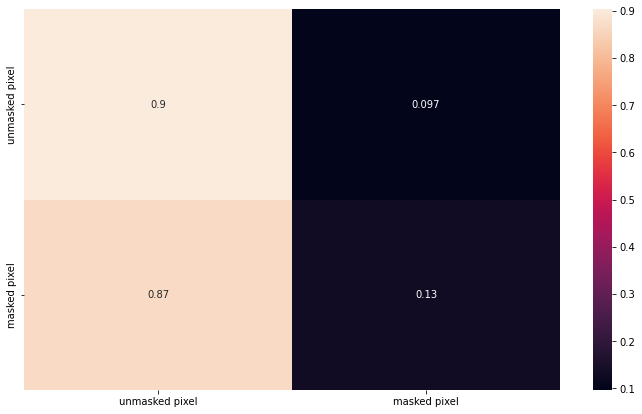

In [669]:
cf_matrix = confusion_matrix(y_simple_prob.ravel().astype(int), res_simple_prob1.ravel().astype(int), sample_weight=sample_weight,)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

## BERNOULLI

In [655]:
checkpoint_dir_simple_prob = f"models/data_bernoulli_0.8%_8epochs/fit/"

In [656]:
latest_simple_prob = tf.train.latest_checkpoint(checkpoint_dir_simple_prob)

model_simple_prob = get_model(img_size, num_classes)

# Load the previously saved weights
model_simple_prob.load_weights(latest)

In [657]:
with tf.device(cpus[0].name):
    res_simple_prob = model_simple_prob.predict(valid_dataset)

1000/1000 [==============================] - 964s 963ms/step


In [658]:
res_simple_prob1 = torch.argmax(torch.Tensor(res_simple_prob), dim=-1).numpy()

In [659]:
classes = ('unmasked pixel', 'masked pixel')


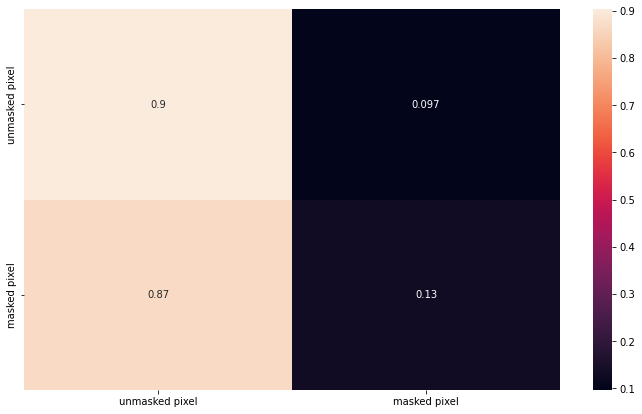

In [660]:
cf_matrix = confusion_matrix(y_simple_prob.ravel().astype(int), res_simple_prob1.ravel().astype(int), sample_weight=[0.002, 0.998],)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output_bernoulli.png')

In [670]:
cf_matrix

array([[1063702.49858653,  114267.76984508],
       [ 726519.05000938,  110665.22600029]])

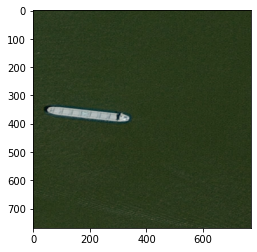

In [561]:
plt.imshow(x_test)

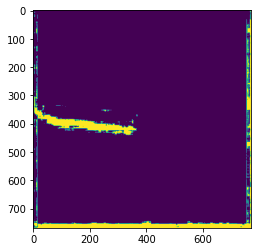

In [562]:
plt.imshow(tens[0])